# Medical Insurance Cost Prediction:

# 1. Overview

## Context
Rising healthcare costs make accurate medical insurance pricing critical. Ensuring fairness in premium determination is vital to prevent discrimination based on demographics or health-related features. This project develops a machine learning pipeline to predict medical insurance charges, perform feature engineering and fairness audits, and generate actionable model explainability using advanced tools and augmented datasets.

## Introduction
This code presents an end-to-end workflow for building, evaluating, and auditing regression models predicting individual medical insurance costs. Leveraging modern data science libraries and fairness-focused methodologies, it enables not just model development, but also an in-depth assessment of both model performance and its impact on various sensitive groups. The pipeline incorporates data transformation, feature engineering, fairness upsampling, synthetic data augmentation, fairness correctness, and explainability mechanisms such as SHAP value analysis.

## Purpose of the Project
The primary goal is to build a robust and fair predictive model that estimates insurance charges based on various customer characteristics, while systematically identifying and correcting potential sources of unfairness that could affect marginalized or high-risk groups. Additionally, the project aims to provide interpretability and transparency in model decision-making, aiding both data scientists and domain experts in deploying accountable AI in insurance contexts.

## Objective of the Code
Data Preparation: Clean, encode, and engineer features from the medical insurance dataset for optimal model input.

Exploratory Data Analysis & Fairness Audit: Visually and statistically analyze distributions, detect imbalances, and measure group-wise impacts on the target variable.

Model Training & Performance Benchmarking: Train baseline and fairness-constrained models, evaluate on train/test splits, and compare standard performance metrics (MAE, MSE, R²).

Explainability Analysis: Use SHAP to assess the impact of original and engineered features on model predictions, supporting model transparency.

Fairness Auditing & Correction: Conduct audits for various sensitive features, apply dual correction techniques, and re-assess group-based error metrics to validate fairness improvements.

Synthetic Feature Augmentation: Expand the dataset with simulated insurance-relevant features (e.g., pre-existing conditions, lifestyle metrics), reflecting more real-world risk factors and enabling further fairness and robustness checks.

## Source and Introduction to Data
The base dataset, loaded from medical_insurance.csv, contains 1,337 records (after deduplication) with customer demographic and health features: age, sex, BMI, number of children, smoking status, residential region, and past medical charges. These attributes are preprocessed through encoding and feature engineering. The project pipeline generates additional synthetic features such as pre-existing conditions, family history, sum-insured brackets, wellness behavior, and lifestyle risk scores, greatly expanding the data's scope for realistic and robust analysis.

## Attribute Explanations

Below you will find detailed explanations for each attribute used throughout the pipeline. Attributes are grouped as **original**, **engineered**, and **synthetic**, reflecting their source and role in insurance cost prediction and fairness analysis.

---

### a) Original Attributes

| Attribute   | Description |
|-------------|-------------|
| `age`       | The age of the insured individual in years. |
| `sex`       | Biological sex of the customer; encoded (0 = female, 1 = male). |
| `bmi`       | Body Mass Index, a numeric value expressing weight/height status. |
| `children`  | Number of children/dependents covered by the insurance policy. |
| `smoker`    | Smoking status; encoded as binary (0 = non-smoker, 1 = smoker). |
| `region`    | Residential region; one of northeast, northwest, southeast, southwest. Encoded into separate columns for model compatibility: `region_nw`, `region_se`, `region_sw`. |
| `charges`   | Total insurance claims charged to the individual (target variable). |

---

### b) Engineered Attributes

| Attribute         | Description |
|-------------------|-------------|
| `age_bin`         | Age divided into discrete bins (0-4), improving fairness stratification. |
| `bmi_bin`         | BMI categorized into bands (0 = lowest, 4 = highest risk group). |
| `age__bmi`        | Multiplicative interaction between age and BMI — compounding effect on health risk. |
| `age__smoker`     | Interaction term of age and smoking status; highlights risk amplification for older smokers. |
| `bmi__smoker`     | Interaction between BMI and smoking status; detects compounding risk of overweight smokers. |
| `is_high_risk`    | Flag set for individuals in high-risk brackets based on engineered rules. |
| `is_young_smoker` | Flag identifying young smokers, a group with special actuarial relevance. |

---

### c) Synthetic (Augmented) Attributes


| Category          | Feature                   | Value Range / Levels                                   | Step Size   | Impact on Charges (USD)     | Notes                                                                 |
|-------------------|---------------------------|---------------------------------------------------------|-------------|-----------------------------|-----------------------------------------------------------------------|
| Health Indicators | systolic_bp_syn           | 0 = Normal, 1 = Elevated, 2 = Hypertensive              | 1           | 0 → 1500 → 4200              | Higher blood pressure increases cost                                 |
| Health Indicators | cholesterol_syn           | 0 = Normal, 1 = Borderline, 2 = High                    | 1           | 0 → 1200 → 3500              | Elevated cholesterol adds risk                                       |
| Health Indicators | fasting_blood_sugar_syn   | 0 = Normal, 1 = Prediabetic, 2 = Diabetic               | 1           | 0 → 1500 → 3500              | Diabetes significantly raises cost                                   |
| Health Indicators | past_claims_syn           | 0 = No claims in last 5 years, 1 = 0–1/2 Claims, 2 = >2 | 1           | 0 → 2000 → 5000              | Past claims history increases cost risk                              |
| Lifestyle Factors | health_habits_syn         | 0 = Poor, 1 = Moderate, 2 = Healthy                     | 1           | 3000 → 1500 → 0              | Composite of steps/day, gym, exercise, calories burnt, etc.          |
| Lifestyle Factors | work_stress_syn           | 0 = Low, 1 = Moderate, 2 = High                         | 1           | 0 → 1000 → 3000              | Higher work stress increases health risk                             |
| Lifestyle Factors | sleep_quality_syn         | 0 = Poor, 1 = Average, 2 = Good                         | 1           | 2500 → 1200 → 0              | Better sleep reduces health risk                                     |
| Lifestyle Factors | alcohol_consumption_syn   | 0 = None, 1 = Moderate, 2 = Heavy                       | 1           | 0 → 1000 → 3000              | Higher alcohol use increases cost                                    |
| Policy Related    | sum_insured_syn           | 100,000 USD to 1,000,000 USD                            | 100,000     | 4% of insured amount         | Direct cost proportional to coverage                                 |




# 2. Steps Followed

a. Data Reading & Initial Cleaning:

    - Load dataset, deduplicate, reset indices.
    - Encode categorical variables and engineer additional meaningful features.


b. Exploratory Data Analysis & Baseline Fairness Audit:

    - Generate descriptive statistics and univariate/bivariate visualizations.
    - Univariate data analysis


c. Audit dataset fairness across key features

    -  highlighting data imbalances and
    -  group-wise median effects on costs.


d. Model Training and Evaluation

    - Split data (stratified by sensitive attributes),
    - Train an XGBRegressor.
    - Re-train on a fair regressor (Exponential Gradient Boosting)
    - Evaluate standard and fairness-constrained models on MAE, MSE, and R² metrics across both overall and group levels.


e. Model Explainability:

    - Compute SHAP values to understand the contribution of each feature (original, engineered, or synthetic)
    - Visualize feature importance


f. Fairness Audit & Dual Correction:

    - Perform fairness audit on all sensitive features.
    - Apply dual correction for predicted costs, then re-calculate performance and group metrics to quantify fairness improvements.


g. Feature Transformation and Synthetic Data Augmentation:

    - Transform raw features and bin age/BMI for increased fairness.


h. Use a DataAugmentor class to introduce synthetic attributes reflecting real-world insurance cost drivers.

    - Re-run Full Pipeline on Augmented Data.



This workflow ensures each model iteration is systematically audited for fairness, aligned with real-world insurance scenarios, and fully interpretable for stakeholders.



# 3. Import Standard & Custom Library Functions

In [1]:
# =====================================================
# 📦 Import Standard & Custom Libraries
# -----------------------------------------------------
# Libraries are grouped by functionality:
# - data handling (numpy, pandas)
# - visualization (matplotlib, seaborn)
# - modeling (xgboost, sklearn metrics)
# - presentation (IPython display for rich markdown)
# - custom project modules (EDA, fairness, explainability)
# =====================================================

## Import essential libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Rich output (for displaying markdown stages in reports)
from IPython.display import Markdown, display

# Base Model
from xgboost import XGBRegressor

# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Custom project modules (separate .py files in repo)
from explore import *            # EDA and visualization
from FairnessAnalysis import *   # Fairness metric computation
from ModelTrainer import *       # Training baseline vs fairness-constrained models
from SHAPAnalyzer import *       # Explainability via SHAP
from FairnessAuditor import *    # Group fairness & correction pipeline


# =====================================================
# Function: get_fixed_size_sample_with_augmentation
# Description:
#     Returns a DataFrame with exactly the requested number of rows.
#     Downsamples without replacement if input DataFrame is larger than the desired size.
#     Upsamples with replacement and applies multiplicative noise to numeric columns (identified by
#     having more than `unique_threshold` unique values and numeric type) if smaller.
#     Ensures the sample has realistic variability when upsampling for data augmentation.
#
# Parameters:
#     df              : Input dataset (pandas DataFrame)
#     size            : Required sample size (int)
#     noise_level     : Relative noise range for numeric columns during upsampling (float, default 0.01)
#     unique_threshold: Unique value threshold to define numeric columns (int, default 10)
#     random_state    : Seed for reproducibility (int, default 42)
#
# Returns:
#     pd.DataFrame
#         Output DataFrame with exactly `size` rows. Upsampled numeric columns are augmented with random noise.
# =====================================================

def get_fixed_size_sample_with_augmentation(
    df, size=50000, noise_level=0.01, unique_threshold=10, random_state=42):
    """
    Samples exactly `size` records from the dataframe df.
    - Downsamples without replacement if df is larger than size.
    - Upsamples with replacement and applies ±noise_level augmentation to numeric columns if smaller.
    - Numeric columns defined as those with > unique_threshold unique values.
    
    Parameters
    ----------
    df : pd.DataFrame
        Input dataset.
    size : int
        Desired output sample size.
    noise_level : float, default 0.01
        Fractional noise range to apply to numeric columns when upsampling.
    unique_threshold : int, default 10
        Minimum unique values required to consider a column numeric.
    random_state : int, default 42
        Seed for reproducibility.
    
    Returns
    -------
    pd.DataFrame
        Sampled dataset of size `size`.
    """
    np.random.seed(random_state)
    n = len(df)
    numeric_cols = [col for col in df.columns 
                    if df[col].nunique() > unique_threshold and pd.api.types.is_numeric_dtype(df[col])]
    
    if n == size:
        return df.copy()
    elif n > size:
        return df.sample(n=size, random_state=random_state, replace=False).reset_index(drop=True)
    else:
        # Upsample with replacement
        df_upsampled = df.sample(n=size, random_state=random_state, replace=True).reset_index(drop=True)
        for col in numeric_cols:
            noise = np.random.uniform(1 - noise_level, 1 + noise_level, size)
            df_upsampled[col] = df_upsampled[col] * noise
        return df_upsampled


# =====================================================
# Function: run_stage_pipeline
# Description:
#     This function represents the end-to-end execution of a single
#     modeling stage in the pipeline. It integrates:
#     1. Exploratory Data Analysis (EDA)
#     2. Fairness audits
#     3. Model training (baseline + fairness constrained)
#     4. Explainability analysis using SHAP
#     5. Fairness audit & correction (dual correction)
#
# Parameters:
#     model        : ML model object (e.g., XGBRegressor)
#     df           : Input dataset (pandas DataFrame)
#     target       : Name of target column (string)
#     hue          : Primary sensitive feature for fairness audit (string)
#     key_features : List of sensitive/group features to check fairness
#     stratify_by  : Features to stratify train-test split for fairness
#     metrics      : Dict of metrics {"MAE": func, "MSE": func, "R2": func}
#
# Returns:
#     List containing:
#     [data_fairness, model_results, SHAP_results, fairness_summary_report]
# =====================================================

def run_stage_pipeline(model, df, target, hue, key_features, stratify_by, metrics):
    """
    Runs the full ML pipeline:
    - Upsampling or downsampling the input data first to ensure consistent size.
    - Exploratory Data Analysis.
    - Data Fairness Audit.
    - Model Training.
    - SHAP explainability (on sampled data).
    - Model fairness audit and enhancement.
    
    Parameters
    ----------
    model : estimator
        ML model to train.
    df : pd.DataFrame
        Full dataset.
    target : str
        Target column name.
    hue, key_features, stratify_by : various
        Columns for analysis and fairness checks.
    metrics : dict
        Performance metrics dictionary for auditting.
    
    Returns
    -------
    List
        Results including fairness audits, model outputs, SHAP results etc.
    """

    
    # Step 1: Exploratory Data Analysis
    display(Markdown("## A. Exploratory Data Analysis"))
    eda(df, target, hue)

    
    # Step 2: Data Fairness Audit
    display(Markdown("## B. Data Fairness Audit"))
    data_fairness = Dataset_Fairness_Evaluation_Median(df=df, target=target, fairness_tags=key_features)
    display(data_fairness)

    
    # Step 3: Model Training
    display(Markdown("## C. Model Training"))
    trainer = ModelTrainer(df=df, model=model, target=target, stratify_by=stratify_by)
    model_results = trainer.run_fairness_comparison_pipeline()

    
    trained_baseline_model = model_results['baseline_model']
    trained_fair_model = model_results['fair_model']
    trained_subgroup_model = model_results['subgrp_model']

    
    # Step 4: SHAP explainability on sampled data
    display(Markdown("## D. SHAP Model explainability analysis"))
    analyzer = SHAPAnalyzer(model=trained_baseline_model, target_col=target, stratify_cols=stratify_by)
    SHAP_results = analyzer.run_analysis(data=df, top_interactions_n=15)

    
    # Step 5: Model Fairness Audits & Enhancement
    auditor = FairnessAuditor(df, target_col=target, sensitive_tags=key_features, model=trained_baseline_model, metrics_dict=metrics, stratify_col=stratify_by)
    fairness_summary_report_baseline = auditor.run_full_audit()
    
    auditor2 = FairnessAuditor(df, target_col=target, sensitive_tags=key_features, model=trained_subgroup_model, metrics_dict=metrics, stratify_col=stratify_by)
    fairness_summary_report_subgroup = auditor2.run_full_audit()
    
    # Return all relevant results
    return [data_fairness, model_results, SHAP_results, 
            [fairness_summary_report_baseline, fairness_summary_report_subgroup]]



# =====================================================
# Function: define_xgb
# Description:
#     Instantiates and returns a configured XGBoost regression model (XGBRegressor).
#     The model uses relaxed regularization and deeper trees, aiming to improve
#     fit on complex/heterogeneous data while maintaining resistance to overfitting.
#     Parameters chosen for controlled regularization, moderate learning rate, and
#     balanced subsampling for generalizability and predictive strength.
#
# Returns:
#     XGBRegressor
#         XGBoost regression model object, ready for fitting on data.
# =====================================================

def define_xgb():
    ## Revised model with reduced regularization
    xgb = XGBRegressor(
        n_estimators=100,
        objective='reg:squarederror',
        random_state=42,
        
        # Regularization (reduced)
        reg_alpha=0.5,           # High L1 regularization
        reg_lambda=1.0,          # High L2 regularization
    
        # Tree complexity (relaxed slightly)
        max_depth=8,          # Do not allow deeper trees
        min_child_weight=4,   # Allow splits with 4 samples
    
        # Subsampling (unchanged for now)
        subsample=0.8,
        colsample_bytree=0.8,
    
        # Learning rate balances convergence speed and accuracy
        learning_rate=0.05
    )
    return xgb

# 4. Read and prepare the data

In [2]:
# =====================================================
# 📂 Data Reading & Preparation
# -----------------------------------------------------
# - Read insurance dataset
# - Remove duplicates
# - Reset index
# - One-hot encode categorical variables 
# =====================================================

display(Markdown("# Read & Prepare Data"))

# Load dataset
df, _ = read_and_verify_dataset('medical_insurance.csv')

print('Dropping duplicate records, resetting indices...')
df = df.drop_duplicates(keep='first')
df.reset_index(drop=True, inplace=True)

# Convert selected columns to categorical
cat_cols = ['children', 'smoker', 'region']

# Now, we will carry out label and one-hot encoding

# Firstly, let us define one-hot features
one_hot_features = ['region']

# Define replacement dictionary for label encoding
replace_dict = {
    'sex': {'male': 1, 'female': 0},
    'smoker': {'yes': 1, 'no': 0},
    'region': {  # This can be used if you want to replace region names with shorter codes before one-hot encoding
        'northwest': 'nw',
        'northeast': 'ne',
        'southeast': 'se',
        'southwest': 'sw'
    }
}

# Encode categorical columns -> binary & one-hot
df = ReplaceEncode(df, replace_dict=replace_dict, one_hot_features=one_hot_features, drop_first=True)
df.to_csv('cleaned_encoded_data.csv', index=False)

# Read & Prepare Data

- Reading dataset from medical_insurance.csv... done.
- Displaying first and last 5 rows:


age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
2767   47  female  45.320         1     no  southeast   8569.86180
2768   21  female  34.600         0     no  southwest   2020.17700
2769   19    male  26.030         1    yes  northwest  16450.89470
2770   23    male  18.715         0     no  northwest  21595.38229
2771   54    male  31.600         0     no  southwest   9850.43200

[2772 rows x 7 columns]


- Displaying dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


None


- Missing values: 0
- Duplicate rows: 1435

- Column-wise summary:
- Generating dataframe column summary... done.


Column     Type  Unique Counts        Min        Max  \
0       age    int64             47         18         64   
1       sex   object              2     female       male   
2       bmi  float64            548      15.96      53.13   
3  children    int64              6          0          5   
4    smoker   object              2         no        yes   
5    region   object              4  northeast  southwest   
6   charges  float64           1337    1121.87   63770.43   

                                Unique Sample Values  
0          18, 19, 20, 21, 22 ... 60, 61, 62, 63, 64  
1                                       female, male  
2  15.96, 16.82, 17.2, 17.29, 17.39 ... 48.07, 49...  
3                                   0, 1, 2, 3, 4...  
4                                            no, yes  
5         northeast, northwest, southeast, southwest  
6  1121.87, 1131.51, 1135.94, 1136.4, 1137.01 ......

Dropping duplicate records, resetting indices...
🔄 Starting encoding process...
🔧 Applying label replacements...
✅ Feature: 'sex': {'male': 1, 'female': 0} : Done
✅ Feature: 'smoker': {'yes': 1, 'no': 0} : Done
✅ Feature: 'region': {'northwest': 'nw', 'northeast': 'ne', 'southeast': 'se', 'southwest': 'sw'} : Done
🎯 Applying one-hot encoding...
✅ One-hot encoded features: ['region_nw', 'region_se', 'region_sw']
🏁 Encoding process completed. Please find below Encoded Dataset:


age  sex     bmi  children  smoker      charges  region_nw  region_se  \
0      19    0  27.900         0       1  16884.92400          0          0   
1      18    1  33.770         1       0   1725.55230          0          1   
2      28    1  33.000         3       0   4449.46200          0          1   
3      33    1  22.705         0       0  21984.47061          1          0   
4      32    1  28.880         0       0   3866.85520          1          0   
...   ...  ...     ...       ...     ...          ...        ...        ...   
1332   50    1  30.970         3       0  10600.54830          1          0   
1333   18    0  31.920         0       0   2205.98080          0          0   
1334   18    0  36.850         0       0   1629.83350          0          1   
1335   21    0  25.800         0       0   2007.94500          0          0   
1336   61    0  29.070         0       1  29141.36030          1          0   

      region_sw  
0             1  
1             0  
2             0  
3             0  
4             0  
...         ...  
1332          0  
1333          0  
1334          0  
1335          1  
1336          0  

[1337 rows x 9 columns]

# 5. Running the complete code pipeline for Stage 1 

## A. Exploratory Data Analysis


- Descriptive Statistics with Enhanced Features:
- Calculating enhanced descriptive statistics... done.


age       sex       bmi  children    smoker    charges  \
count           1337.000  1337.000  1337.000  1337.000  1337.000   1337.000   
mean              39.222     0.505    30.663     1.096     0.205  13279.121   
std               14.044     0.500     6.100     1.206     0.404  12110.360   
min               18.000     0.000    15.960     0.000     0.000   1121.874   
25%               27.000     0.000    26.290     0.000     0.000   4746.344   
50%               39.000     1.000    30.400     1.000     0.000   9386.161   
75%               51.000     1.000    34.700     2.000     0.000  16657.717   
max               64.000     1.000    53.130     5.000     1.000  63770.428   
cv                 0.358     0.991     0.199     1.100     1.970      0.912   
IQR               24.000     1.000     8.410     2.000     0.000  11911.373   
skew               0.047    -2.970     0.130     0.238     1.523      0.964   
upper_lim         57.000     1.000    36.850     2.500     0.000  20293.496   
lower_lim         21.000    -0.500    24.235    -0.500     0.000   2426.435   
outlier_spread     1.278     0.667     2.946     1.667       inf      3.506   

                region_nw  region_se  region_sw  
count            1337.000   1337.000   1337.000  
mean                0.242      0.272      0.243  
std                 0.429      0.445      0.429  
min                 0.000      0.000      0.000  
25%                 0.000      0.000      0.000  
50%                 0.000      0.000      0.000  
75%                 0.000      1.000      0.000  
max                 1.000      1.000      1.000  
cv                  1.769      1.636      1.765  
IQR                 0.000      1.000      0.000  
skew                1.696      1.834      1.699  
upper_lim           0.000      1.500      0.000  
lower_lim           0.000      0.000      0.000  
outlier_spread        inf      0.667        inf


- Univariate Distribution & Boxplots:
- Generating univariate plots with hue='smoker'... 

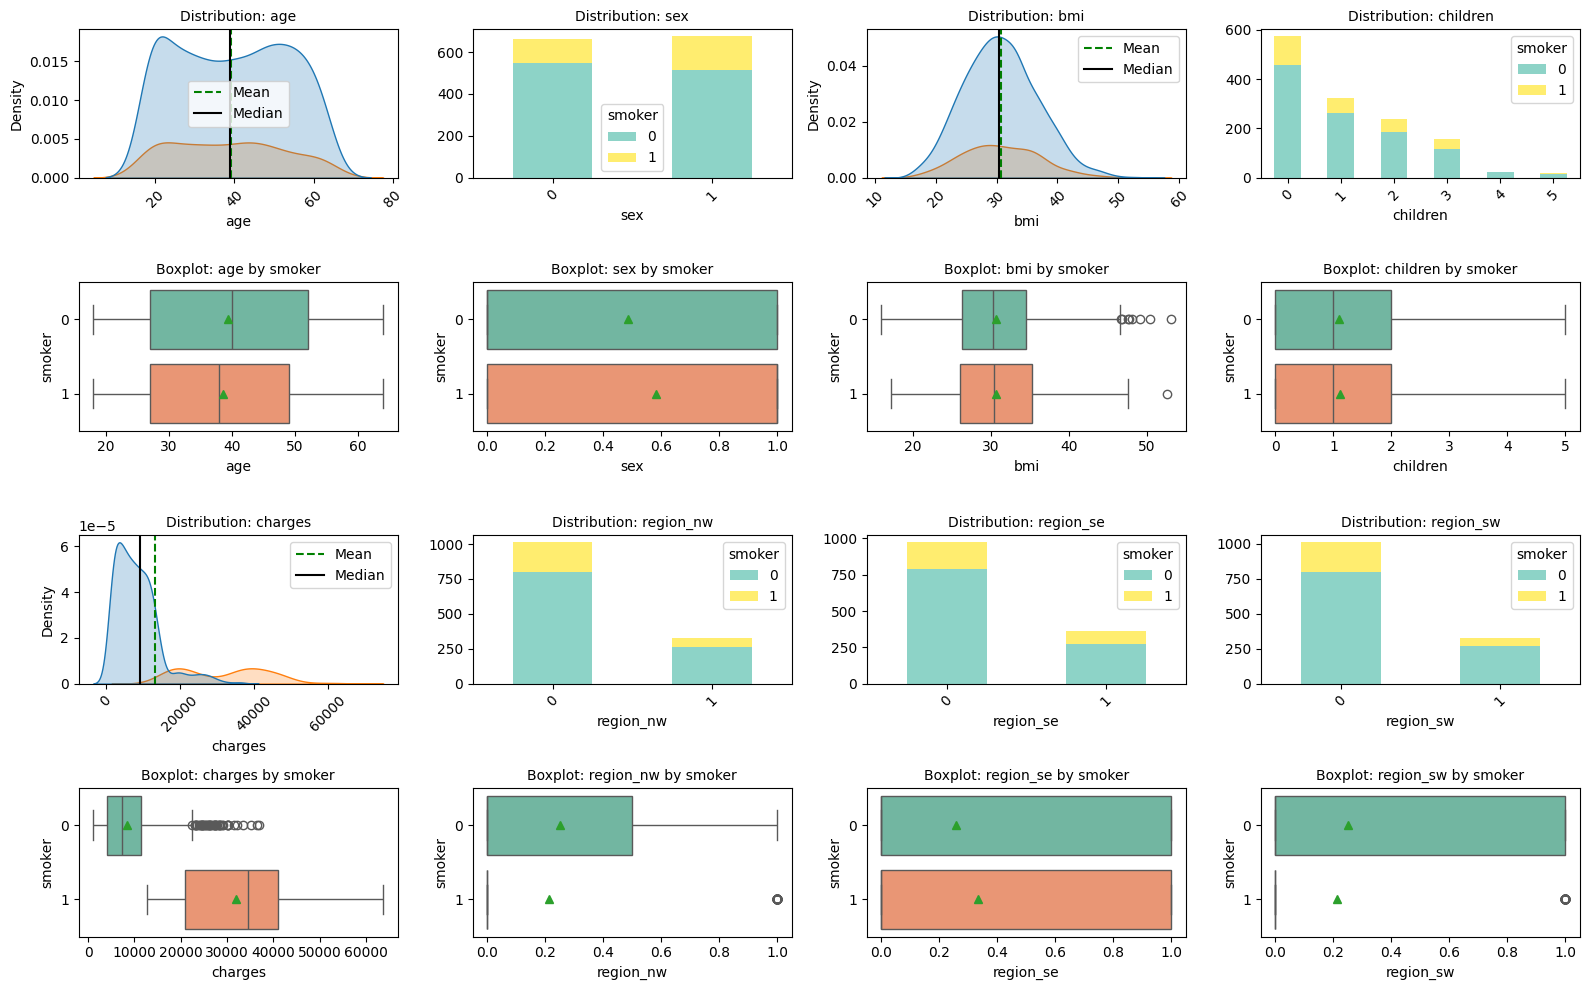

done.

- Correlation Heatmap:
- Calculating correlation matrix using 'spearman'... 

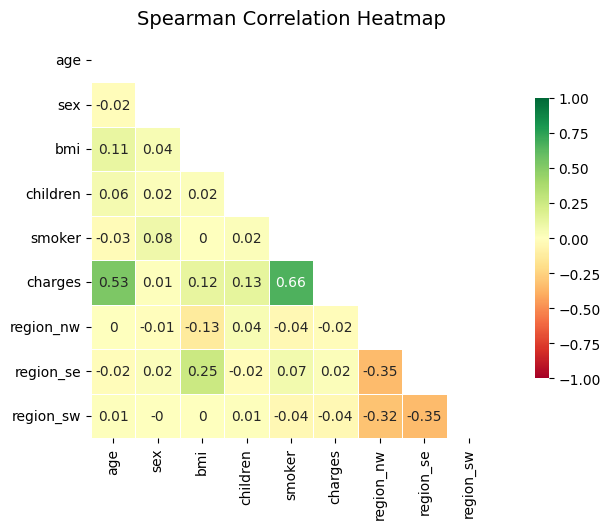

done.

- Bi-variate plot of attributes with 'charges':
- Creating bivariate plots for 'charges' with hue 'smoker'... 

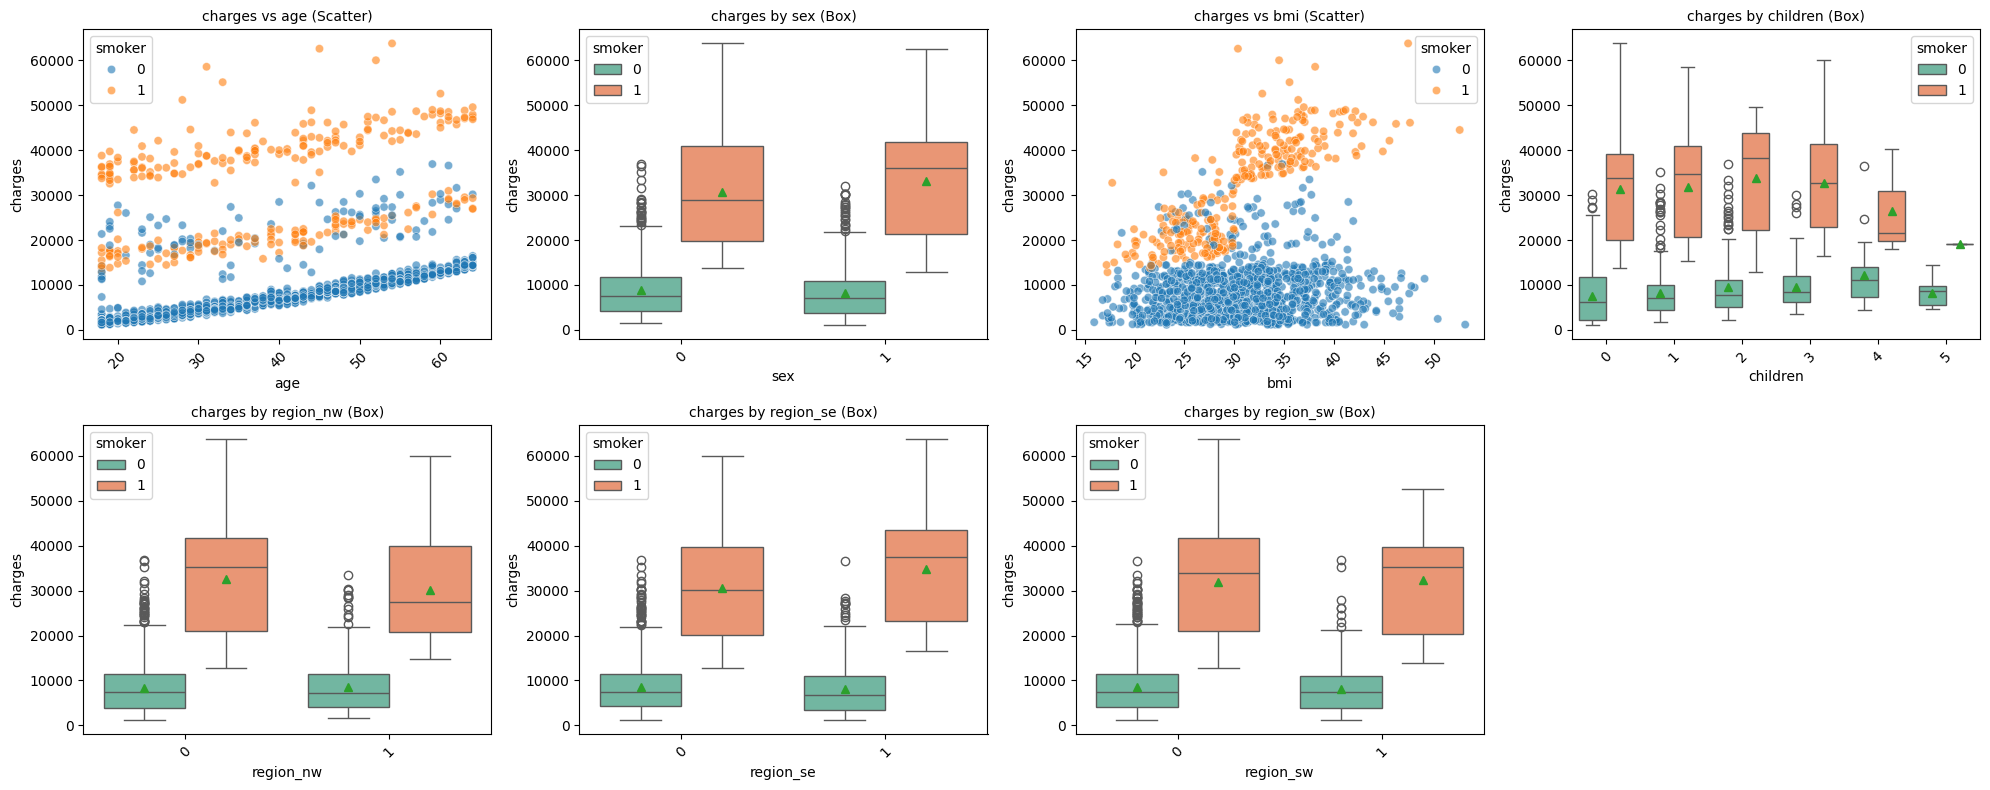

done.
done.


## B. Data Fairness Audit

## Dataset Fairness Profile Summary (Median Based)

### Subgroup Imbalance
| Feature   | Value Counts                                   |   Imbalance Ratio |
|:----------|:-----------------------------------------------|------------------:|
| sex       | {1: 675, 0: 662}                               |             0.981 |
| children  | {0: 573, 1: 324, 2: 240, 3: 157, 4: 25, 5: 18} |             0.031 |
| smoker    | {0: 1063, 1: 274}                              |             0.258 |
| region_nw | {0: 1013, 1: 324}                              |             0.32  |
| region_se | {0: 973, 1: 364}                               |             0.374 |
| region_sw | {0: 1012, 1: 325}                              |             0.321 |

### Target Influences (vs Overall Median)
| Feature   |   Group |   Group Median |   Overall Median |   Δ vs Overall Median |
|:----------|--------:|---------------:|-----------------:|----------------------:|
| sex       |       0 |        9412.96 |          9386.16 |                 26.8  |
| sex       |       1 |        9377.9  |          9386.16 |                 -8.26 |
| children  |       0 |        9863.47 |          9386.16 |                477.31 |
| children  |       1 |        8483.87 |          9386.16 |               -902.29 |
| children  |       2 |        9264.98 |          9386.16 |               -121.18 |
| children  |       3 |       10600.5  |          9386.16 |               1214.39 |
| children  |       4 |       11033.7  |          9386.16 |               1647.5  |
| children  |       5 |        8589.57 |          9386.16 |               -796.6  |
| smoker    |       0 |        7345.73 |          9386.16 |              -2040.43 |
| smoker    |       1 |       34456.3  |          9386.16 |              25070.2  |
| region_nw |       0 |        9447.25 |          9386.16 |                 61.09 |
| region_nw |       1 |        8976.98 |          9386.16 |               -409.18 |
| region_se |       0 |        9414.92 |          9386.16 |                 28.76 |
| region_se |       1 |        9294.13 |          9386.16 |                -92.03 |
| region_sw |       0 |        9545.63 |          9386.16 |                159.47 |
| region_sw |       1 |        8798.59 |          9386.16 |               -587.57 |

### Feature Skewness
| Feature   |   Skewness | Highly Skewed   |
|:----------|-----------:|:----------------|
| sex       |      -0.02 | No              |
| children  |       0.94 | No              |
| smoker    |       1.46 | Yes             |
| region_nw |       1.2  | Yes             |
| region_se |       1.02 | Yes             |
| region_sw |       1.2  | Yes             |


## C. Model Training

🔧 Step 0: Initial Data Splitting (Stratified if possible)...
✅ Stratifying by combined columns: ['smoker', 'sex']


## **Step 1: Baseline Model Performance (Standard XGBoost)** 📊


📈 Training Baseline Model...
📊 Evaluating Baseline Model (Overall Test Set)...
RMSE: 2697.91 MAE: 1539.34 R2: 0.95
RMSE: 4314.24 MAE: 2644.39 R2: 0.85
Overall Test RMSE: 4314.24
Overall Test MAE: 2644.39
Overall Test R2: 0.85

--- Visualizing Baseline Model Performance ---

📐 Baseline Training Best-Fit Line: y = 0.9056x + 1251.21

📐 Baseline Test Best-Fit Line: y = 0.8230x + 2654.38


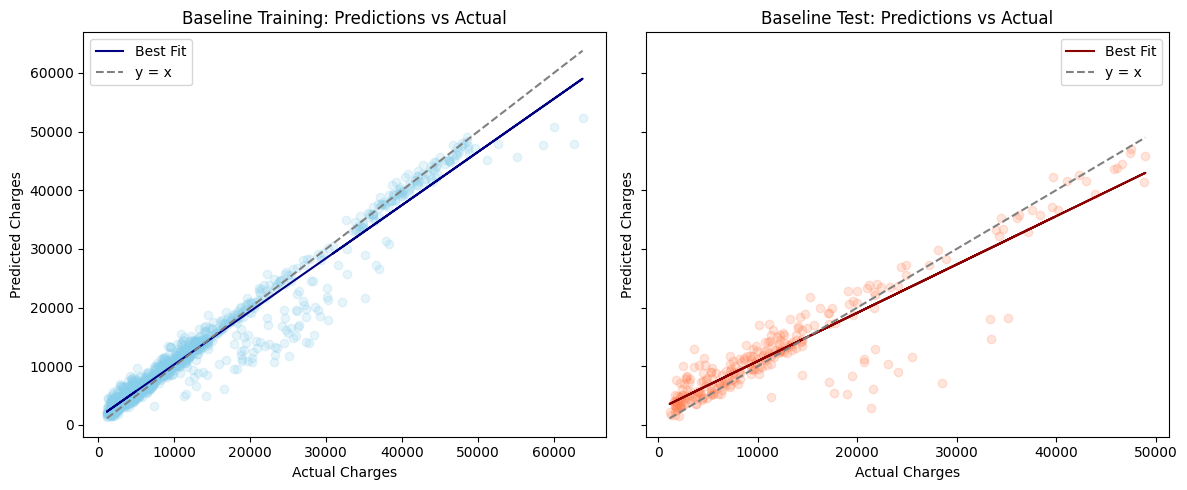

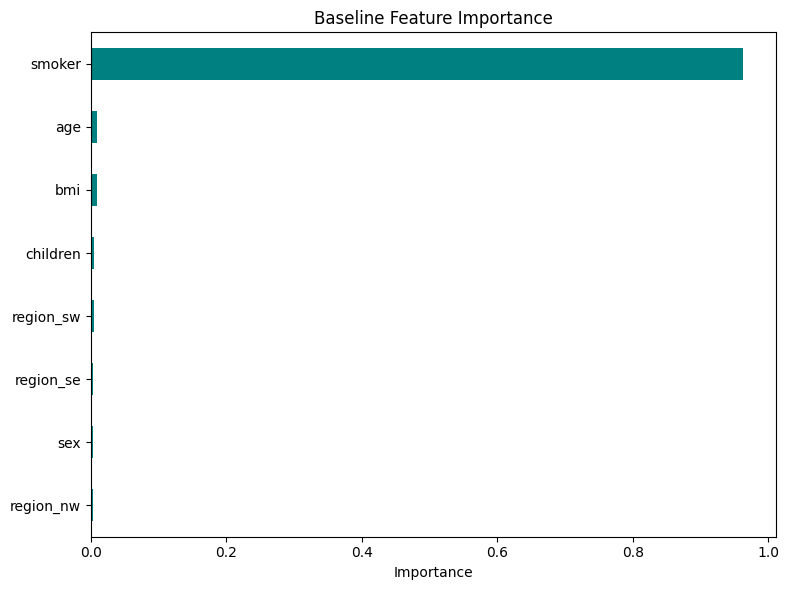


--- Collecting Group-wise Metrics for Baseline Model ---
✅ Baseline Model Evaluation Complete.


## **Step 2: Fairlearn-Constrained Model** ⚖️

✅ Dynamic `upper_bound` set to 1/3 of baseline training MAE: 513.11

📈 Training fairness-constrained model (constraints on ['smoker', 'sex'])...
This process may take longer due to fairness optimization.
⚠️ Unable to compute constraint violations on training set for Fair Model: ConditionalLossMoment.gamma() got an unexpected keyword argument 'sensitive_features'. This might happen with certain model types or if gamma calculation is complex. Safe to ignore if primarily using overall performance and group-wise metrics.

📊 Evaluating Fairlearn-Constrained Model (Overall Test Set)...
RMSE: 3078.56 MAE: 1787.25 R2: 0.94
RMSE: 4287.24 MAE: 2701.66 R2: 0.85
Overall Test RMSE: 4287.24
Overall Test MAE: 2701.66
Overall Test R2: 0.85

--- Visualizing Fairlearn-Constrained Model Performance ---

📐 Fairlearn Training Best-Fit Line: y = 0.8986x + 1468.55

📐 Fairlearn Test Best-Fit Line: y = 0.8250x + 2702.74


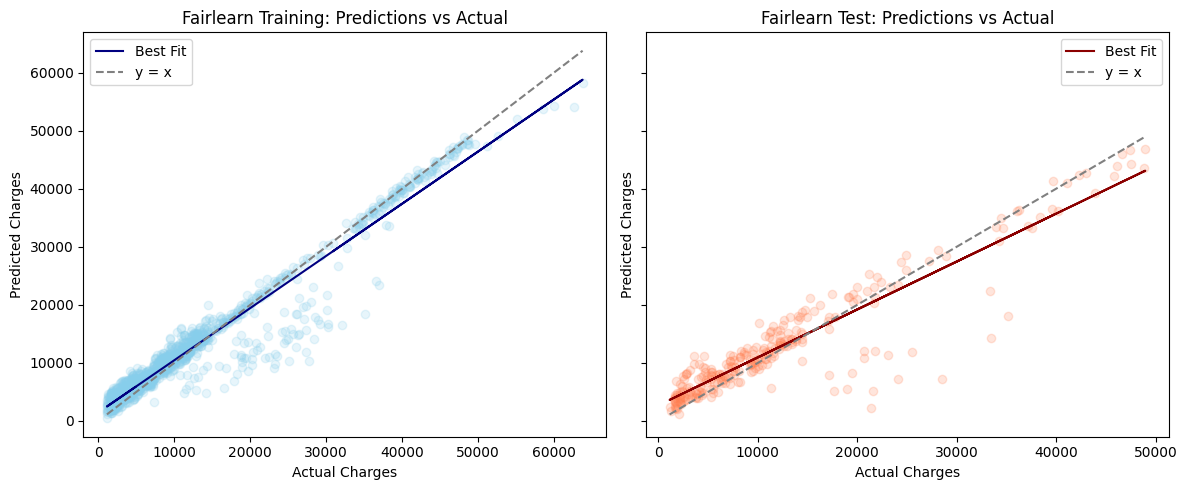


⚠️ Feature importance not available or empty for the Fairlearn model.

--- Collecting Group-wise Metrics for Fairlearn-Constrained Model ---
✅ Fairlearn Model Evaluation Complete.


## **Step 3: Hybrid Subgroup Model** 🎯


📈 Training Hybrid Subgroup Model...
🚀 Starting Hybrid Subgroup Model Training:
Non-smoker data points: 850
Smoker data points: 219
--------------------------------------------------

--- Training Standard Model for NON-SMOKERS ---
✅ Stratifying by combined columns: ['smoker', 'sex']
RMSE: 2630.24 MAE: 1518.34 R2: 0.82

--- Training FAIRNESS-AWARE Model for SMOKERS ---
✅ Stratifying by combined columns: ['smoker', 'sex']
RMSE: 1545.84 MAE: 893.84 R2: 0.98
✅ Dynamic `upper_bound` set to 1/3 of baseline training MAE: 297.95

📈 Training fairness-constrained model (constraints on ['smoker', 'sex'])...
This process may take longer due to fairness optimization.
⚠️ Unable to compute constraint violations on training set for Fair Model: ConditionalLossMoment.gamma() got an unexpected keyword argument 'sensitive_features'. This might happen with certain model types or if gamma calculation is complex. Safe to ignore if primarily using overall performance and group-wise metrics.

✅ Hybrid Subgrou

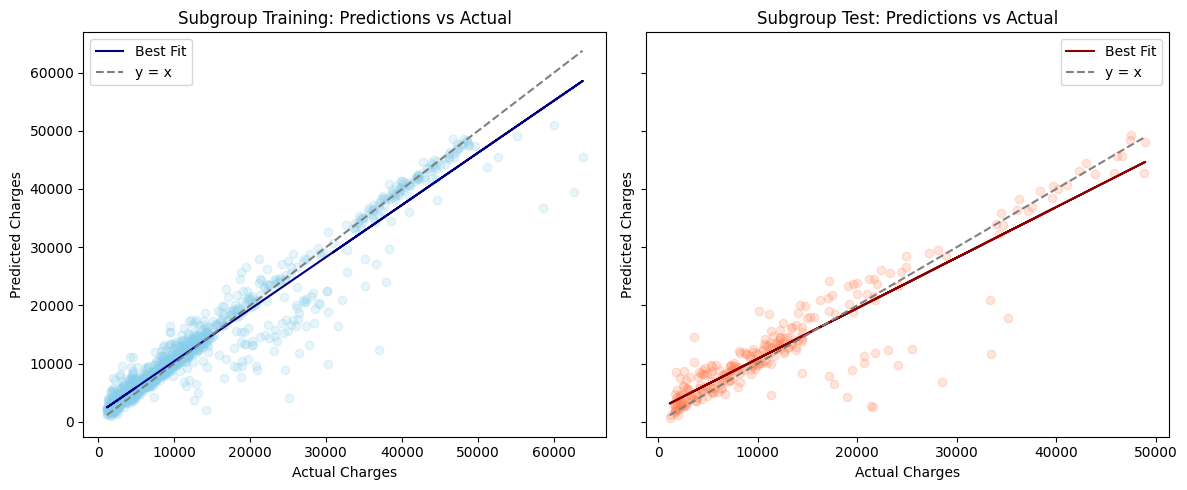


Note: Feature importance for the composite Hybrid Subgroup Model is not directly plotted here.
To inspect individual subgroup model importances, access `subgrp_model.non_smoker_model` and `subgrp_model.smoker_model`.

--- Collecting Group-wise Metrics for Hybrid Subgroup Model ---
✅ Hybrid Subgroup Model Evaluation Complete.


## **Step 4: Comparative Feature-wise Analysis** 📈⚖️🎯

Comparing MAE, MSE, and R² across Baseline, Fairlearn, and Hybrid Subgroup Models:


### Comparative Mean Absolute Error by Feature

Feature   Group  Baseline MAE  Fairlearn MAE  Subgroup MAE
0         sex       0     2719.8846      2786.7477     2658.8289
1         sex       1     2570.0070      2617.8253     2503.4452
2         sex    Mean     2644.9458      2702.2865     2581.1370
3         sex  StdDev       74.9388        84.4612       77.6918
4    children       0     2510.1969      2456.9107     2447.2341
5    children       1     2600.1875      2666.3411     2519.6337
6    children       2     3448.3955      3636.1056     3639.2729
7    children       3     1920.2795      2361.7000     1635.6673
8    children       4     4077.5962      4111.5547     3732.1972
9    children       5     2585.7974      2039.2852     2608.2372
10   children    Mean     2857.0755      2878.6496     2763.7070
11   children  StdDev      704.3703       740.3268      725.8283
12     smoker       0     2720.9438      2771.8606     2618.8507
13     smoker       1     2347.9013      2429.7739     2432.2571
14     smoker    Mean     2534.4226      2600.8172     2525.5539
15     smoker  StdDev      186.5213       171.0433       93.2968
16  region_nw       0     2456.6145      2554.9267     2373.6644
17  region_nw       1     3136.6540      3086.3254     3122.9521
18  region_nw    Mean     2796.6342      2820.6261     2748.3082
19  region_nw  StdDev      340.0198       265.6993      374.6439
20  region_se       0     2802.7824      2852.1921     2702.6784
21  region_se       1     2196.3526      2275.8547     2235.1290
22  region_se    Mean     2499.5675      2564.0234     2468.9037
23  region_se  StdDev      303.2149       288.1687      233.7747
24  region_sw       0     2782.8398      2820.1058     2776.5666
25  region_sw       1     2184.3647      2308.0979     1929.3004
26  region_sw    Mean     2483.6022      2564.1019     2352.9335
27  region_sw  StdDev      299.2376       256.0039      423.6331

### Comparative Mean Squared Error by Feature

Feature   Group  Baseline MSE  Fairlearn MSE  Subgroup MSE
0         sex       0  2.147719e+07   2.082044e+07  2.107910e+07
1         sex       1  1.579049e+07   1.597657e+07  1.666179e+07
2         sex    Mean  1.863384e+07   1.839850e+07  1.887045e+07
3         sex  StdDev  2.843351e+06   2.421933e+06  2.208657e+06
4    children       0  1.720742e+07   1.619124e+07  1.723227e+07
5    children       1  2.058484e+07   2.024821e+07  2.042207e+07
6    children       2  2.717659e+07   2.869406e+07  3.122915e+07
7    children       3  6.128979e+06   8.306549e+06  4.614206e+06
8    children       4  3.205232e+07   3.101921e+07  2.793255e+07
9    children       5  1.261836e+07   6.520514e+06  1.320010e+07
10   children    Mean  1.929475e+07   1.849663e+07  1.910506e+07
11   children  StdDev  8.648814e+06   9.277667e+06  8.897690e+06
12     smoker       0  1.965209e+07   1.965078e+07  1.999803e+07
13     smoker       1  1.458705e+07   1.346069e+07  1.442331e+07
14     smoker    Mean  1.711957e+07   1.655574e+07  1.721067e+07
15     smoker  StdDev  2.532520e+06   3.095047e+06  2.787362e+06
16  region_nw       0  1.497065e+07   1.494229e+07  1.465229e+07
17  region_nw       1  2.816051e+07   2.739393e+07  2.986917e+07
18  region_nw    Mean  2.156558e+07   2.116811e+07  2.226073e+07
19  region_nw  StdDev  6.594932e+06   6.225818e+06  7.608442e+06
20  region_se       0  2.150805e+07   2.121214e+07  2.147828e+07
21  region_se       1  1.042272e+07   1.037073e+07  1.143091e+07
22  region_se    Mean  1.596538e+07   1.579143e+07  1.645459e+07
23  region_se  StdDev  5.542664e+06   5.420705e+06  5.023681e+06
24  region_sw       0  2.144020e+07   2.105960e+07  2.198429e+07
25  region_sw       1  9.217781e+06   9.478666e+06  8.453190e+06
26  region_sw    Mean  1.532899e+07   1.526913e+07  1.521874e+07
27  region_sw  StdDev  6.111209e+06   5.790467e+06  6.765552e+06

### Comparative R-squared by Feature

Feature   Group  Baseline R2  Fairlearn R2  Subgroup R2
0         sex       0       0.7801        0.7868       0.7842
1         sex       1       0.8921        0.8909       0.8862
2         sex    Mean       0.8361        0.8389       0.8352
3         sex  StdDev       0.0560        0.0520       0.0510
4    children       0       0.8782        0.8854       0.8780
5    children       1       0.7996        0.8029       0.8012
6    children       2       0.8076        0.7969       0.7790
7    children       3       0.9210        0.8929       0.9405
8    children       4       0.6685        0.6792       0.7111
9    children       5       0.1937        0.5834       0.1566
10   children    Mean       0.7114        0.7734       0.7111
11   children  StdDev       0.2445        0.1105       0.2584
12     smoker       0       0.3565        0.3565       0.3452
13     smoker       1       0.8757        0.8853       0.8771
14     smoker    Mean       0.6161        0.6209       0.6111
15     smoker  StdDev       0.2596        0.2644       0.2659
16  region_nw       0       0.8839        0.8841       0.8864
17  region_nw       1       0.7339        0.7411       0.7178
18  region_nw    Mean       0.8089        0.8126       0.8021
19  region_nw  StdDev       0.0750        0.0715       0.0843
20  region_se       0       0.7923        0.7951       0.7926
21  region_se       1       0.9411        0.9414       0.9354
22  region_se    Mean       0.8667        0.8682       0.8640
23  region_se  StdDev       0.0744        0.0731       0.0714
24  region_sw       0       0.8368        0.8397       0.8327
25  region_sw       1       0.9010        0.8982       0.9092
26  region_sw    Mean       0.8689        0.8689       0.8709
27  region_sw  StdDev       0.0321        0.0292       0.0382




**End of Comparative Analysis.**


## D. SHAP Model explainability analysis

Standard model detected. Using default shap.Explainer().
Calculating SHAP values... (This may take a moment for non-tree models)
Tree explainer detected. Computing SHAP interaction values...


Feature  Mean |SHAP|      Type
0     smoker  6523.507614  Original
1        age  3205.327642  Original
2        bmi  1818.607500  Original
3   children   800.917997  Original
4  region_sw   217.621976  Original
5        sex   213.639999  Original
6  region_se   204.016323  Original
7  region_nw   110.155338  Original

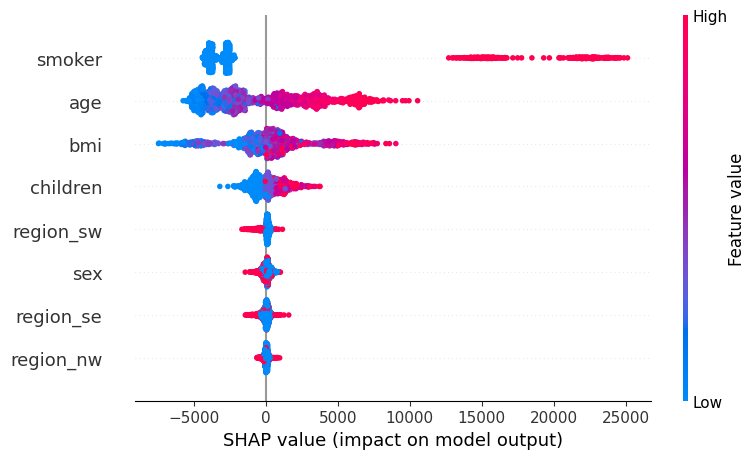

--- Starting Fairness Audit Pipeline ---

🔧 Step 1: Stratified split...
- Splitting data (stratified by ['smoker', 'sex'])...
  - Data split done.

📊 Step 2: Generating predictions and evaluating overall scores (Before DC)...
- Generating uncorrected predictions...
  - Uncorrected predictions and scores calculated.

📈 Step 3: Applying dual correction...
- Splitting train/test datasets for DC application...
  - Dataframes prepared for DC.
  - Combined train and test data for DC fitting.
[TrippleFactorCorrection] Initialized. lambda_strength=1.0, min_group_size=3
- Calculating global shift...
- Calculating group-wise offsets...
[TrippleFactorCorrection] Fitting regression-based correction...
[TrippleFactorCorrection] Overall train MAE: 1539.3369
[TrippleFactorCorrection] Fitted global regression: coef=0.4889, intercept=16.0081
  - Global shift and group-wise offsets calculated.
[TrippleFactorCorrection] Applying tripple-factor corrections to test predictions...
[transform_with_audit] Fai

Parameter    Before DC     After DC     Impact
0  rmse_train  2697.905394  2697.905394   0.000000
1   mae_train  1539.336903  1539.336903   0.000000
2    r2_train     0.952221     0.952221   0.000000
3   rmse_test  4314.235088  4361.788952  47.553864
4    mae_test  2644.386579  2676.691017  32.304437
5     r2_test     0.848695     0.845341  -0.003354

  - Overall performance comparison done.

📋 Step 5: Computing group-wise fairness metrics...
📋 Computing group-wise fairness metrics...

### Audit for `sex` ###

Fairness Audit for sex:
- sex=0: before = 12280.33, after = 12258.09
- sex=1: before = 13898.42, after = 13920.25

### Audit for `children` ###

Fairness Audit for children:
- children=0: before = 12943.82, after = 12980.26
- children=1: before = 12425.51, after = 12491.57
- children=2: before = 14140.76, after = 14011.86
- children=3: before = 14296.71, after = 14176.89
- children=4: before = 14225.19, after = 14235.56
- children=5: before = 7481.62, after = 7119.51

### Audit for `smoker` ###

Fairness Audit for smoker:
- smoker=0: before = 8959.01, after = 8864.30
- smoker=1: before = 29114.57, after = 29481.18

### Audit for `region_nw` ###

Fairness Audit for region_nw:
- region_nw=0: before = 13425.89, after = 13453.40
- region_nw=1: before = 12229.04, after = 12156.77

### Audit for `region_se` ###

Fairness Audit for r

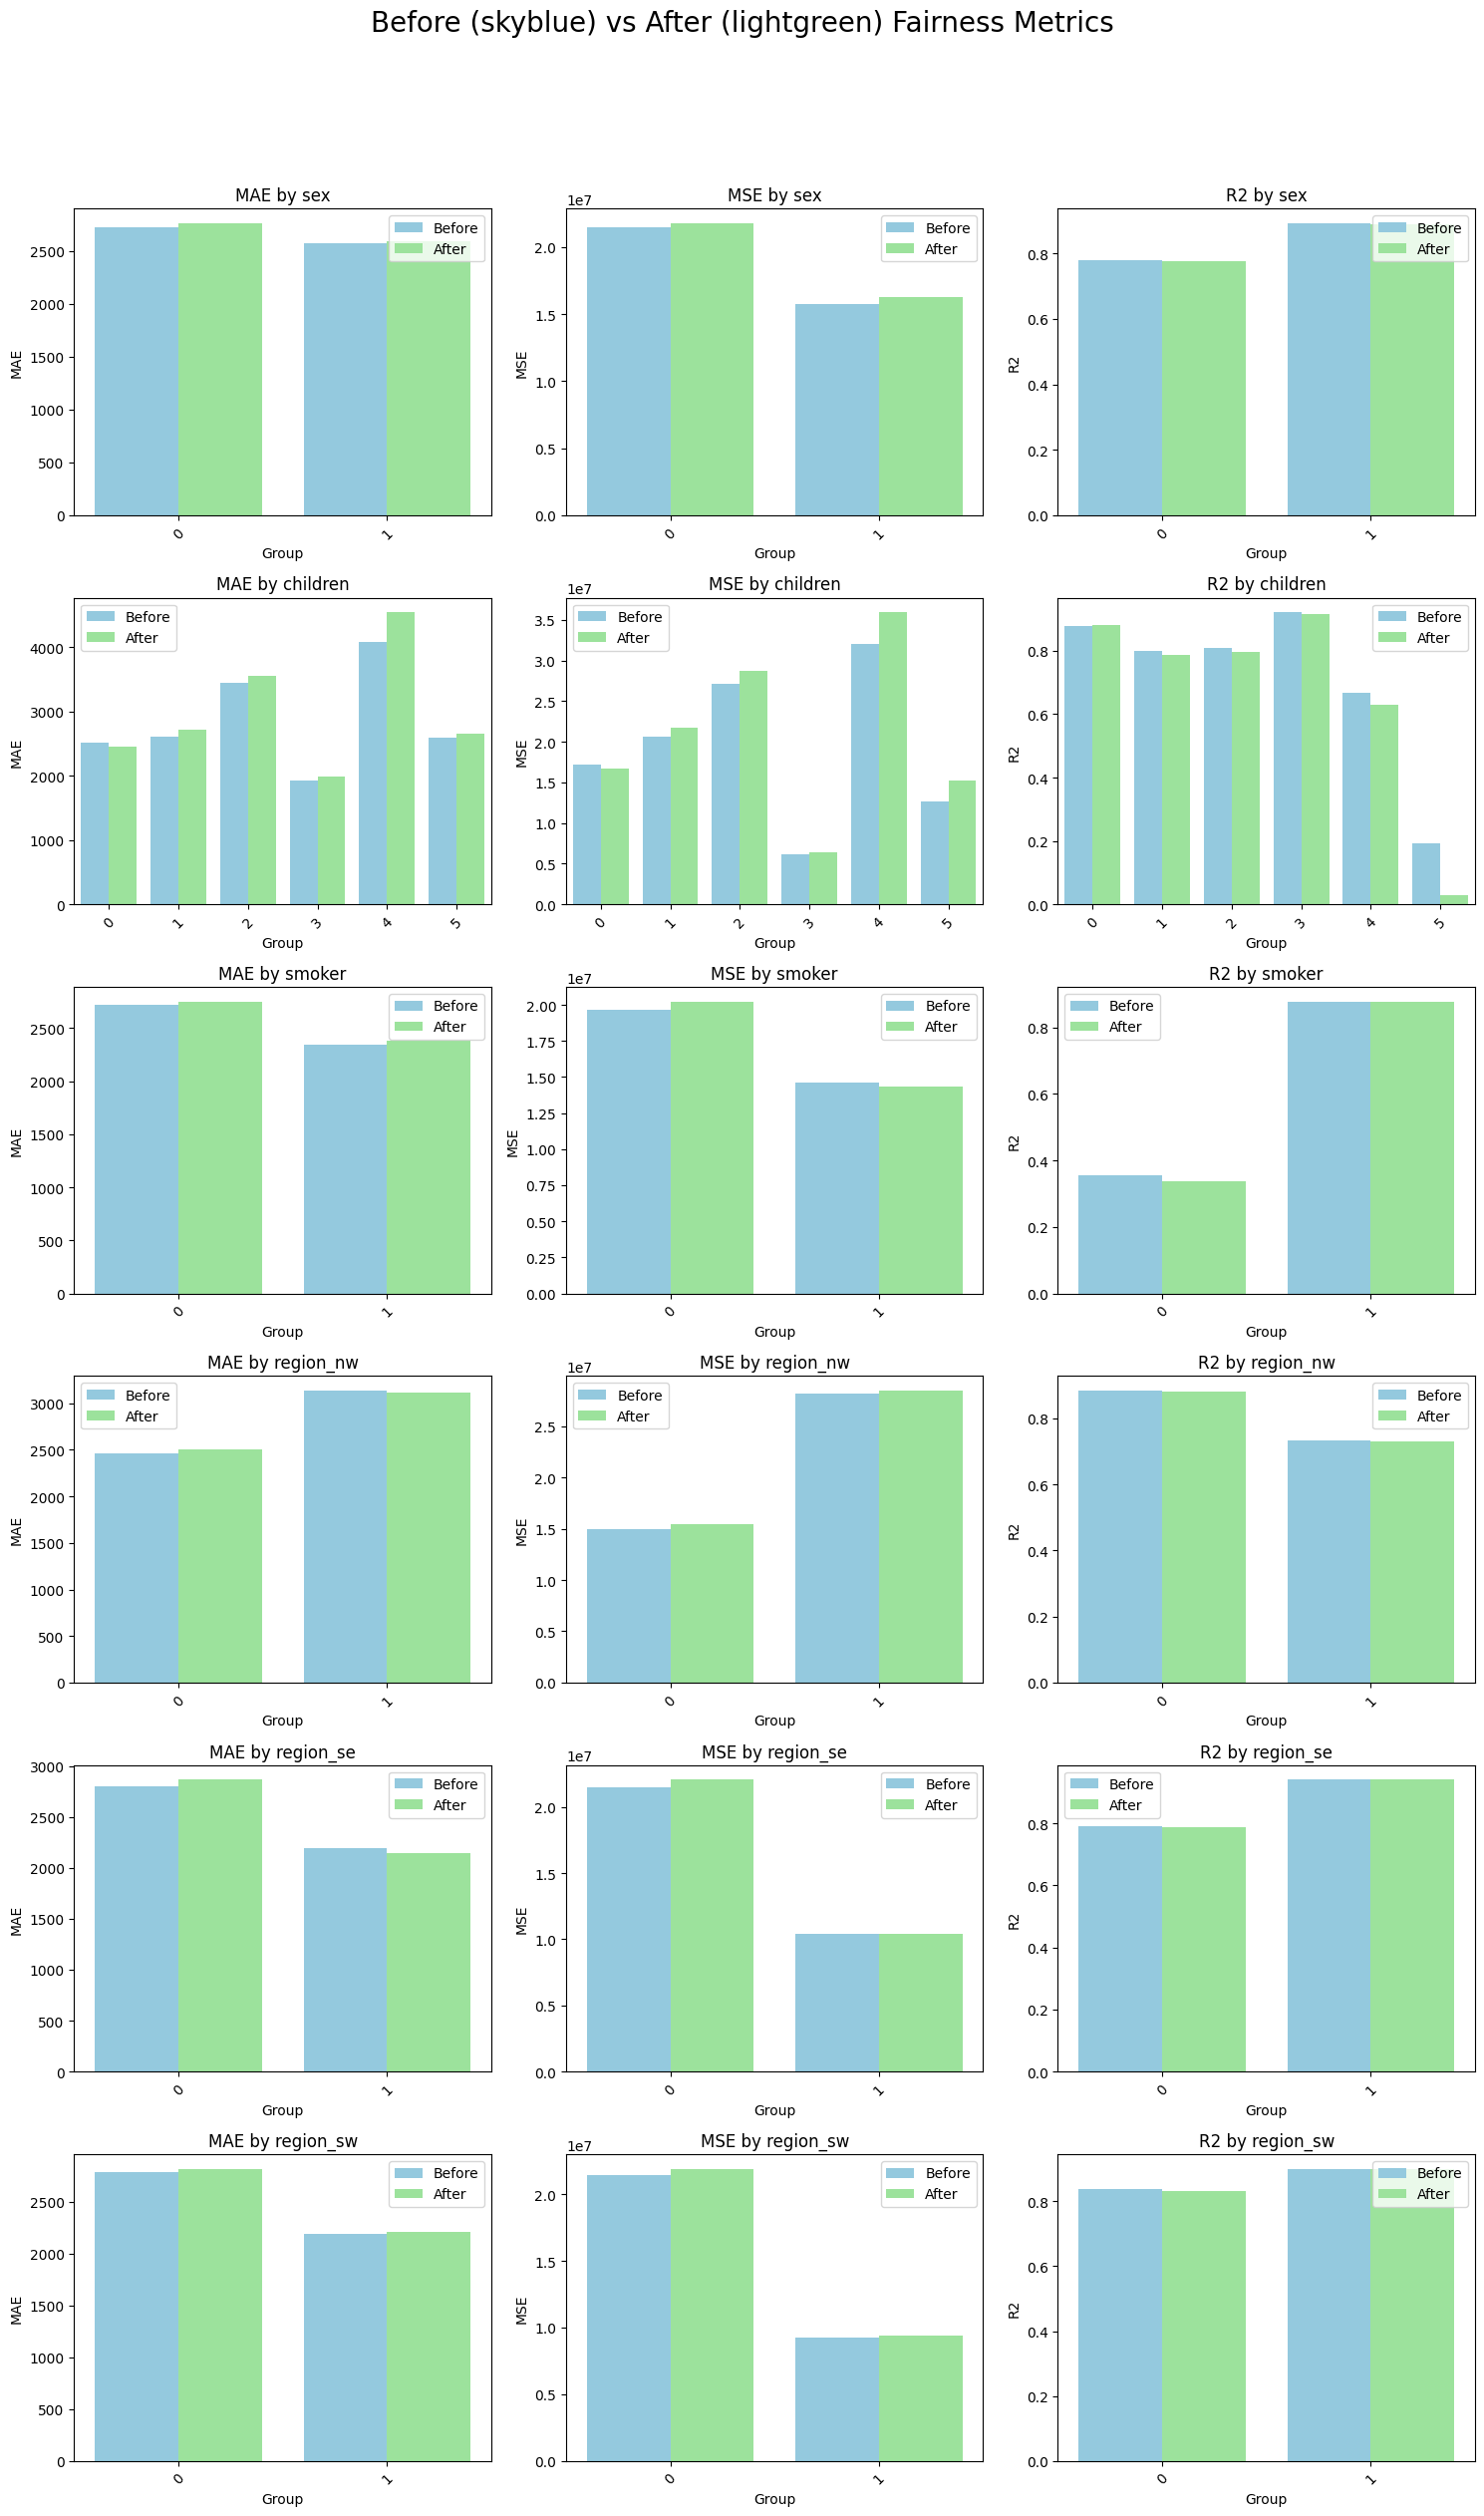

done.
  - Fairness grids plotted.

⚖️ Step 7: Comparing group-wise influence (detailed breakdown)...
- Comparing before/after metrics for each group (influence)... done.
  - Group-wise influence comparison done.

📝 Step 8: Summarizing fairness improvement report...


For Metric: MAE



Feature Metric  Mean_before  Stddev_before   Mean_after  Stddev_after  \
0  Overall MAE    MAE  2691.299852     503.253554  2752.227177    588.309788   
1     children    MAE  2857.075492     704.370280  2980.096511    835.696832   
2    region_nw    MAE  2796.634231     340.019755  2813.675696    305.932450   
3    region_se    MAE  2499.567511     303.214923  2504.484911    360.556534   
4    region_sw    MAE  2483.602218     299.237560  2513.592435    303.544582   
5          sex    MAE  2644.945824      74.938802  2677.315723     83.710604   
6       smoker    MAE  2534.422557     186.521253  2568.459118    183.583220   

        ΔMean     ΔStddev  
0   60.927325   85.056235  
1  123.021019  131.326552  
2   17.041465  -34.087305  
3    4.917399   57.341611  
4   29.990217    4.307022  
5   32.369899    8.771802  
6   34.036561   -2.938033



For Metric: MSE



Feature Metric   Mean_before  Stddev_before    Mean_after  \
7   Overall MSE    MSE  1.831220e+07   6.890927e+06  1.906858e+07   
8      children    MSE  1.929475e+07   8.648814e+06  2.078292e+07   
9     region_nw    MSE  2.156558e+07   6.594932e+06  2.195186e+07   
10    region_se    MSE  1.596538e+07   5.542664e+06  1.625089e+07   
11    region_sw    MSE  1.532899e+07   6.111209e+06  1.566346e+07   
12          sex    MSE  1.863384e+07   2.843351e+06  1.904565e+07   
13       smoker    MSE  1.711957e+07   2.532520e+06  1.728799e+07   

    Stddev_after         ΔMean        ΔStddev  
7   7.457182e+06  7.563753e+05  566254.759212  
8   9.543696e+06  1.488173e+06  894881.880990  
9   6.536201e+06  3.862812e+05  -58730.578025  
10  5.808715e+06  2.855094e+05  266050.856895  
11  6.256582e+06  3.344675e+05  145373.155211  
12  2.739324e+06  4.118021e+05 -104027.646415  
13  2.946659e+06  1.684223e+05  414138.317031



For Metric: R2



Feature Metric  Mean_before  Stddev_before  Mean_after  Stddev_after  \
14  Overall R2     R2     0.766377       0.200281    0.749551      0.233894   
15    children     R2     0.711441       0.244476    0.673458      0.302587   
16   region_nw     R2     0.808913       0.075007    0.805640      0.074830   
17   region_se     R2     0.866664       0.074401    0.863945      0.077009   
18   region_sw     R2     0.868903       0.032060    0.866062      0.032870   
19         sex     R2     0.836136       0.056012    0.832799      0.055826   
20      smoker     R2     0.616079       0.259575    0.607588      0.270161   

       ΔMean   ΔStddev  
14 -0.016826  0.033613  
15 -0.037983  0.058111  
16 -0.003273 -0.000178  
17 -0.002719  0.002609  
18 -0.002842  0.000810  
19 -0.003337 -0.000186  
20 -0.008491  0.010585

  - Fairness improvement report summarized.

✅ Fairness audit complete.
--- Starting Fairness Audit Pipeline ---

🔧 Step 1: Stratified split...
- Splitting data (stratified by ['smoker', 'sex'])...
  - Data split done.

📊 Step 2: Generating predictions and evaluating overall scores (Before DC)...
- Generating uncorrected predictions...
  - Uncorrected predictions and scores calculated.

📈 Step 3: Applying dual correction...
- Splitting train/test datasets for DC application...
  - Dataframes prepared for DC.
  - Combined train and test data for DC fitting.
[TrippleFactorCorrection] Initialized. lambda_strength=1.0, min_group_size=3
- Calculating global shift...
- Calculating group-wise offsets...
[TrippleFactorCorrection] Fitting regression-based correction...
[TrippleFactorCorrection] Overall train MAE: 1752.0172
[TrippleFactorCorrection] Fitted global regression: coef=0.5512, intercept=-40.7263
  - Global shift and group-wise offsets calculated.
[TrippleFactorCorrection] Applying tri

Parameter    Before DC     After DC      Impact
0  rmse_train  3232.839799  3232.839799    0.000000
1   mae_train  1752.017159  1752.017159    0.000000
2    r2_train     0.931396     0.931396    0.000000
3   rmse_test  4342.115151  4461.125463  119.010312
4    mae_test  2580.557256  2665.111391   84.554135
5     r2_test     0.846733     0.838217   -0.008517

  - Overall performance comparison done.

📋 Step 5: Computing group-wise fairness metrics...
📋 Computing group-wise fairness metrics...

### Audit for `sex` ###

Fairness Audit for sex:
- sex=0: before = 12345.15, after = 12233.00
- sex=1: before = 13975.45, after = 14031.92

### Audit for `children` ###

Fairness Audit for children:
- children=0: before = 12983.41, after = 12994.34
- children=1: before = 12466.81, after = 12485.72
- children=2: before = 14515.46, after = 14444.01
- children=3: before = 14004.33, after = 13775.65
- children=4: before = 14982.05, after = 14925.22
- children=5: before = 7451.19, after = 7284.91

### Audit for `smoker` ###

Fairness Audit for smoker:
- smoker=0: before = 8754.35, after = 8675.42
- smoker=1: before = 30252.96, after = 30426.07

### Audit for `region_nw` ###

Fairness Audit for region_nw:
- region_nw=0: before = 13532.59, after = 13553.72
- region_nw=1: before = 12206.31, after = 12052.37

### Audit for `region_se` ###

Fairness Audit for r

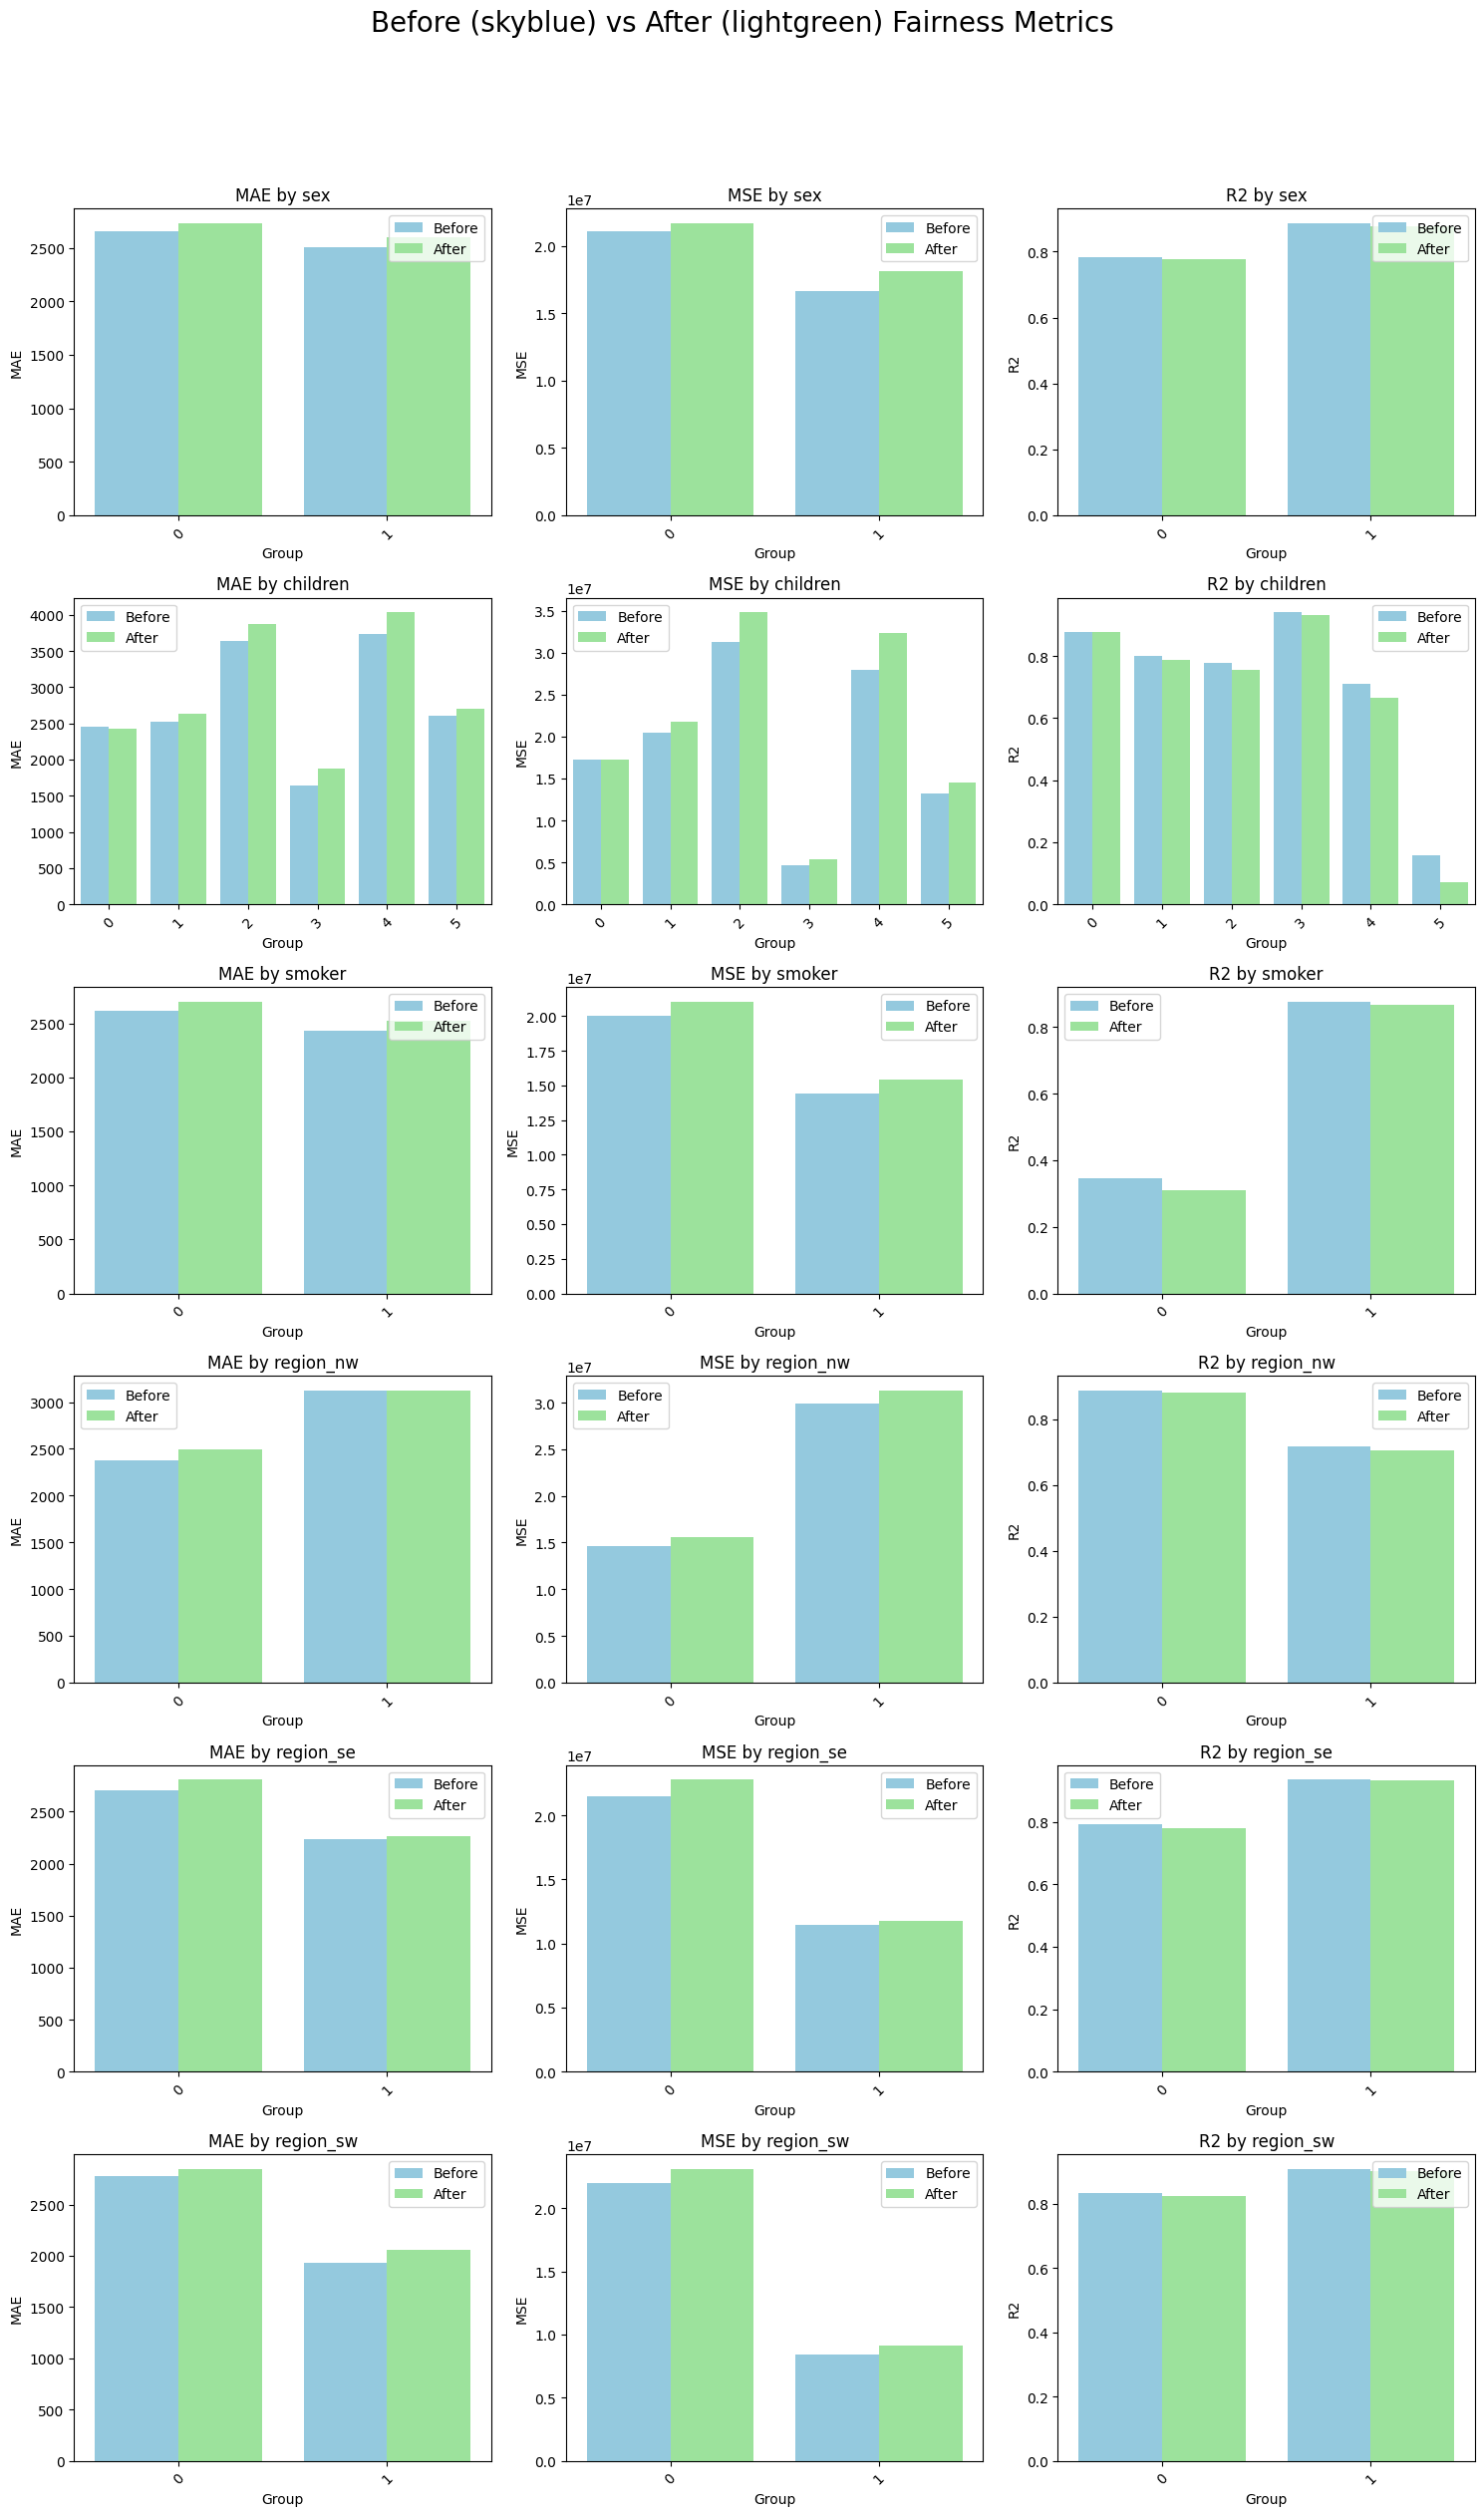

done.
  - Fairness grids plotted.

⚖️ Step 7: Comparing group-wise influence (detailed breakdown)...
- Comparing before/after metrics for each group (influence)... done.
  - Group-wise influence comparison done.

📝 Step 8: Summarizing fairness improvement report...


For Metric: MAE



Feature Metric  Mean_before  Stddev_before   Mean_after  Stddev_after  \
0  Overall MAE    MAE  2620.994691     518.735154  2729.643920    548.156013   
1     children    MAE  2763.707047     725.828290  2922.100775    776.408051   
2    region_nw    MAE  2748.308240     374.643866  2806.985301    316.851732   
3    region_se    MAE  2468.903682     233.774669  2534.484595    273.499853   
4    region_sw    MAE  2352.933511     423.633080  2451.784155    397.025689   
5          sex    MAE  2581.137045      77.691834  2665.588982     63.997266   
6       smoker    MAE  2525.553909      93.296817  2612.005998     90.077501   

        ΔMean    ΔStddev  
0  108.649229  29.420859  
1  158.393729  50.579762  
2   58.677060 -57.792134  
3   65.580913  39.725184  
4   98.850644 -26.607391  
5   84.451937 -13.694568  
6   86.452090  -3.219315



For Metric: MSE



Feature Metric   Mean_before  Stddev_before    Mean_after  \
7   Overall MSE    MSE  1.841629e+07   7.167530e+06  1.975335e+07   
8      children    MSE  1.910506e+07   8.897690e+06  2.101448e+07   
9     region_nw    MSE  2.226073e+07   7.608442e+06  2.342573e+07   
10    region_se    MSE  1.645459e+07   5.023681e+06  1.726109e+07   
11    region_sw    MSE  1.521874e+07   6.765552e+06  1.613812e+07   
12          sex    MSE  1.887045e+07   2.208657e+06  1.991484e+07   
13       smoker    MSE  1.721067e+07   2.787362e+06  1.824357e+07   

    Stddev_after         ΔMean       ΔStddev  
7   7.924311e+06  1.337055e+06  7.567810e+05  
8   1.016371e+07  1.909423e+06  1.266020e+06  
9   7.870461e+06  1.164998e+06  2.620191e+05  
10  5.528649e+06  8.064980e+05  5.049673e+05  
11  7.004335e+06  9.193754e+05  2.387824e+05  
12  1.769075e+06  1.044396e+06 -4.395818e+05  
13  2.812428e+06  1.032899e+06  2.506612e+04



For Metric: R2



Feature Metric  Mean_before  Stddev_before  Mean_after  Stddev_after  \
14  Overall R2     R2     0.764556       0.208291    0.746414      0.227003   
15    children     R2     0.711055       0.258432    0.681101      0.285888   
16   region_nw     R2     0.802075       0.084314    0.791832      0.087556   
17   region_se     R2     0.863957       0.071407    0.856772      0.076887   
18   region_sw     R2     0.870940       0.038237    0.862877      0.038988   
19         sex     R2     0.835198       0.050999    0.827034      0.049027   
20      smoker     R2     0.611113       0.265937    0.589496      0.278963   

       ΔMean   ΔStddev  
14 -0.018142  0.018712  
15 -0.029954  0.027456  
16 -0.010243  0.003241  
17 -0.007186  0.005481  
18 -0.008063  0.000751  
19 -0.008164 -0.001972  
20 -0.021617  0.013026

  - Fairness improvement report summarized.

✅ Fairness audit complete.


In [3]:
# =====================================================
# 📊 Stage 1: Run Baseline Model Pipeline
# -----------------------------------------------------
# Here we train the baseline model without advanced
# feature engineering or fairness augmentation.
#
# - Use XGBRegressor with default params
# - Split data stratified by smoker/sex
# - Audit fairness on sensitive attributes
# =====================================================


## Define pipeline parameters
target = 'charges';  hue = 'smoker'; stratify_by = ['smoker', 'sex']
key_features = ['sex','children','smoker','region_nw', 'region_se', 'region_sw']
metrics = {"MAE": mean_absolute_error, "MSE": mean_squared_error, "R2": r2_score}


## Run Stage Pipeline
all_results = run_stage_pipeline(model=define_xgb(), df=df, target=target, hue=hue, 
                                 key_features=key_features, stratify_by=stratify_by, metrics=metrics)


# 6. Data transformation / upsampling

In [5]:
# =====================================================
# 🛠 Feature Engineering & Transformation
# -----------------------------------------------------
# - Bins age & BMI into groups
# - Creates interaction features (age*BMI, BMI*smoker)
# - Adds high-risk flags
# - Upsamples groups for fairness balance
# =====================================================

# Convert selected columns to categorical
#cat_cols = []

# Firstly, let us define one-hot features
#one_hot_features = []

# Combine categories for children for better data representation, now 2 children means 2+
# replace_dict = {'children': {3: 2, 4: 2, 5: 2 }}
# Encode categorical columns -> binary & one-hot
# dff = ReplaceEncode(df, replace_dict=replace_dict, one_hot_features=one_hot_features, drop_first=True)



from transformation import *
dff = transform_data(df)   # transformation returns engineered dataset

dff.to_csv('feature_engineered_dataset.csv', index=False)  # Save for traceability
display(dff)
display(describe_column_stats(dff))

1️⃣ Binning age and BMI...
2️⃣ Creating interaction features...
3️⃣ Adding behavioral flags...


age  sex        bmi  children  smoker       charges  region_nw  \
0     19.039955    0  23.488974         2       0   2909.311311          0   
1     21.916779    0  21.225996         3       0   4294.771494          1   
2     20.936318    0  17.405881         1       0   2582.169190          0   
3     18.987434    0  24.680078         0       0   1732.690359          0   
4     19.067020    0  24.714349         1       0   2716.504057          1   
...         ...  ...        ...       ...     ...           ...        ...   
2845  58.787753    0  36.767937         1       1  47990.457579          0   
2846  58.227197    1  37.045471         2       1  47420.386906          1   
2847  59.159221    1  40.974023         1       1  48915.437552          0   
2848  58.955997    0  36.785274         1       1  47952.488453          0   
2849  58.248467    1  36.828153         2       1  47317.546000          1   

      region_se  region_sw  age_bin  bmi_bin     age__bmi  age__smoker  \
0             0          1        0        0   445.249697     0.000000   
1             0          0        0        0   470.157300     0.000000   
2             0          1        0        0   367.083388     0.000000   
3             0          1        0        0   469.378079     0.000000   
4             0          0        0        0   467.772223     0.000000   
...         ...        ...      ...      ...          ...          ...   
2845          0          0        4        4  2173.435156    58.825622   
2846          0          0        4        4  2132.835648    58.086677   
2847          1          0        4        4  2417.340831    59.113096   
2848          0          0        4        4  2159.967755    58.965363   
2849          0          0        4        4  2142.688093    57.852470   

      bmi__smoker  is_high_risk  is_young_smoker  
0        0.000000             0                0  
1        0.000000             0                0  
2        0.000000             0                0  
3        0.000000             0                0  
4        0.000000             0                0  
...           ...           ...              ...  
2845    36.921478             0                0  
2846    36.991727             0                0  
2847    41.005623             0                0  
2848    36.595582             0                0  
2849    37.097727             0                0  

[2850 rows x 16 columns]

- Generating dataframe column summary... done.


Column     Type  Unique Counts      Min       Max  \
0               age  float64           2850    17.91     64.31   
1               sex    int64              2     0.00      1.00   
2               bmi  float64           2850    15.97     52.84   
3          children    int64              6     0.00      5.00   
4            smoker    int64              2     0.00      1.00   
5           charges  float64           2850  1119.78  64047.64   
6         region_nw    int32              2     0.00      1.00   
7         region_se    int32              2     0.00      1.00   
8         region_sw    int32              2     0.00      1.00   
9           age_bin    int64              5     0.00      4.00   
10          bmi_bin    int64              5     0.00      4.00   
11         age__bmi  float64           2850   288.31   2855.92   
12      age__smoker  float64           1426     0.00     64.31   
13      bmi__smoker  float64           1426     0.00     52.84   
14     is_high_risk    int32              2     0.00      1.00   
15  is_young_smoker    int32              2     0.00      1.00   

                                 Unique Sample Values  
0   17.91, 17.91, 17.92, 17.92, 17.92 ... 64.26, 6...  
1                                                0, 1  
2   15.97, 16.82, 16.89, 17.15, 17.16 ... 52.37, 5...  
3                                    0, 1, 2, 3, 4...  
4                                                0, 1  
5   1119.78, 1133.61, 1135.09, 1135.11, 1135.53 .....  
6                                                0, 1  
7                                                0, 1  
8                                                0, 1  
9                                       0, 1, 2, 3, 4  
10                                      0, 1, 2, 3, 4  
11  288.31, 310.54, 310.64, 311.1, 311.34 ... 2609...  
12  0.0, 17.91, 17.91, 17.92, 17.92 ... 64.27, 64....  
13  0.0, 17.18, 17.2, 17.23, 17.25 ... 52.37, 52.4...  
14                                               0, 1  
15                                               0, 1

# 7. Running the complete code pipeline for Stage 2 

## A. Exploratory Data Analysis


- Descriptive Statistics with Enhanced Features:
- Calculating enhanced descriptive statistics... done.


age       sex       bmi  children    smoker    charges  \
count           2850.000  2850.000  2850.000  2850.000  2850.000   2850.000   
mean              39.819     0.525    30.735     1.076     0.500  20593.123   
std               14.271     0.499     6.040     1.177     0.500  15185.164   
min               17.910     0.000    15.973     0.000     0.000   1119.775   
25%               27.064     0.000    26.394     0.000     0.000   7259.420   
50%               40.018     1.000    30.538     1.000     0.500  16607.322   
75%               51.811     1.000    34.768     2.000     1.000  34937.714   
max               64.308     1.000    52.838     5.000     1.000  64047.643   
cv                 0.358     0.951     0.197     1.093     1.000      0.737   
IQR               24.747     1.000     8.374     2.000     1.000  27678.294   
skew              -0.042    -2.852     0.098     0.195     0.000      0.787   
upper_lim         57.707     1.000    36.883     2.500     1.250  44102.910   
lower_lim         20.587    -0.500    24.322    -0.500    -0.250   2585.469   
outlier_spread     1.250     0.667     2.935     1.667     0.667      1.516   

                region_nw  region_se  region_sw   age_bin   bmi_bin  age__bmi  \
count            2850.000   2850.000   2850.000  2850.000  2850.000  2850.000   
mean                0.235      0.292      0.231     2.000     2.000  1223.260   
std                 0.424      0.455      0.422     1.414     1.414   501.719   
min                 0.000      0.000      0.000     0.000     0.000   288.309   
25%                 0.000      0.000      0.000     1.000     1.000   803.823   
50%                 0.000      0.000      0.000     2.000     2.000  1174.341   
75%                 0.000      1.000      0.000     3.000     3.000  1593.656   
max                 1.000      1.000      1.000     4.000     4.000  2855.921   
cv                  1.804      1.559      1.824     0.707     0.707     0.410   
IQR                 0.000      1.000      0.000     2.000     2.000   789.834   
skew                1.663      1.924      1.645     0.000     0.000     0.293   
upper_lim           0.000      1.500      0.000     3.500     3.500  1803.314   
lower_lim           0.000      0.000      0.000     0.500     0.500   618.564   
outlier_spread        inf      0.667        inf     1.333     1.333     2.167   

                age__smoker  bmi__smoker  is_high_risk  is_young_smoker  
count              2850.000     2850.000      2850.000         2850.000  
mean                 19.998       15.400         0.011            0.142  
std                  22.457       15.974         0.105            0.350  
min                   0.000        0.000         0.000            0.000  
25%                   0.000        0.000         0.000            0.000  
50%                   8.956        8.591         0.000            0.000  
75%                  41.072       30.644         0.000            0.000  
max                  64.306       52.840         1.000            1.000  
cv                    1.123        1.037         9.386            2.454  
IQR                  41.072       30.644         0.000            0.000  
skew                  1.475        1.279         0.320            1.223  
upper_lim            57.130       41.671         0.000            0.000  
lower_lim            -4.478       -4.295         0.000            0.000  
outlier_spread        1.044        1.150           inf              inf


- Univariate Distribution & Boxplots:
- Generating univariate plots with hue='smoker'... 

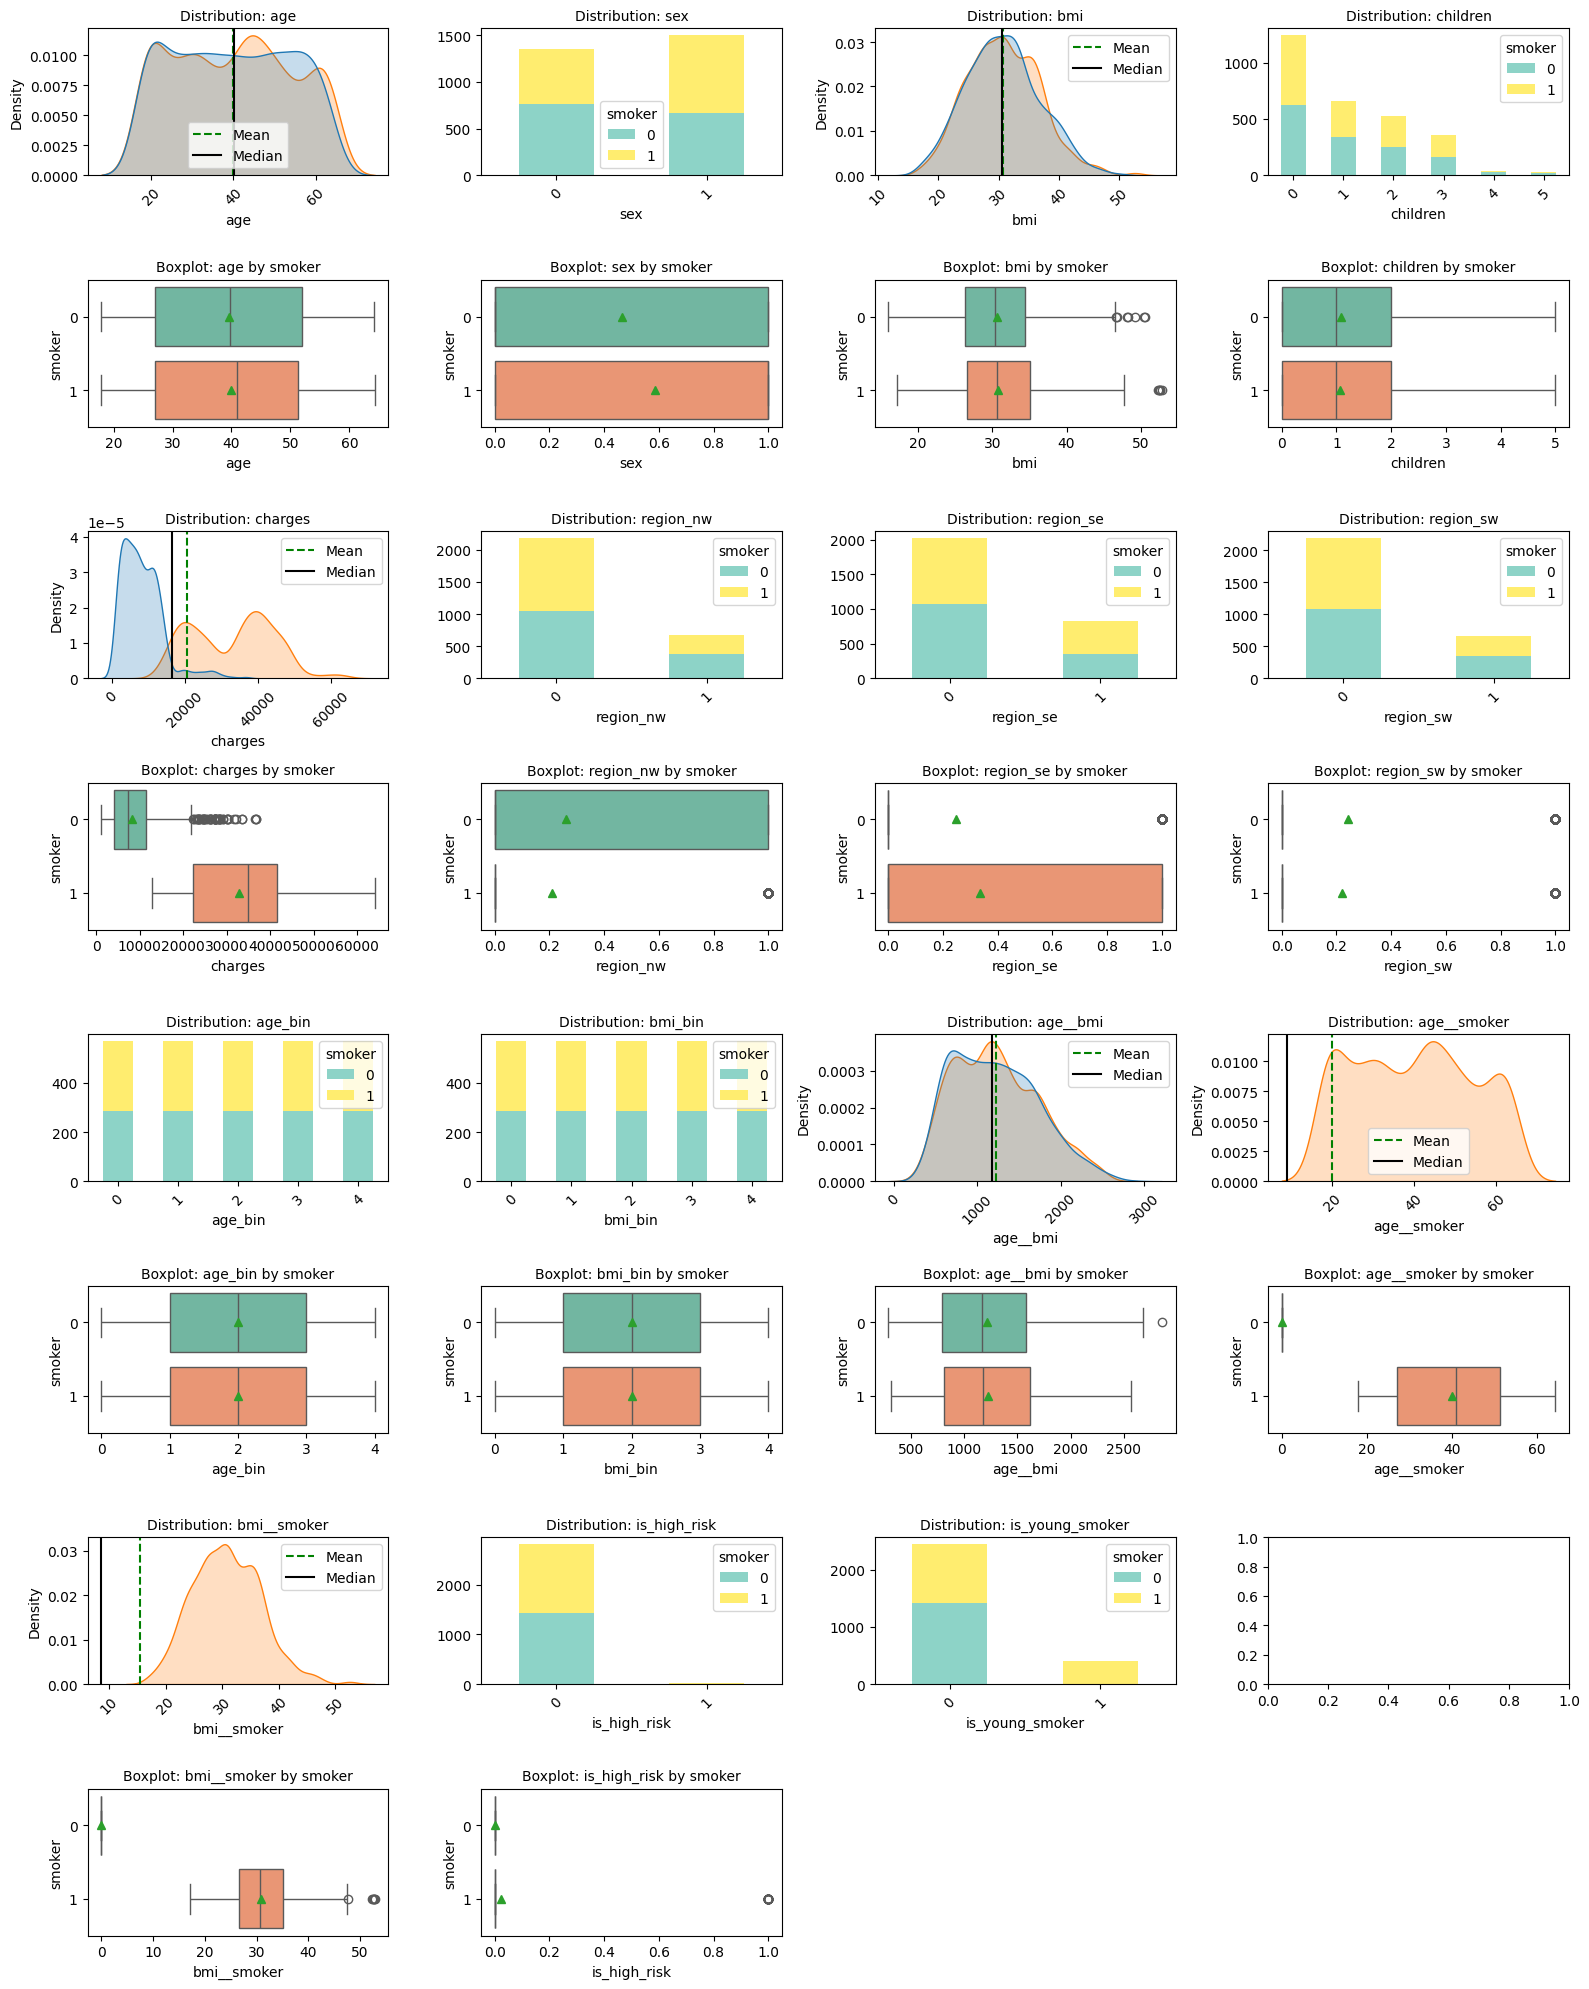

done.

- Correlation Heatmap:
- Calculating correlation matrix using 'spearman'... 

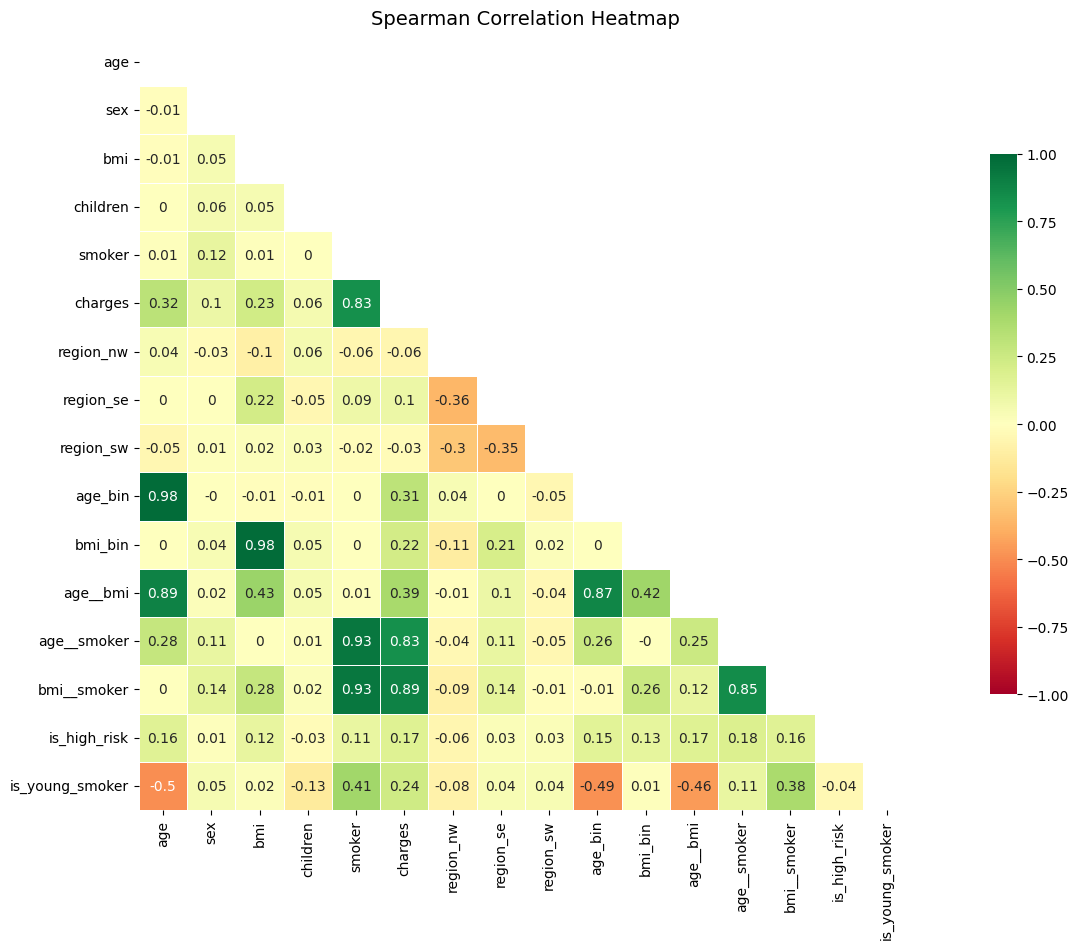

done.

- Bi-variate plot of attributes with 'charges':
- Creating bivariate plots for 'charges' with hue 'smoker'... 

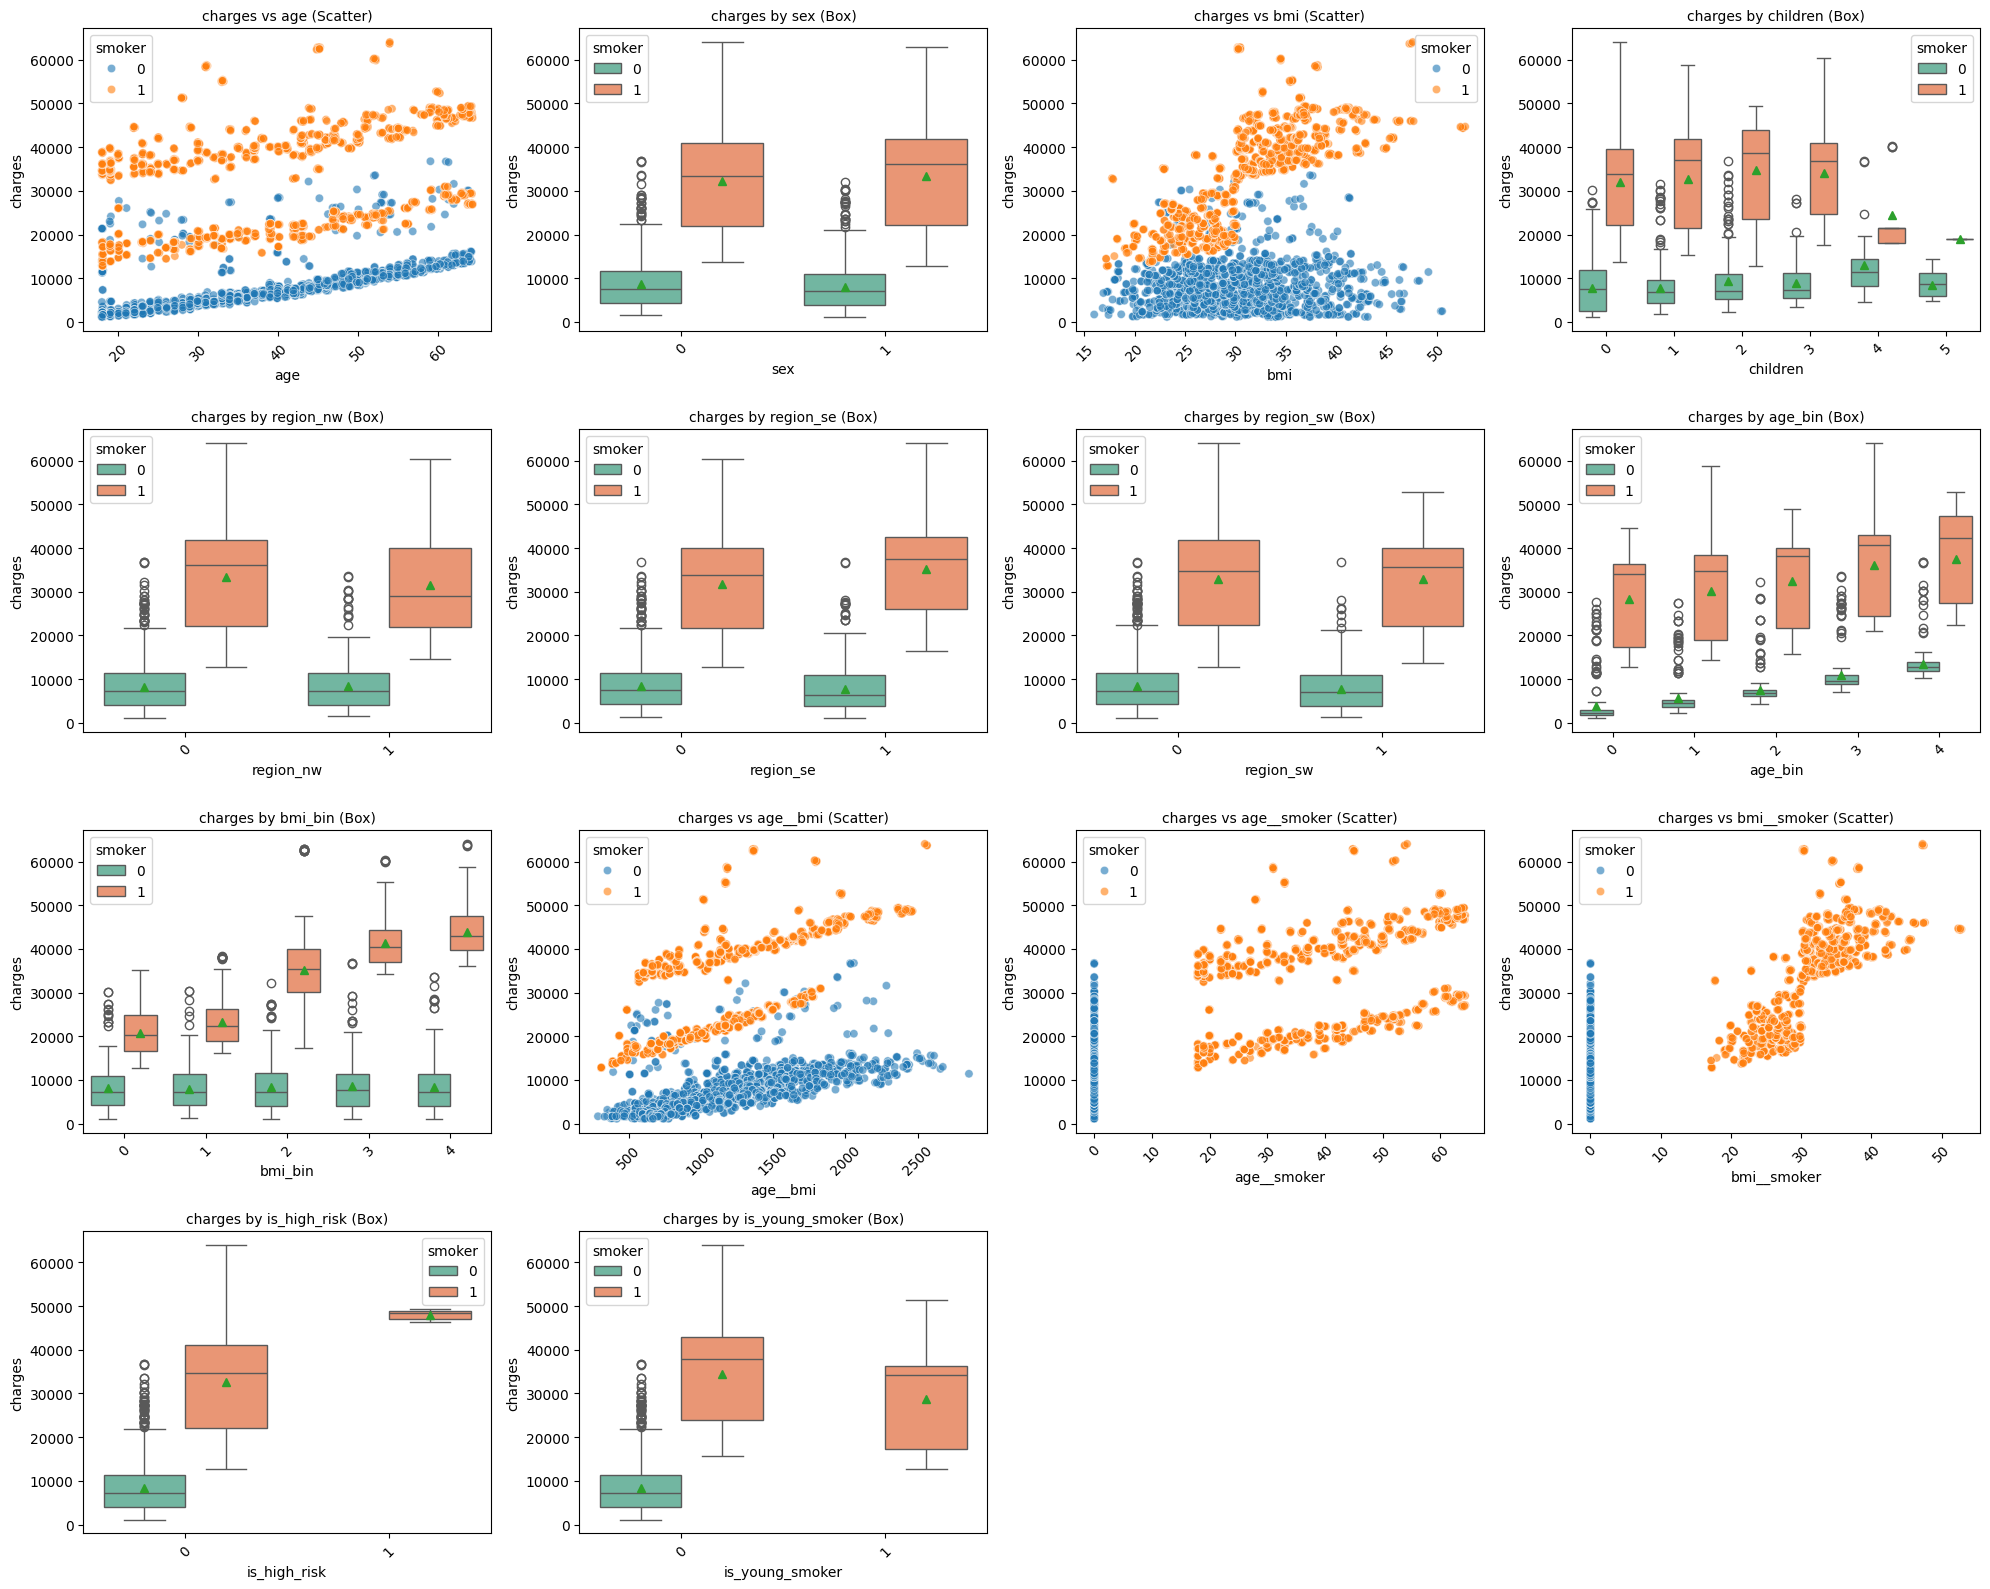

done.
done.


## B. Data Fairness Audit

## Dataset Fairness Profile Summary (Median Based)

### Subgroup Imbalance
| Feature   | Value Counts                                    |   Imbalance Ratio |
|:----------|:------------------------------------------------|------------------:|
| smoker    | {0: 1425, 1: 1425}                              |             1     |
| bmi_bin   | {0: 570, 1: 570, 2: 570, 3: 570, 4: 570}        |             1     |
| age_bin   | {0: 570, 1: 570, 2: 570, 3: 570, 4: 570}        |             1     |
| children  | {0: 1242, 1: 661, 2: 526, 3: 354, 4: 42, 5: 25} |             0.02  |
| sex       | {1: 1497, 0: 1353}                              |             0.904 |
| region_nw | {0: 2180, 1: 670}                               |             0.307 |
| region_se | {0: 2019, 1: 831}                               |             0.412 |
| region_sw | {0: 2191, 1: 659}                               |             0.301 |

### Target Influences (vs Overall Median)
| Feature   |   Group |   Group Median |   Overall Median |   Δ vs Overall Median |
|:----------|--------:|---------------:|-----------------:|----------------------:|
| smoker    |       0 |        7257.8  |          16607.3 |              -9349.53 |
| smoker    |       1 |       34917.3  |          16607.3 |              18310    |
| bmi_bin   |       0 |       14259.3  |          16607.3 |              -2348.04 |
| bmi_bin   |       1 |       16459.8  |          16607.3 |               -147.49 |
| bmi_bin   |       2 |       19560.9  |          16607.3 |               2953.61 |
| bmi_bin   |       3 |       34309.5  |          16607.3 |              17702.2  |
| bmi_bin   |       4 |       34779.4  |          16607.3 |              18172    |
| age_bin   |       0 |       13873.8  |          16607.3 |              -2733.51 |
| age_bin   |       1 |       16589.1  |          16607.3 |                -18.19 |
| age_bin   |       2 |       18663    |          16607.3 |               2055.65 |
| age_bin   |       3 |       22122.6  |          16607.3 |               5515.31 |
| age_bin   |       4 |       25083.1  |          16607.3 |               8475.73 |
| children  |       0 |       14930.1  |          16607.3 |              -1677.21 |
| children  |       1 |       16428.3  |          16607.3 |               -179.01 |
| children  |       2 |       19461.8  |          16607.3 |               2854.53 |
| children  |       3 |       19270.8  |          16607.3 |               2663.5  |
| children  |       4 |       14357.1  |          16607.3 |              -2250.19 |
| children  |       5 |        8947.86 |          16607.3 |              -7659.46 |
| sex       |       0 |       13885    |          16607.3 |              -2722.35 |
| sex       |       1 |       19121.8  |          16607.3 |               2514.45 |
| region_nw |       0 |       17128.2  |          16607.3 |                520.85 |
| region_nw |       1 |       14239.3  |          16607.3 |              -2368.07 |
| region_se |       0 |       14404    |          16607.3 |              -2203.36 |
| region_se |       1 |       19753.3  |          16607.3 |               3146.03 |
| region_sw |       0 |       17117.9  |          16607.3 |                510.54 |
| region_sw |       1 |       14325.7  |          16607.3 |              -2281.65 |

### Feature Skewness
| Feature   |   Skewness | Highly Skewed   |
|:----------|-----------:|:----------------|
| smoker    |       0    | No              |
| bmi_bin   |       0    | No              |
| age_bin   |       0    | No              |
| children  |       0.85 | No              |
| sex       |      -0.1  | No              |
| region_nw |       1.25 | Yes             |
| region_se |       0.92 | No              |
| region_sw |       1.28 | Yes             |


## C. Model Training

🔧 Step 0: Initial Data Splitting (Stratified if possible)...
✅ Stratifying by combined columns: ['smoker', 'bmi_bin', 'age_bin']


## **Step 1: Baseline Model Performance (Standard XGBoost)** 📊


📈 Training Baseline Model...
📊 Evaluating Baseline Model (Overall Test Set)...
RMSE: 1683.91 MAE: 749.31 R2: 0.99
RMSE: 3531.34 MAE: 1442.82 R2: 0.94
Overall Test RMSE: 3531.34
Overall Test MAE: 1442.82
Overall Test R2: 0.94

--- Visualizing Baseline Model Performance ---

📐 Baseline Training Best-Fit Line: y = 0.9724x + 555.27

📐 Baseline Test Best-Fit Line: y = 0.9505x + 706.25


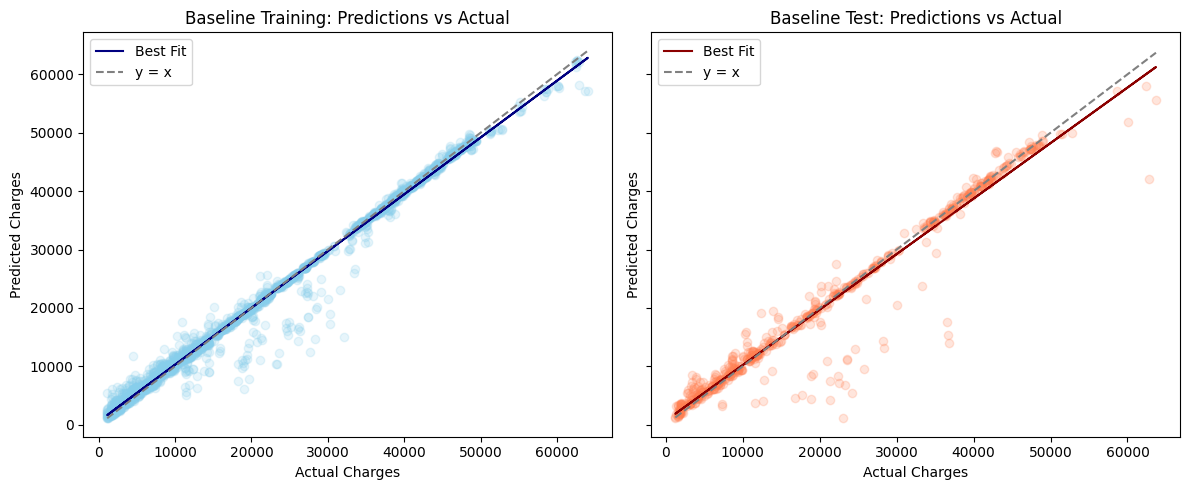

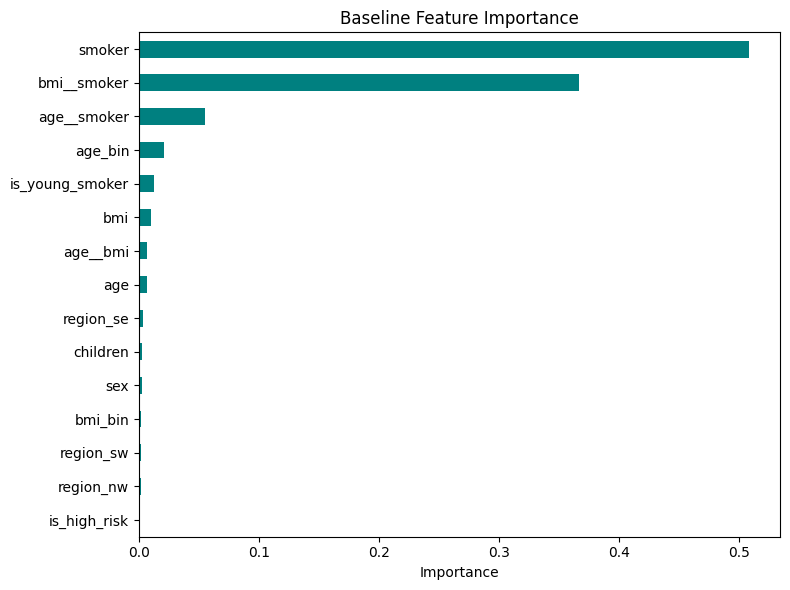


--- Collecting Group-wise Metrics for Baseline Model ---
✅ Baseline Model Evaluation Complete.


## **Step 2: Fairlearn-Constrained Model** ⚖️

✅ Dynamic `upper_bound` set to 1/3 of baseline training MAE: 249.77

📈 Training fairness-constrained model (constraints on ['smoker', 'bmi_bin', 'age_bin'])...
This process may take longer due to fairness optimization.
⚠️ Unable to compute constraint violations on training set for Fair Model: ConditionalLossMoment.gamma() got an unexpected keyword argument 'sensitive_features'. This might happen with certain model types or if gamma calculation is complex. Safe to ignore if primarily using overall performance and group-wise metrics.

📊 Evaluating Fairlearn-Constrained Model (Overall Test Set)...
RMSE: 1744.29 MAE: 789.83 R2: 0.99
RMSE: 3569.84 MAE: 1458.11 R2: 0.94
Overall Test RMSE: 3569.84
Overall Test MAE: 1458.11
Overall Test R2: 0.94

--- Visualizing Fairlearn-Constrained Model Performance ---

📐 Fairlearn Training Best-Fit Line: y = 0.9714x + 575.59

📐 Fairlearn Test Best-Fit Line: y = 0.9476x + 743.73


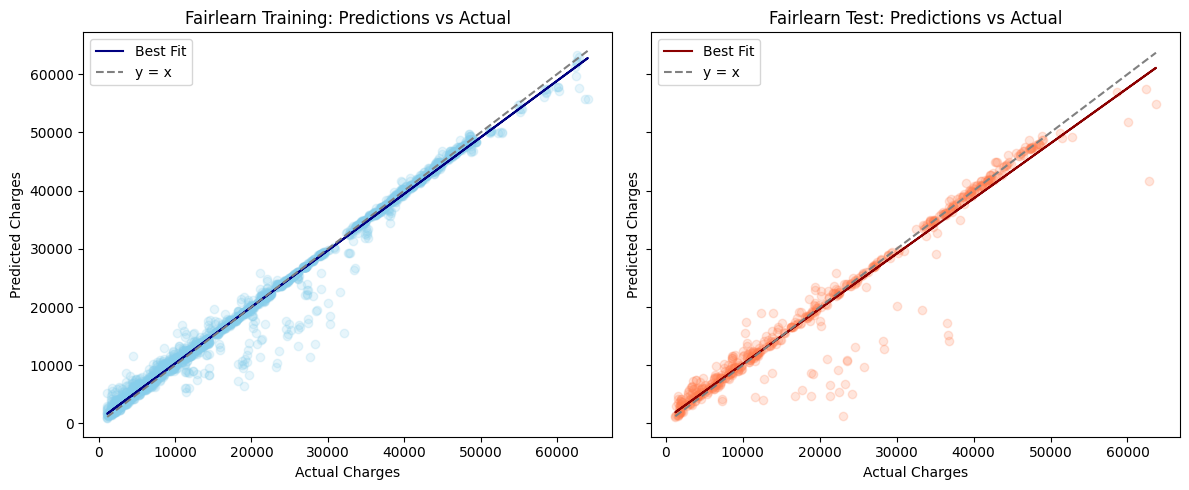


⚠️ Feature importance not available or empty for the Fairlearn model.

--- Collecting Group-wise Metrics for Fairlearn-Constrained Model ---
✅ Fairlearn Model Evaluation Complete.


## **Step 3: Hybrid Subgroup Model** 🎯


📈 Training Hybrid Subgroup Model...
🚀 Starting Hybrid Subgroup Model Training:
Non-smoker data points: 1139
Smoker data points: 1141
--------------------------------------------------

--- Training Standard Model for NON-SMOKERS ---
✅ Stratifying by combined columns: ['smoker', 'bmi_bin', 'age_bin']
RMSE: 1738.46 MAE: 857.28 R2: 0.90

--- Training FAIRNESS-AWARE Model for SMOKERS ---
✅ Stratifying by combined columns: ['smoker', 'bmi_bin', 'age_bin']
RMSE: 744.76 MAE: 350.05 R2: 1.00
✅ Dynamic `upper_bound` set to 1/3 of baseline training MAE: 116.68

📈 Training fairness-constrained model (constraints on ['smoker', 'bmi_bin', 'age_bin'])...
This process may take longer due to fairness optimization.
⚠️ Unable to compute constraint violations on training set for Fair Model: ConditionalLossMoment.gamma() got an unexpected keyword argument 'sensitive_features'. This might happen with certain model types or if gamma calculation is complex. Safe to ignore if primarily using overall performa

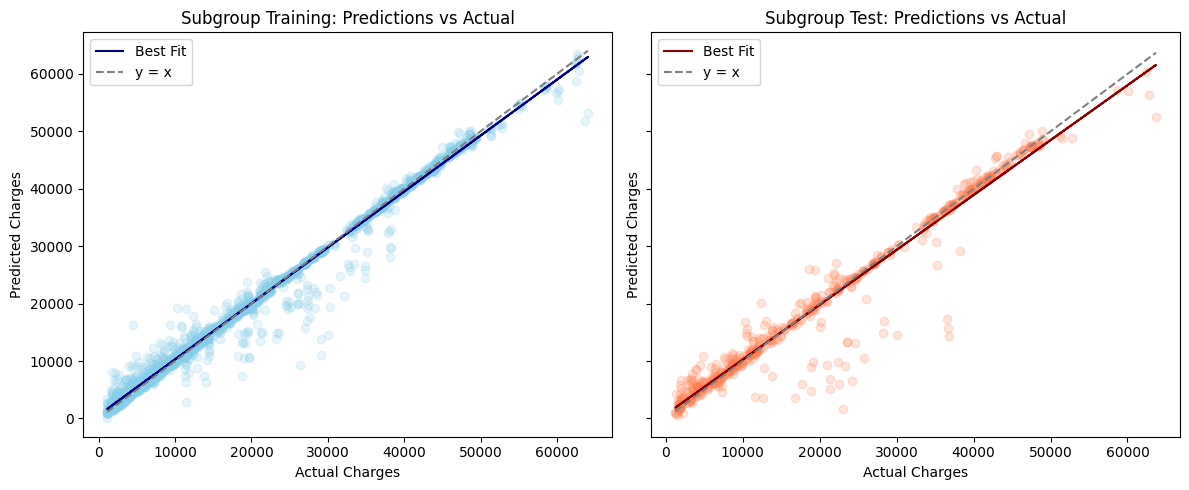


Note: Feature importance for the composite Hybrid Subgroup Model is not directly plotted here.
To inspect individual subgroup model importances, access `subgrp_model.non_smoker_model` and `subgrp_model.smoker_model`.

--- Collecting Group-wise Metrics for Hybrid Subgroup Model ---
✅ Hybrid Subgroup Model Evaluation Complete.


## **Step 4: Comparative Feature-wise Analysis** 📈⚖️🎯

Comparing MAE, MSE, and R² across Baseline, Fairlearn, and Hybrid Subgroup Models:


### Comparative Mean Absolute Error by Feature

Feature   Group  Baseline MAE  Fairlearn MAE  Subgroup MAE
0               sex       0     1725.3116      1705.0290     1727.6467
1               sex       1     1139.7858      1193.2270     1217.9593
2               sex    Mean     1432.5487      1449.1280     1472.8030
3               sex  StdDev      292.7629       255.9010      254.8437
4          children       0     1335.7830      1309.3355     1318.8878
5          children       1     1456.2865      1491.6544     1647.3527
6          children       2     1855.0607      1933.1991     1870.9427
7          children       3      659.1666       690.6598      609.3210
8          children       4    10851.4084     10969.1910    11467.6535
9          children       5      857.8454       854.4001      588.2993
10         children    Mean     2835.9251      2874.7400     2917.0762
11         children  StdDev     3605.8973      3642.8476     3854.0478
12           smoker       0     2155.0589      2170.1706     2203.1798
13           smoker       1      725.5675       741.0289      755.2295
14           smoker    Mean     1440.3132      1455.5997     1479.2046
15           smoker  StdDev      714.7457       714.5709      723.9751
16        region_nw       0     1416.0716      1432.9003     1474.2621
17        region_nw       1     1538.0494      1547.8428     1508.3836
18        region_nw    Mean     1477.0605      1490.3716     1491.3229
19        region_nw  StdDev       60.9889        57.4713       17.0608
20        region_se       0     1407.2454      1400.2857     1442.6801
21        region_se       1     1531.6511      1602.4829     1579.2871
22        region_se    Mean     1469.4483      1501.3843     1510.9836
23        region_se  StdDev       62.2028       101.0986       68.3035
24        region_sw       0     1523.7159      1549.3504     1527.4810
25        region_sw       1     1166.2738      1146.1819     1325.3911
26        region_sw    Mean     1344.9949      1347.7661     1426.4360
27        region_sw  StdDev      178.7210       201.5842      101.0450
28          age_bin       0     1979.3139      1972.5936     1893.7253
29          age_bin       1     1205.0529      1247.6926     1451.1706
30          age_bin       2     1361.3817      1371.3401     1418.6545
31          age_bin       3     1269.1596      1319.8175     1136.5300
32          age_bin       4     1400.3480      1379.6157     1511.9369
33          age_bin    Mean     1443.0512      1458.2119     1482.4035
34          age_bin  StdDev      276.7499       261.4513      242.7862
35          bmi_bin       0     1308.0327      1325.9542     1463.9449
36          bmi_bin       1     1074.5499      1063.0004     1175.2256
37          bmi_bin       2     1592.2287      1642.8515     1481.1956
38          bmi_bin       3     2034.7798      2061.7289     2028.9008
39          bmi_bin       4     1194.3810      1185.7504     1253.4039
40          bmi_bin    Mean     1440.7944      1455.8571     1480.5341
41          bmi_bin  StdDev      342.9960       359.5042      298.5911
42     is_high_risk       0     1458.3005      1475.1036     1497.0159
43     is_high_risk       1      477.9402       398.6542      529.8534
44     is_high_risk    Mean      968.1204       936.8789     1013.4347
45     is_high_risk  StdDev      490.1801       538.2247      483.5812
46  is_young_smoker       0     1549.6098      1570.8644     1612.8815
47  is_young_smoker       1      798.1335       777.3861      690.0683
48  is_young_smoker    Mean     1173.8716      1174.1253     1151.4749
49  is_young_smoker  StdDev      375.7382       396.7392      461.4066

### Comparative Mean Squared Error by Feature

Feature   Group  Baseline MSE  Fairlearn MSE  Subgroup MSE
0               sex       0  1.651035e+07   1.659481e+07  1.559367e+07
1               sex       1  8.136492e+06   8.612649e+06  7.789261e+06
2               sex    Mean  1.232342e+07   1.260373e+07  1.169147e+07
3               sex  StdDev  4.186929e+06   3.991079e+06  3.902207e+06
4          children       0  1.014204e+07   1.035347e+07  9.010732e+06
5          children       1  1.139824e+07   1.154115e+07  1.217676e+07
6          children       2  1.951952e+07   2.022307e+07  1.823602e+07
7          children       3  1.836541e+06   1.656300e+06  8.217942e+05
8          children       4  2.053072e+08   2.107465e+08  2.088900e+08
9          children       5  7.484615e+05   9.601439e+05  3.932782e+05
10         children    Mean  4.149200e+07   4.258011e+07  4.158810e+07
11         children  StdDev  7.352919e+07   7.548591e+07  7.507826e+07
12           smoker       0  2.141914e+07   2.167240e+07  2.099850e+07
13           smoker       1  3.458501e+06   3.752257e+06  2.593698e+06
14           smoker    Mean  1.243882e+07   1.271233e+07  1.179610e+07
15           smoker  StdDev  8.980320e+06   8.960070e+06  9.202400e+06
16        region_nw       0  1.281544e+07   1.281700e+07  1.211924e+07
17        region_nw       1  1.124173e+07   1.248305e+07  1.079295e+07
18        region_nw    Mean  1.202859e+07   1.265002e+07  1.145609e+07
19        region_nw  StdDev  7.868562e+05   1.669784e+05  6.631461e+05
20        region_se       0  1.141333e+07   1.157929e+07  1.122123e+07
21        region_se       1  1.510960e+07   1.565138e+07  1.334441e+07
22        region_se    Mean  1.326146e+07   1.361534e+07  1.228282e+07
23        region_se  StdDev  1.848135e+06   2.036047e+06  1.061591e+06
24        region_sw       0  1.335860e+07   1.378730e+07  1.242740e+07
25        region_sw       1  9.433697e+06   9.176335e+06  9.780614e+06
26        region_sw    Mean  1.139615e+07   1.148182e+07  1.110400e+07
27        region_sw  StdDev  1.962450e+06   2.305483e+06  1.323391e+06
28          age_bin       0  1.936699e+07   2.022822e+07  1.830004e+07
29          age_bin       1  8.233811e+06   8.044362e+06  8.844008e+06
30          age_bin       2  8.491729e+06   8.607048e+06  7.440014e+06
31          age_bin       3  9.628128e+06   1.003301e+07  6.575844e+06
32          age_bin       4  1.669297e+07   1.686613e+07  1.808297e+07
33          age_bin    Mean  1.248273e+07   1.275575e+07  1.184858e+07
34          age_bin  StdDev  4.631400e+06   4.889893e+06  5.229792e+06
35          bmi_bin       0  9.127307e+06   8.888216e+06  1.012420e+07
36          bmi_bin       1  6.638094e+06   6.958862e+06  7.353040e+06
37          bmi_bin       2  1.517655e+07   1.630967e+07  1.142533e+07
38          bmi_bin       3  2.505519e+07   2.521297e+07  2.400420e+07
39          bmi_bin       4  6.208487e+06   6.191788e+06  6.174064e+06
40          bmi_bin    Mean  1.244113e+07   1.271230e+07  1.181617e+07
41          bmi_bin  StdDev  7.072475e+06   7.203479e+06  6.376779e+06
42     is_high_risk       0  1.266626e+07   1.294514e+07  1.201127e+07
43     is_high_risk       1  2.574462e+05   1.912832e+05  4.287178e+05
44     is_high_risk    Mean  6.461853e+06   6.568213e+06  6.219994e+06
45     is_high_risk  StdDev  6.204407e+06   6.376930e+06  5.791276e+06
46  is_young_smoker       0  1.407722e+07   1.426136e+07  1.344460e+07
47  is_young_smoker       1  2.769481e+06   3.582019e+06  2.071267e+06
48  is_young_smoker    Mean  8.423351e+06   8.921687e+06  7.757932e+06
49  is_young_smoker  StdDev  5.653869e+06   5.339668e+06  5.686665e+06

### Comparative R-squared by Feature

Feature   Group  Baseline R2  Fairlearn R2  Subgroup R2
0               sex       0       0.9224        0.9220       0.9267
1               sex       1       0.9652        0.9632       0.9667
2               sex    Mean       0.9438        0.9426       0.9467
3               sex  StdDev       0.0214        0.0206       0.0200
4          children       0       0.9549        0.9540       0.9599
5          children       1       0.9500        0.9493       0.9465
6          children       2       0.9155        0.9125       0.9211
7          children       3       0.9913        0.9921       0.9961
8          children       4       0.0322        0.0066       0.0154
9          children       5       0.9060        0.8794       0.9506
10         children    Mean       0.7917        0.7823       0.7983
11         children  StdDev       0.3408        0.3487       0.3508
12           smoker       0       0.4346        0.4279       0.4457
13           smoker       1       0.9714        0.9690       0.9786
14           smoker    Mean       0.7030        0.6984       0.7121
15           smoker  StdDev       0.2684        0.2705       0.2664
16        region_nw       0       0.9443        0.9443       0.9474
17        region_nw       1       0.9449        0.9388       0.9471
18        region_nw    Mean       0.9446        0.9416       0.9472
19        region_nw  StdDev       0.0003        0.0028       0.0001
20        region_se       0       0.9465        0.9458       0.9474
21        region_se       1       0.9394        0.9373       0.9465
22        region_se    Mean       0.9430        0.9415       0.9470
23        region_se  StdDev       0.0035        0.0042       0.0005
24        region_sw       0       0.9390        0.9370       0.9432
25        region_sw       1       0.9619        0.9629       0.9605
26        region_sw    Mean       0.9504        0.9500       0.9518
27        region_sw  StdDev       0.0115        0.0130       0.0086
28          age_bin       0       0.9061        0.9019       0.9113
29          age_bin       1       0.9636        0.9644       0.9608
30          age_bin       2       0.9573        0.9567       0.9626
31          age_bin       3       0.9603        0.9586       0.9729
32          age_bin       4       0.9149        0.9140       0.9078
33          age_bin    Mean       0.9404        0.9391       0.9431
34          age_bin  StdDev       0.0247        0.0259       0.0277
35          bmi_bin       0       0.8607        0.8643       0.8455
36          bmi_bin       1       0.9135        0.9093       0.9042
37          bmi_bin       2       0.9345        0.9296       0.9507
38          bmi_bin       3       0.9089        0.9084       0.9128
39          bmi_bin       4       0.9826        0.9827       0.9827
40          bmi_bin    Mean       0.9200        0.9189       0.9192
41          bmi_bin  StdDev       0.0395        0.0384       0.0463
42     is_high_risk       0       0.9416        0.9404       0.9447
43     is_high_risk       1       0.7104        0.7848       0.5178
44     is_high_risk    Mean       0.8260        0.8626       0.7312
45     is_high_risk  StdDev       0.1156        0.0778       0.2134
46  is_young_smoker       0       0.9393        0.9385       0.9420
47  is_young_smoker       1       0.9731        0.9652       0.9799
48  is_young_smoker    Mean       0.9562        0.9518       0.9609
49  is_young_smoker  StdDev       0.0169        0.0134       0.0189




**End of Comparative Analysis.**


## D. SHAP Model explainability analysis

Standard model detected. Using default shap.Explainer().
Calculating SHAP values... (This may take a moment for non-tree models)


 99%|===================| 2814/2850 [00:24<00:00]        

Tree explainer detected. Computing SHAP interaction values...


Feature  Mean |SHAP|        Type
0       bmi__smoker  7146.058869  Engineered
1       age__smoker  2716.237219  Engineered
2            smoker  1973.273241    Original
3               age  1433.641269    Original
4               bmi  1332.224190    Original
5          age__bmi  1307.438397  Engineered
6          children   479.612032    Original
7           age_bin   202.983183  Engineered
8               sex   146.266743    Original
9         region_se   111.332168    Original
10        region_sw    87.501651    Original
11  is_young_smoker    67.327921    Original
12        region_nw    50.118937    Original
13          bmi_bin    39.090835  Engineered
14     is_high_risk     0.000000    Original

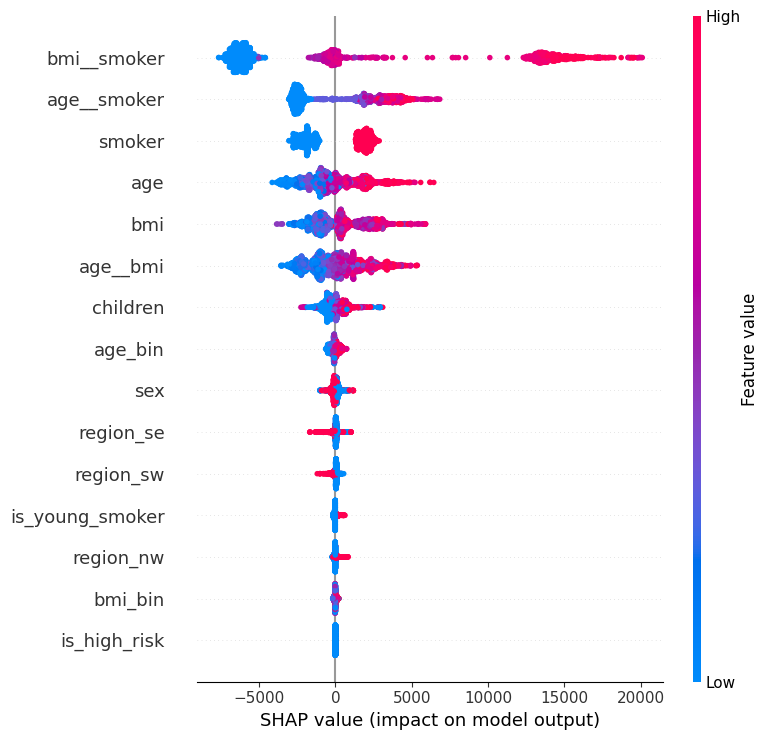

--- Starting Fairness Audit Pipeline ---

🔧 Step 1: Stratified split...
- Splitting data (stratified by ['smoker', 'bmi_bin', 'age_bin'])...
  - Data split done.

📊 Step 2: Generating predictions and evaluating overall scores (Before DC)...
- Generating uncorrected predictions...
  - Uncorrected predictions and scores calculated.

📈 Step 3: Applying dual correction...
- Splitting train/test datasets for DC application...
  - Dataframes prepared for DC.
  - Combined train and test data for DC fitting.
[TrippleFactorCorrection] Initialized. lambda_strength=1.0, min_group_size=3
- Calculating global shift...
- Calculating group-wise offsets...
[TrippleFactorCorrection] Fitting regression-based correction...
[TrippleFactorCorrection] Overall train MAE: 749.3143
[TrippleFactorCorrection] Fitted global regression: coef=0.6732, intercept=12.4397
  - Global shift and group-wise offsets calculated.
[TrippleFactorCorrection] Applying tripple-factor corrections to test predictions...
[transform_w

Parameter    Before DC     After DC     Impact
0  rmse_train  1683.912762  1683.912762   0.000000
1   mae_train   749.314266   749.314266   0.000000
2    r2_train     0.987763     0.987763   0.000000
3   rmse_test  3531.335556  3457.063647 -74.271909
4    mae_test  1442.821088  1421.235970 -21.585118
5     r2_test     0.944729     0.947030   0.002300

  - Overall performance comparison done.

📋 Step 5: Computing group-wise fairness metrics...
📋 Computing group-wise fairness metrics...

### Audit for `smoker` ###

Fairness Audit for smoker:
- smoker=0: before = 8070.68, after = 8161.73
- smoker=1: before = 32732.04, after = 32806.03

### Audit for `bmi_bin` ###

Fairness Audit for bmi_bin:
- bmi_bin=0: before = 14443.11, after = 14455.85
- bmi_bin=1: before = 15269.63, after = 15376.65
- bmi_bin=2: before = 21687.85, after = 21686.23
- bmi_bin=3: before = 24667.22, after = 24795.33
- bmi_bin=4: before = 25520.13, after = 25688.03

### Audit for `age_bin` ###

Fairness Audit for age_bin:
- age_bin=0: before = 15915.82, after = 15893.09
- age_bin=1: before = 17552.23, after = 17560.30
- age_bin=2: before = 19991.79, after = 20088.41
- age_bin=3: before = 23248.13, after = 23473.33
- age_bin=4: before = 25098.72, after = 25203.28

### Audit for `children` ###

Fairness Audit for children:
- children=0: before = 20135.89, after = 20170.2

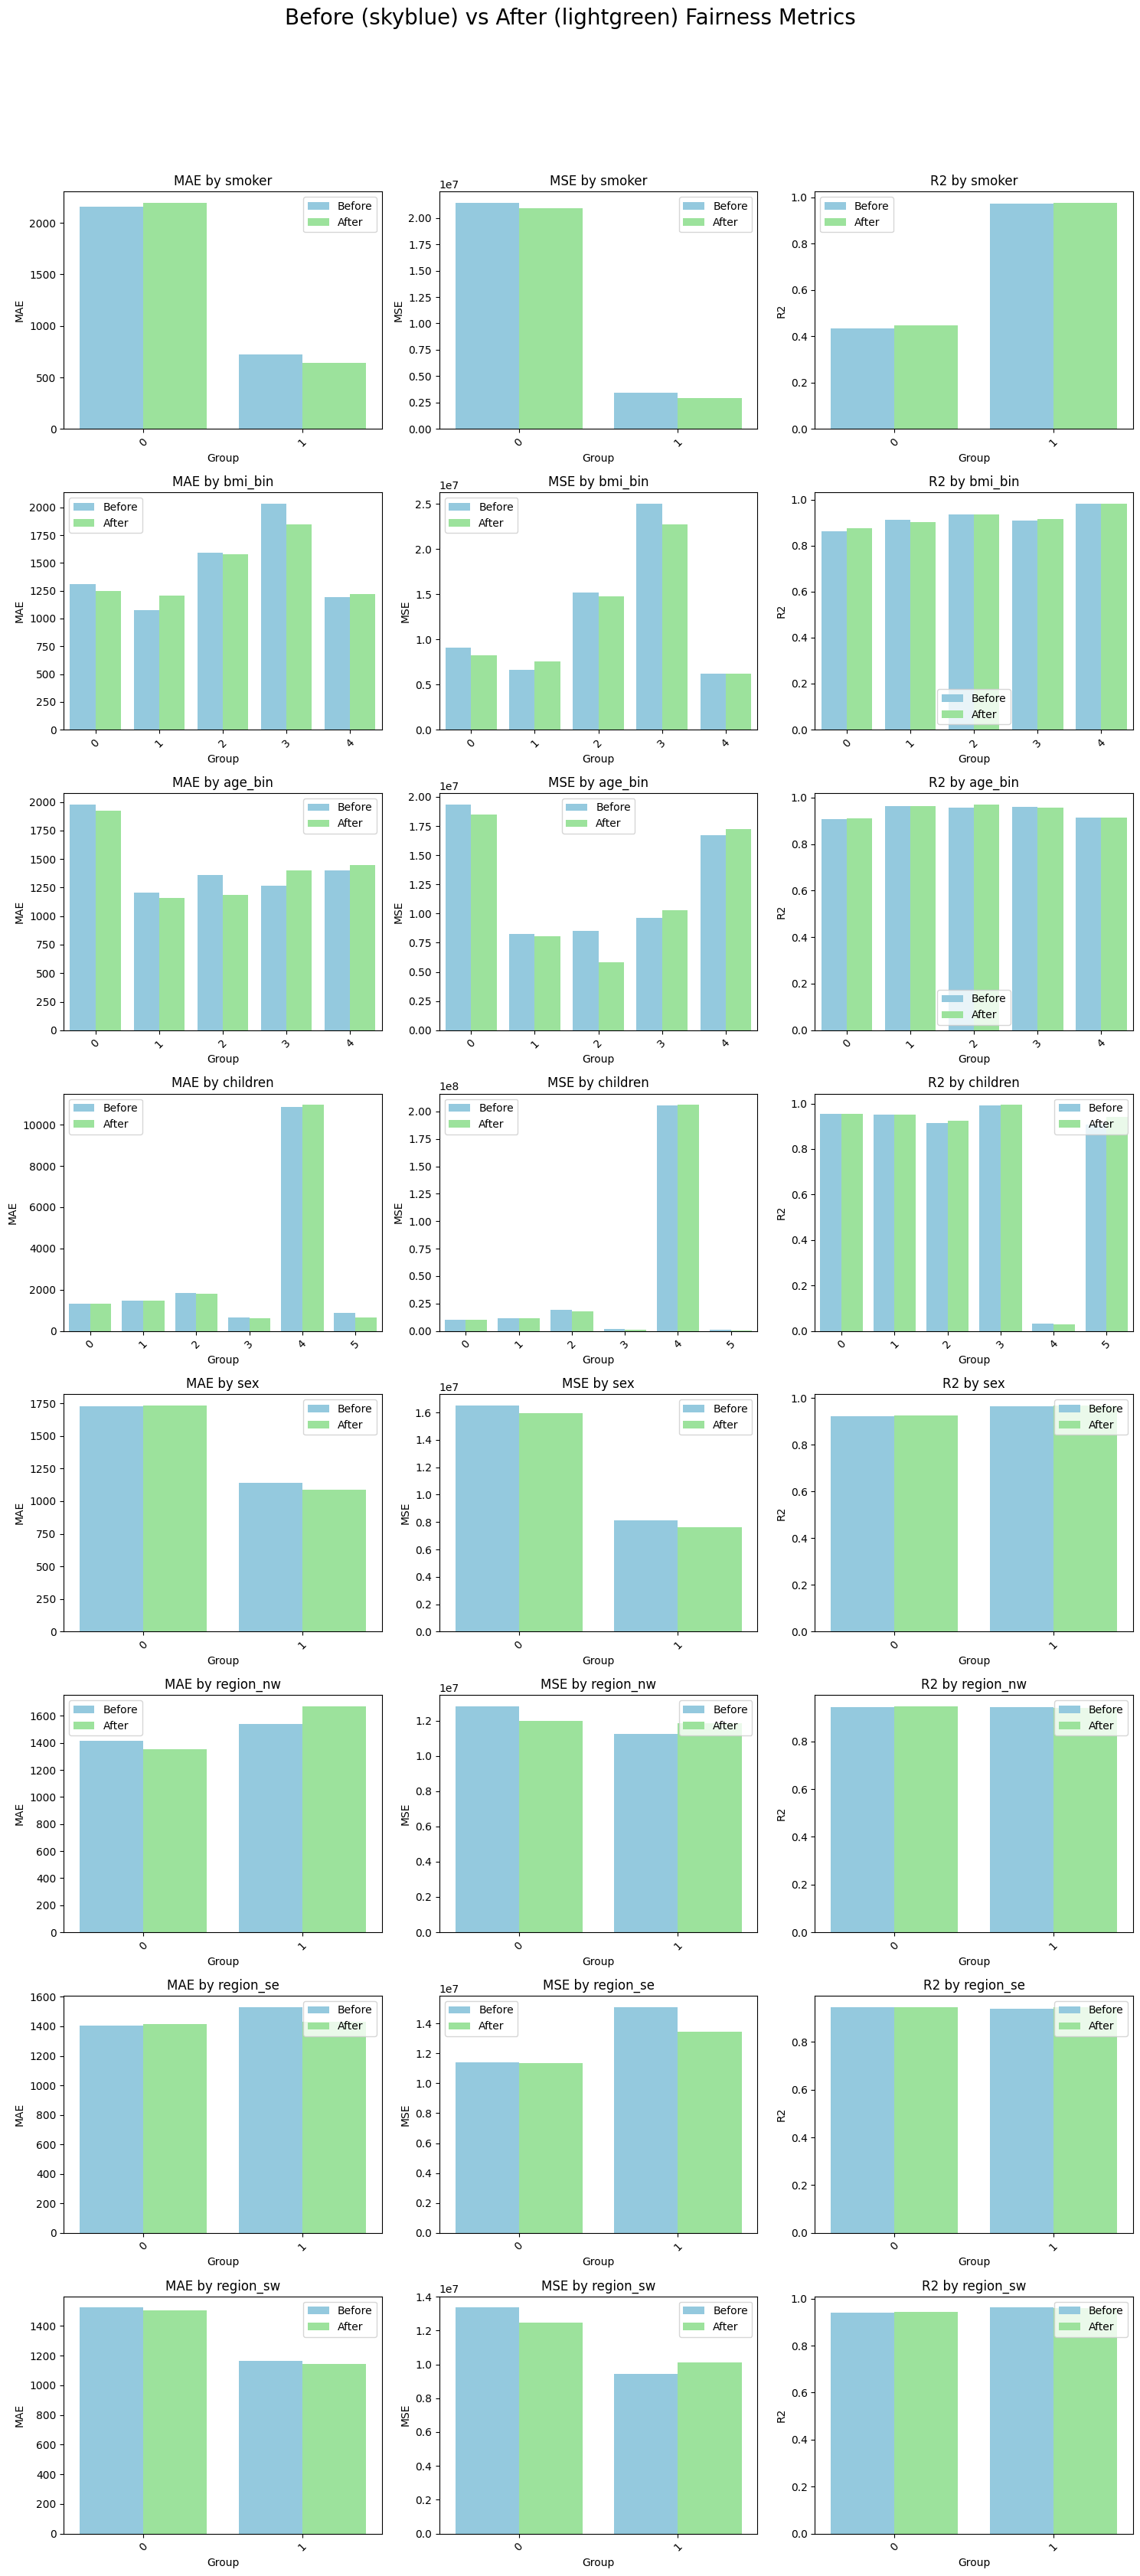

done.
  - Fairness grids plotted.

⚖️ Step 7: Comparing group-wise influence (detailed breakdown)...
- Comparing before/after metrics for each group (influence)... done.
  - Group-wise influence comparison done.

📝 Step 8: Summarizing fairness improvement report...


For Metric: MAE



Feature Metric  Mean_before  Stddev_before   Mean_after  Stddev_after  \
0  Overall MAE    MAE  1760.135004    1853.355052  1738.832592   1881.069440   
1      age_bin    MAE  1443.051243     276.749927  1421.323003    273.700760   
2      bmi_bin    MAE  1440.794441     342.995996  1419.894278    253.891824   
3     children    MAE  2835.925105    3605.897320  2804.885692   3671.449509   
4    region_nw    MAE  1477.060496      60.988945  1511.007393    159.905347   
5    region_se    MAE  1469.448266      62.202833  1424.458095      7.527094   
6    region_sw    MAE  1344.994850     178.721012  1323.228712    179.051722   
7          sex    MAE  1432.548705     292.762918  1409.912491    322.719159   
8       smoker    MAE  1440.313209     714.745687  1418.516723    774.985576   

       ΔMean    ΔStddev  
0 -21.302412  27.714389  
1 -21.728241  -3.049167  
2 -20.900163 -89.104172  
3 -31.039413  65.552188  
4  33.946897  98.916402  
5 -44.990171 -54.675740  
6 -21.766138   0.330710  
7 -22.636214  29.956241  
8 -21.796486  60.239889



For Metric: MSE



Feature Metric   Mean_before  Stddev_before    Mean_after  \
9   Overall MSE    MSE  1.909493e+07   3.768557e+07  1.864412e+07   
10      age_bin    MSE  1.248273e+07   4.631400e+06  1.196352e+07   
11      bmi_bin    MSE  1.244113e+07   7.072475e+06  1.192817e+07   
12     children    MSE  4.149200e+07   7.352919e+07  4.110140e+07   
13    region_nw    MSE  1.202859e+07   7.868562e+05  1.191068e+07   
14    region_se    MSE  1.326146e+07   1.848135e+06  1.240119e+07   
15    region_sw    MSE  1.139615e+07   1.962450e+06  1.130391e+07   
16          sex    MSE  1.232342e+07   4.186929e+06  1.180464e+07   
17       smoker    MSE  1.243882e+07   8.980320e+06  1.191968e+07   

    Stddev_after          ΔMean        ΔStddev  
9   3.786463e+07 -450808.235581  179065.557217  
10  5.034576e+06 -519203.760301  403175.775123  
11  6.185884e+06 -512954.878324 -886591.156660  
12  7.396134e+07 -390593.903941  432144.321803  
13  7.233009e+04 -117904.275678 -714526.121511  
14  1.051002e+06 -860270.519414 -797132.787074  
15  1.182712e+06  -92237.372609 -779738.761644  
16  4.179438e+06 -518778.912705   -7490.788913  
17  9.007659e+06 -519137.673765   27339.012990



For Metric: R2



Feature Metric  Mean_before  Stddev_before  Mean_after  Stddev_after  \
18  Overall R2     R2     0.885460       0.198278    0.889231      0.198366   
19     age_bin     R2     0.940423       0.024674    0.943082      0.026343   
20     bmi_bin     R2     0.920050       0.039538    0.922269      0.036374   
21    children     R2     0.791654       0.340756    0.798761      0.344824   
22   region_nw     R2     0.944613       0.000269    0.944958      0.003001   
23   region_se     R2     0.942987       0.003549    0.946457      0.000375   
24   region_sw     R2     0.950417       0.011451    0.951019      0.008069   
25         sex     R2     0.943822       0.021382    0.946152      0.021239   
26      smoker     R2     0.703000       0.268409    0.711750      0.264177   

       ΔMean   ΔStddev  
18  0.003770  0.000088  
19  0.002660  0.001668  
20  0.002219 -0.003164  
21  0.007107  0.004068  
22  0.000345  0.002733  
23  0.003469 -0.003174  
24  0.000602 -0.003381  
25  0.002329 -0.000143  
26  0.008750 -0.004232

  - Fairness improvement report summarized.

✅ Fairness audit complete.
--- Starting Fairness Audit Pipeline ---

🔧 Step 1: Stratified split...
- Splitting data (stratified by ['smoker', 'bmi_bin', 'age_bin'])...
  - Data split done.

📊 Step 2: Generating predictions and evaluating overall scores (Before DC)...
- Generating uncorrected predictions...
  - Uncorrected predictions and scores calculated.

📈 Step 3: Applying dual correction...
- Splitting train/test datasets for DC application...
  - Dataframes prepared for DC.
  - Combined train and test data for DC fitting.
[TrippleFactorCorrection] Initialized. lambda_strength=1.0, min_group_size=3
- Calculating global shift...
- Calculating group-wise offsets...
[TrippleFactorCorrection] Fitting regression-based correction...
[TrippleFactorCorrection] Overall train MAE: 769.1755
[TrippleFactorCorrection] Fitted global regression: coef=0.5771, intercept=-16.0890
  - Global shift and group-wise offsets calculated.
[TrippleFactorCorrection

Parameter    Before DC     After DC      Impact
0  rmse_train  1760.795422  1760.795422    0.000000
1   mae_train   769.175480   769.175480    0.000000
2    r2_train     0.986620     0.986620    0.000000
3   rmse_test  3439.242231  3323.474554 -115.767677
4    mae_test  1481.744882  1432.341201  -49.403681
5     r2_test     0.947575     0.951045    0.003470

  - Overall performance comparison done.

📋 Step 5: Computing group-wise fairness metrics...
📋 Computing group-wise fairness metrics...

### Audit for `smoker` ###

Fairness Audit for smoker:
- smoker=0: before = 8113.15, after = 8187.86
- smoker=1: before = 32867.42, after = 32891.57

### Audit for `bmi_bin` ###

Fairness Audit for bmi_bin:
- bmi_bin=0: before = 14299.51, after = 14314.45
- bmi_bin=1: before = 15236.30, after = 15267.04
- bmi_bin=2: before = 22056.54, after = 21931.35
- bmi_bin=3: before = 24807.24, after = 25034.83
- bmi_bin=4: before = 25623.92, after = 25725.53

### Audit for `age_bin` ###

Fairness Audit for age_bin:
- age_bin=0: before = 15989.72, after = 15952.78
- age_bin=1: before = 17828.95, after = 17704.14
- age_bin=2: before = 20073.47, after = 20038.28
- age_bin=3: before = 23301.20, after = 23656.41
- age_bin=4: before = 25056.32, after = 25143.29

### Audit for `children` ###

Fairness Audit for children:
- children=0: before = 20230.95, after = 20260.7

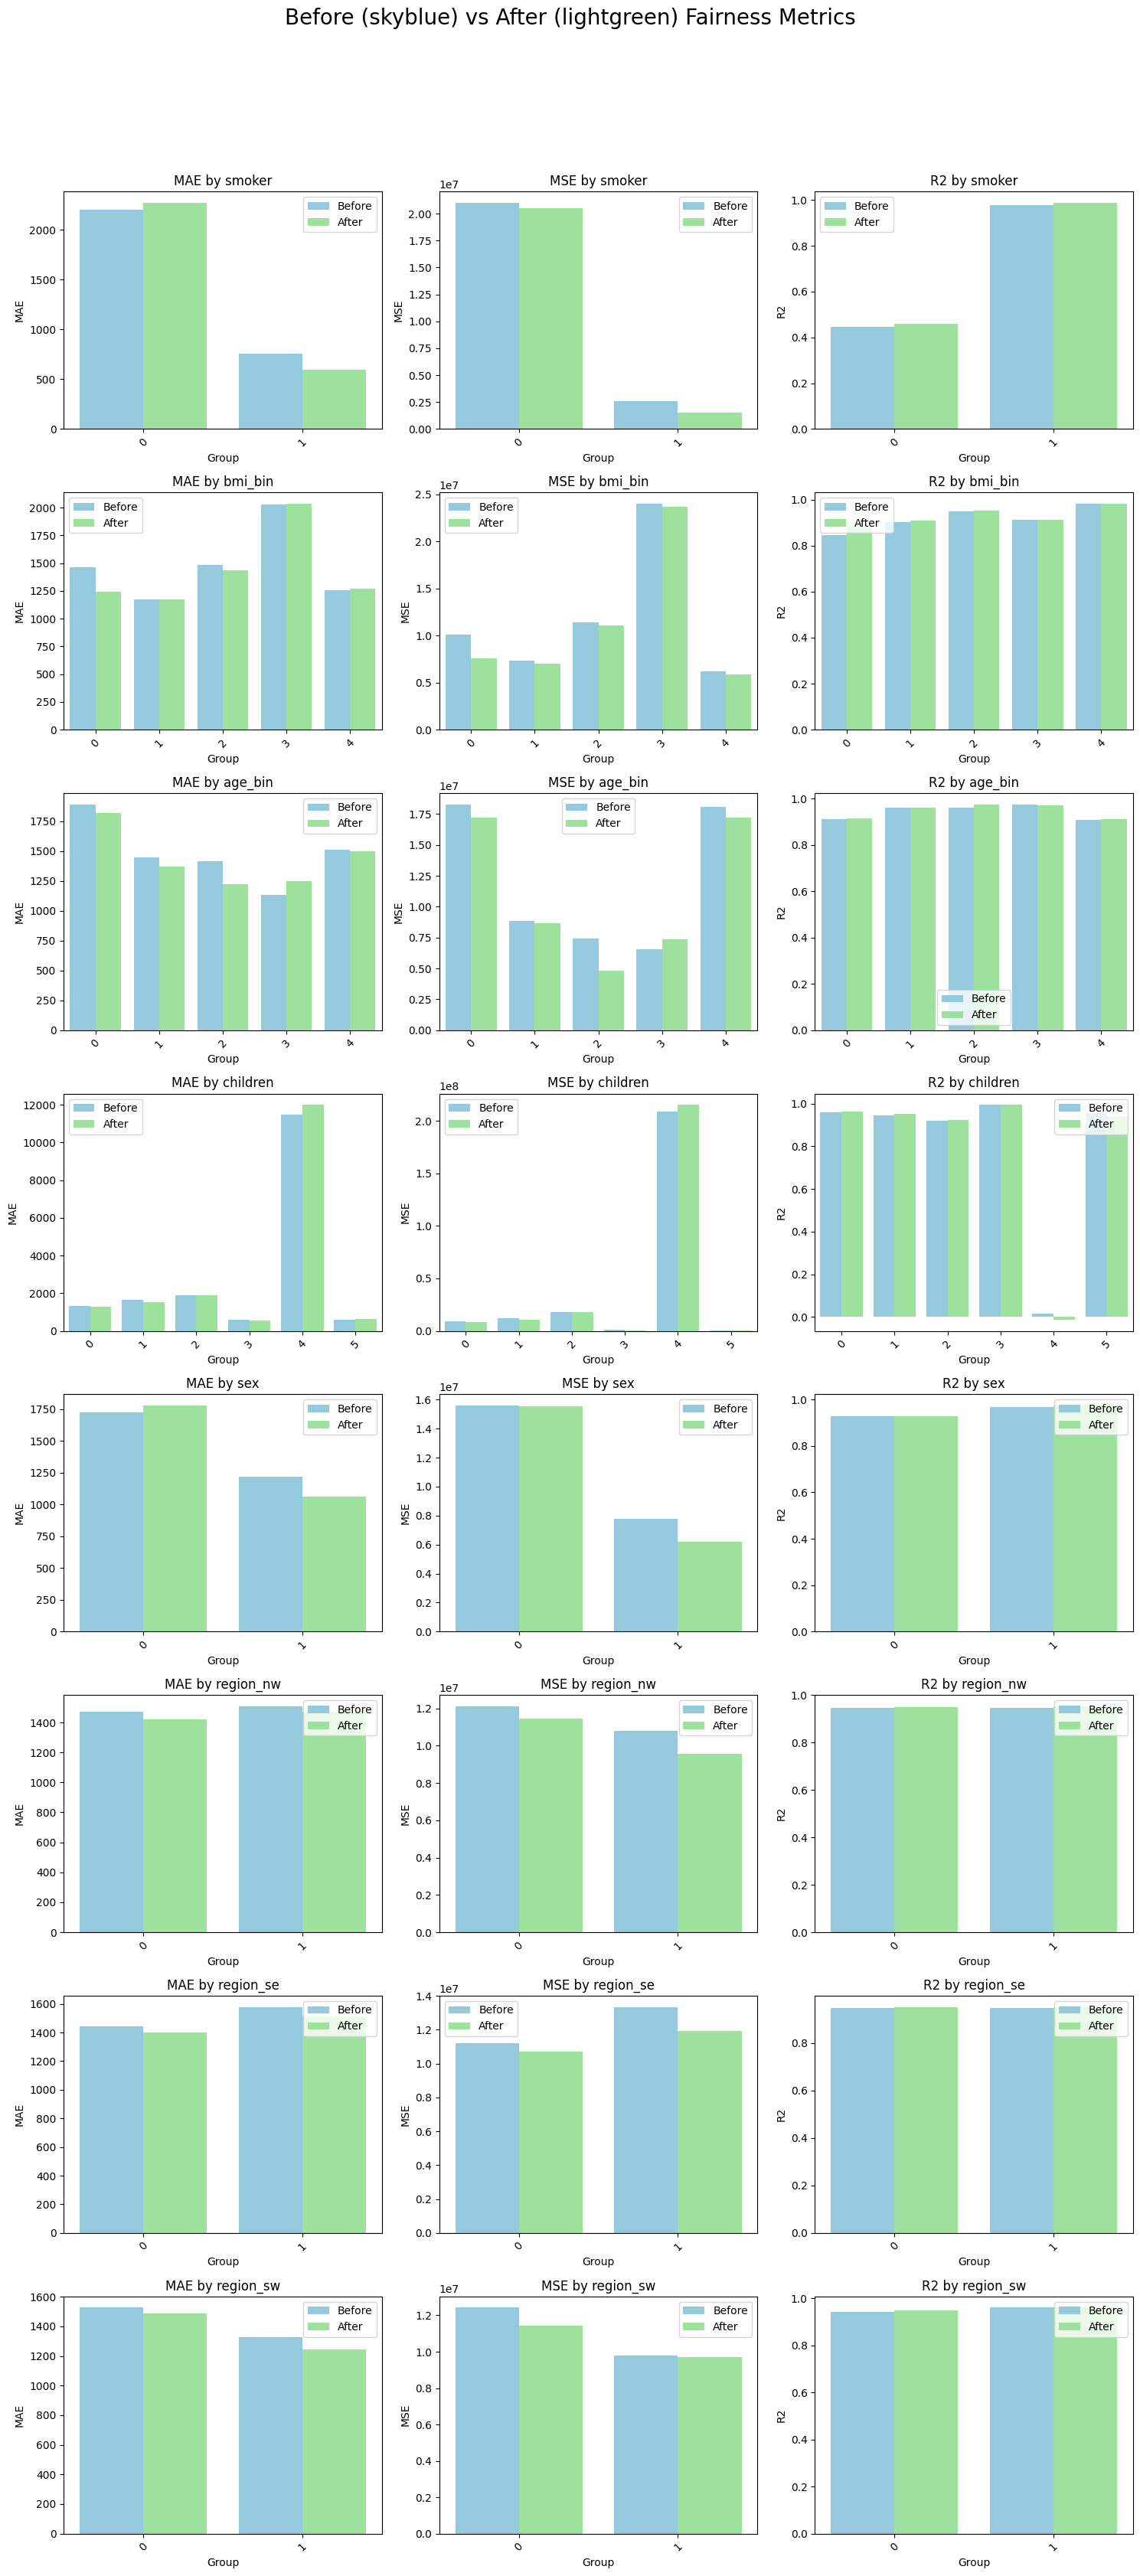

done.
  - Fairness grids plotted.

⚖️ Step 7: Comparing group-wise influence (detailed breakdown)...
- Comparing before/after metrics for each group (influence)... done.
  - Group-wise influence comparison done.

📝 Step 8: Summarizing fairness improvement report...


For Metric: MAE



Feature Metric  Mean_before  Stddev_before   Mean_after  Stddev_after  \
0  Overall MAE    MAE  1810.717126    1967.295850  1785.424462   2079.283748   
1      age_bin    MAE  1482.403491     242.786225  1432.783323    216.507129   
2      bmi_bin    MAE  1480.534148     298.591066  1431.234780    314.889928   
3     children    MAE  2917.076151    3854.047802  2977.474689   4059.583752   
4    region_nw    MAE  1491.322855      17.060765  1447.242544     26.543017   
5    region_se    MAE  1510.983572      68.303496  1456.306997     55.985671   
6    region_sw    MAE  1426.436044     101.044993  1365.341735    122.402871   
7          sex    MAE  1472.802999     254.843662  1419.760806    358.541261   
8       smoker    MAE  1479.204618     723.975135  1429.396605    839.209921   

       ΔMean     ΔStddev  
0 -25.292663  111.987899  
1 -49.620167  -26.279096  
2 -49.299368   16.298862  
3  60.398538  205.535950  
4 -44.080311    9.482252  
5 -54.676574  -12.317826  
6 -61.094308   21.357878  
7 -53.042193  103.697599  
8 -49.808013  115.234786



For Metric: MSE



Feature Metric   Mean_before  Stddev_before    Mean_after  \
9   Overall MSE    MSE  1.863513e+07   3.846977e+07  1.815331e+07   
10      age_bin    MSE  1.184858e+07   5.229792e+06  1.106274e+07   
11      bmi_bin    MSE  1.181617e+07   6.376779e+06  1.103298e+07   
12     children    MSE  4.158810e+07   7.507826e+07  4.215682e+07   
13    region_nw    MSE  1.145609e+07   6.631461e+05  1.050756e+07   
14    region_se    MSE  1.228282e+07   1.061591e+06  1.130430e+07   
15    region_sw    MSE  1.110400e+07   1.323391e+06  1.057815e+07   
16          sex    MSE  1.169147e+07   3.902207e+06  1.088113e+07   
17       smoker    MSE  1.179610e+07   9.202400e+06  1.101206e+07   

    Stddev_after          ΔMean       ΔStddev  
9   3.981618e+07 -481821.479677  1.346415e+06  
10  5.174269e+06 -785833.991285 -5.552304e+04  
11  6.545807e+06 -783187.124243  1.690281e+05  
12  7.761646e+07  568723.356097  2.538197e+06  
13  9.581829e+05 -948538.712658  2.950368e+05  
14  6.046151e+05 -978521.789818 -4.569760e+05  
15  8.537889e+05 -525858.604734 -4.696022e+05  
16  4.684066e+06 -810337.676236  7.818594e+05  
17  9.526079e+06 -784039.731819  3.236796e+05



For Metric: R2



Feature Metric  Mean_before  Stddev_before  Mean_after  Stddev_after  \
18  Overall R2     R2     0.888870       0.201455    0.892438      0.206069   
19     age_bin     R2     0.943077       0.027714    0.947121      0.027145   
20     bmi_bin     R2     0.919165       0.046326    0.928657      0.034966   
21    children     R2     0.798271       0.350833    0.794092      0.362263   
22   region_nw     R2     0.947225       0.000143    0.951693      0.001487   
23   region_se     R2     0.946975       0.000461    0.951073      0.001194   
24   region_sw     R2     0.951843       0.008622    0.954231      0.006462   
25         sex     R2     0.946718       0.019971    0.950189      0.023309   
26      smoker     R2     0.712127       0.266432    0.722782      0.264934   

       ΔMean   ΔStddev  
18  0.003568  0.004614  
19  0.004044 -0.000570  
20  0.009492 -0.011360  
21 -0.004179  0.011430  
22  0.004468  0.001344  
23  0.004098  0.000733  
24  0.002388 -0.002160  
25  0.003471  0.003338  
26  0.010655 -0.001498

  - Fairness improvement report summarized.

✅ Fairness audit complete.


In [6]:
# =====================================================
# 📊 Stage 2: Run Pipeline on Engineered Dataset
# -----------------------------------------------------
# After feature engineering + balanced strata,
# pipeline is rerun with fairness stratification.
# =====================================================

## Define Stage Parameters
stratify_by = ['smoker', 'bmi_bin', 'age_bin']
key_features = ['smoker', 'bmi_bin', 'age_bin', 'children','sex','region_nw', 'region_se', 'region_sw']
metrics = {"MAE": mean_absolute_error, "MSE": mean_squared_error, "R2": r2_score}

## Run Stage Pipeline
all_results = run_stage_pipeline(model=define_xgb(), df=dff, target=target, hue=hue, 
                                 key_features=key_features, stratify_by=stratify_by, metrics=metrics)

In [7]:
# Dropping non-contributing engineered features, to minimise multi-colinearity
col_list = ['bmi_bin','age_bin','is_high_risk','is_young_smoker']
dff = dff.drop(col_list, axis=1)
display(describe_column_stats(dff))

- Generating dataframe column summary... done.


Column     Type  Unique Counts      Min       Max  \
0           age  float64           2850    17.91     64.31   
1           sex    int64              2     0.00      1.00   
2           bmi  float64           2850    15.97     52.84   
3      children    int64              6     0.00      5.00   
4        smoker    int64              2     0.00      1.00   
5       charges  float64           2850  1119.78  64047.64   
6     region_nw    int32              2     0.00      1.00   
7     region_se    int32              2     0.00      1.00   
8     region_sw    int32              2     0.00      1.00   
9      age__bmi  float64           2850   288.31   2855.92   
10  age__smoker  float64           1426     0.00     64.31   
11  bmi__smoker  float64           1426     0.00     52.84   

                                 Unique Sample Values  
0   17.91, 17.91, 17.92, 17.92, 17.92 ... 64.26, 6...  
1                                                0, 1  
2   15.97, 16.82, 16.89, 17.15, 17.16 ... 52.37, 5...  
3                                    0, 1, 2, 3, 4...  
4                                                0, 1  
5   1119.78, 1133.61, 1135.09, 1135.11, 1135.53 .....  
6                                                0, 1  
7                                                0, 1  
8                                                0, 1  
9   288.31, 310.54, 310.64, 311.1, 311.34 ... 2609...  
10  0.0, 17.91, 17.91, 17.92, 17.92 ... 64.27, 64....  
11  0.0, 17.18, 17.2, 17.23, 17.25 ... 52.37, 52.4...

# 8. Synthetic Feature and Data Augmentation

In [8]:
# =====================================================
# 🧪 Synthetic Feature Augmentation
# -----------------------------------------------------
# Extend dataset with simulated insurance-relevant
# attributes (pre-existing conditions, family history,
# sum insured, wellness, lifestyle risk).
#
# Each synthetic variable has:
#   - range of values
#   - step size
#   - custom cost impact function
# =====================================================

# Identify the features, their range and impact on the medical insurance charges
synthetic_features = pd.DataFrame([
    {
        "feature": "systolic_bp_syn",
        "value_range": (0, 3),
        "step": 1,
        "cost_func": lambda x: [0, 1500, 4000][int(x)]
    },
    {
        "feature": "cholesterol_syn",
        "value_range": (0, 3),
        "step": 1,
        "cost_func": lambda x: [0, 1000, 3000][int(x)]
    },
    {
        "feature": "fasting_blood_sugar_syn",
        "value_range": (0, 3),
        "step": 1,
        "cost_func": lambda x: [0, 1500, 3500][int(x)]
    },
    {
        "feature": "steps_per_day_syn",  # now health_habits_syn
        "value_range": (0, 3),
        "step": 1,
        "cost_func": lambda x: [3000, 1500, 0][int(x)]  # 0: Poor, 1: Avg, 2: Healthy 
    },
    {
        "feature": "alcohol_consumption_syn",
        "value_range": (0, 3),
        "step": 1,
        "cost_func": lambda x: [0, 1000, 3000][int(x)]
    },
    {
        "feature": "sum_insured_syn",
        "value_range": (100000, 1000000),
        "step": 300000,
        "cost_func": lambda x: 0.04 * x
    },
    {
        "feature": "work_stress_syn",
        "value_range": (0, 2),
        "step": 1,
        "cost_func": lambda x: [0, 2000][int(x)]
    },
    {
        "feature": "health_habits_syn",
        "value_range": (0, 2),
        "step": 1,
        "cost_func": lambda x: [2000, 0][int(x)]
    },
    {
        "feature": "sleep_quality_syn",
        "value_range": (0, 2),
        "step": 1,
        "cost_func": lambda x: [1800, 0][int(x)]
    }
])




# Import DataAugmentor library
from DataAugmentor import *

# Create an instance of DataAugmentor
augmentor = DataAugmentor(synthetic_features)

# carry out data augmentation now
dfa = augmentor.augment(dff)
dfa.to_csv('augmented_dataset.csv', index=False)
display(dfa)
display(describe_column_stats(dfa))

- Starting dataset augmentation... 
- Augmenting feature 'systolic_bp_syn' with values from 0 to (0, 3) (step 1)... Dataset Shape: (8550, 13)

- Augmenting feature 'cholesterol_syn' with values from 0 to (0, 3) (step 1)... Dataset Shape: (25650, 14)

- Augmenting feature 'fasting_blood_sugar_syn' with values from 0 to (0, 3) (step 1)... Dataset Shape: (76950, 15)

- Augmenting feature 'steps_per_day_syn' with values from 0 to (0, 3) (step 1)... Dataset Shape: (230850, 16)

- Augmenting feature 'alcohol_consumption_syn' with values from 0 to (0, 3) (step 1)... Dataset Shape: (692550, 17)

- Augmenting feature 'sum_insured_syn' with values from 100000 to (100000, 1000000) (step 300000)... Dataset Shape: (2077650, 18)

- Augmenting feature 'work_stress_syn' with values from 0 to (0, 2) (step 1)... Dataset Shape: (4155300, 19)

- Augmenting feature 'health_habits_syn' with values from 0 to (0, 2) (step 1)... Dataset Shape: (8310600, 20)

- Augmenting feature 'sleep_quality_syn' with values

age  sex        bmi  children  smoker       charges  \
0         19.039955    0  23.488974         2       0  13709.311311   
1         21.916779    0  21.225996         3       0  15094.771494   
2         20.936318    0  17.405881         1       0  13382.169190   
3         18.987434    0  24.680078         0       0  12532.690359   
4         19.067020    0  24.714349         1       0  13516.504057   
...             ...  ...        ...       ...     ...           ...   
16621195  58.787753    0  36.767937         1       1  91490.457579   
16621196  58.227197    1  37.045471         2       1  90920.386906   
16621197  59.159221    1  40.974023         1       1  92415.437552   
16621198  58.955997    0  36.785274         1       1  91452.488453   
16621199  58.248467    1  36.828153         2       1  90817.546000   

          region_nw  region_se  region_sw     age__bmi  ...  bmi__smoker  \
0                 0          0          1   445.249697  ...     0.000000   
1                 1          0          0   470.157300  ...     0.000000   
2                 0          0          1   367.083388  ...     0.000000   
3                 0          0          1   469.378079  ...     0.000000   
4                 1          0          0   467.772223  ...     0.000000   
...             ...        ...        ...          ...  ...          ...   
16621195          0          0          0  2173.435156  ...    36.921478   
16621196          1          0          0  2132.835648  ...    36.991727   
16621197          0          1          0  2417.340831  ...    41.005623   
16621198          0          0          0  2159.967755  ...    36.595582   
16621199          1          0          0  2142.688093  ...    37.097727   

          systolic_bp_syn  cholesterol_syn  fasting_blood_sugar_syn  \
0                       0                0                        0   
1                       0                0                        0   
2                       0                0                        0   
3                       0                0                        0   
4                       0                0                        0   
...                   ...              ...                      ...   
16621195                2                2                        2   
16621196                2                2                        2   
16621197                2                2                        2   
16621198                2                2                        2   
16621199                2                2                        2   

          steps_per_day_syn  alcohol_consumption_syn  sum_insured_syn  \
0                         0                        0           100000   
1                         0                        0           100000   
2                         0                        0           100000   
3                         0                        0           100000   
4                         0                        0           100000   
...                     ...                      ...              ...   
16621195                  2                        2           700000   
16621196                  2                        2           700000   
16621197                  2                        2           700000   
16621198                  2                        2           700000   
16621199                  2                        2           700000   

          work_stress_syn  health_habits_syn  sleep_quality_syn  
0                       0                  0                  0  
1                       0                  0                  0  
2                       0                  0                  0  
3                       0                  0                  0  
4                       0                  0                  0  
...                   ...                ...                ...  
16621195                1                  1              

- Generating dataframe column summary... done.


Column     Type  Unique Counts        Min        Max  \
0                       age  float64           2850      17.91      64.31   
1                       sex    int64              2       0.00       1.00   
2                       bmi  float64           2850      15.97      52.84   
3                  children    int64              6       0.00       5.00   
4                    smoker    int64              2       0.00       1.00   
5                   charges  float64         498023    5119.78  114347.64   
6                 region_nw    int32              2       0.00       1.00   
7                 region_se    int32              2       0.00       1.00   
8                 region_sw    int32              2       0.00       1.00   
9                  age__bmi  float64           2850     288.31    2855.92   
10              age__smoker  float64           1426       0.00      64.31   
11              bmi__smoker  float64           1426       0.00      52.84   
12          systolic_bp_syn    int64              3       0.00       2.00   
13          cholesterol_syn    int64              3       0.00       2.00   
14  fasting_blood_sugar_syn    int64              3       0.00       2.00   
15        steps_per_day_syn    int64              3       0.00       2.00   
16  alcohol_consumption_syn    int64              3       0.00       2.00   
17          sum_insured_syn    int64              3  100000.00  700000.00   
18          work_stress_syn    int64              2       0.00       1.00   
19        health_habits_syn    int64              2       0.00       1.00   
20        sleep_quality_syn    int64              2       0.00       1.00   

                                 Unique Sample Values  
0   17.91, 17.91, 17.92, 17.92, 17.92 ... 64.26, 6...  
1                                                0, 1  
2   15.97, 16.82, 16.89, 17.15, 17.16 ... 52.37, 5...  
3                                    0, 1, 2, 3, 4...  
4                                                0, 1  
5   5119.78, 5133.61, 5135.09, 5135.11, 5135.53 .....  
6                                                0, 1  
7                                                0, 1  
8                                                0, 1  
9   288.31, 310.54, 310.64, 311.1, 311.34 ... 2609...  
10  0.0, 17.91, 17.91, 17.92, 17.92 ... 64.27, 64....  
11  0.0, 17.18, 17.2, 17.23, 17.25 ... 52.37, 52.4...  
12                                            0, 1, 2  
13                                            0, 1, 2  
14                                            0, 1, 2  
15                                            0, 1, 2  
16                                            0, 1, 2  
17                             100000, 400000, 700000  
18                                               0, 1  
19                                               0, 1  
20                                               0, 1

# 9. Running the complete code pipeline for Stage 3

## A. Exploratory Data Analysis


- Descriptive Statistics with Enhanced Features:
- Calculating enhanced descriptive statistics... done.


age        sex        bmi   children     smoker  \
count           50000.000  50000.000  50000.000  50000.000  50000.000   
mean               39.923      0.521     30.737      1.081      0.504   
std                14.229      0.500      6.020      1.179      0.500   
min                17.910      0.000     15.973      0.000      0.000   
25%                27.128      0.000     26.413      0.000      0.000   
50%                40.031      1.000     30.491      1.000      1.000   
75%                51.821      1.000     34.771      2.000      1.000   
max                64.308      1.000     52.838      5.000      1.000   
cv                  0.356      0.959      0.196      1.090      0.992   
IQR                24.694      1.000      8.359      2.000      1.000   
skew               -0.023     -2.876      0.123      0.207     -2.976   
upper_lim          57.716      1.000     36.911      2.500      1.000   
lower_lim          20.676     -0.500     24.373     -0.500     -0.500   
outlier_spread      1.253      0.667      2.940      1.667      0.667   

                   charges  region_nw  region_se  region_sw   age__bmi  ...  \
count            50000.000  50000.000  50000.000  50000.000  50000.000  ...   
mean             47288.536      0.235      0.293      0.230   1226.511  ...   
std              18415.912      0.424      0.455      0.421    500.590  ...   
min               5635.837      0.000      0.000      0.000    288.309  ...   
25%              33224.208      0.000      0.000      0.000    807.390  ...   
50%              45877.001      0.000      0.000      0.000   1175.950  ...   
75%              59994.681      0.000      1.000      0.000   1595.589  ...   
max             109971.516      1.000      1.000      1.000   2855.921  ...   
cv                   0.389      1.803      1.555      1.827      0.408  ...   
IQR              26770.472      0.000      1.000      0.000    788.199  ...   
skew                 0.230      1.664      1.929      1.642      0.303  ...   
upper_lim        67053.521      0.000      1.500      0.000   1805.409  ...   
lower_lim        26897.812      0.000      0.000      0.000    623.110  ...   
outlier_spread       2.598        inf      0.667        inf      2.172  ...   

                bmi__smoker  systolic_bp_syn  cholesterol_syn  \
count             50000.000        50000.000        50000.000   
mean                 15.504            0.992            1.000   
std                  15.957            0.817            0.818   
min                   0.000            0.000            0.000   
25%                   0.000            0.000            0.000   
50%                  17.976            1.000            1.000   
75%                  30.628            2.000            2.000   
max                  52.840            2.000            2.000   
cv                    1.029            0.823            0.818   
IQR                  30.628            2.000            2.000   
skew                 -0.465           -0.029            0.002   
upper_lim            36.955            2.500            2.500   
lower_lim            -8.988           -0.500           -0.500   
outlier_spread        1.150            0.667            0.667   

                fasting_blood_sugar_syn  steps_per_day_syn  \
count                         50000.000          50000.000   
mean                              0.999              1.008   
std                               0.818              0.818   
min                               0.000              0.000   
25%                               0.000              0.000   
50%                               1.000              1.000   
75%                               2.000              2.000   
max                               2.000              2.000   
cv                                0.819              0.812   
IQR                               2.000              2.000   
skew                             -0.005              0.028   
upper_lim           


- Univariate Distribution & Boxplots:
- Generating univariate plots with hue='smoker'... 

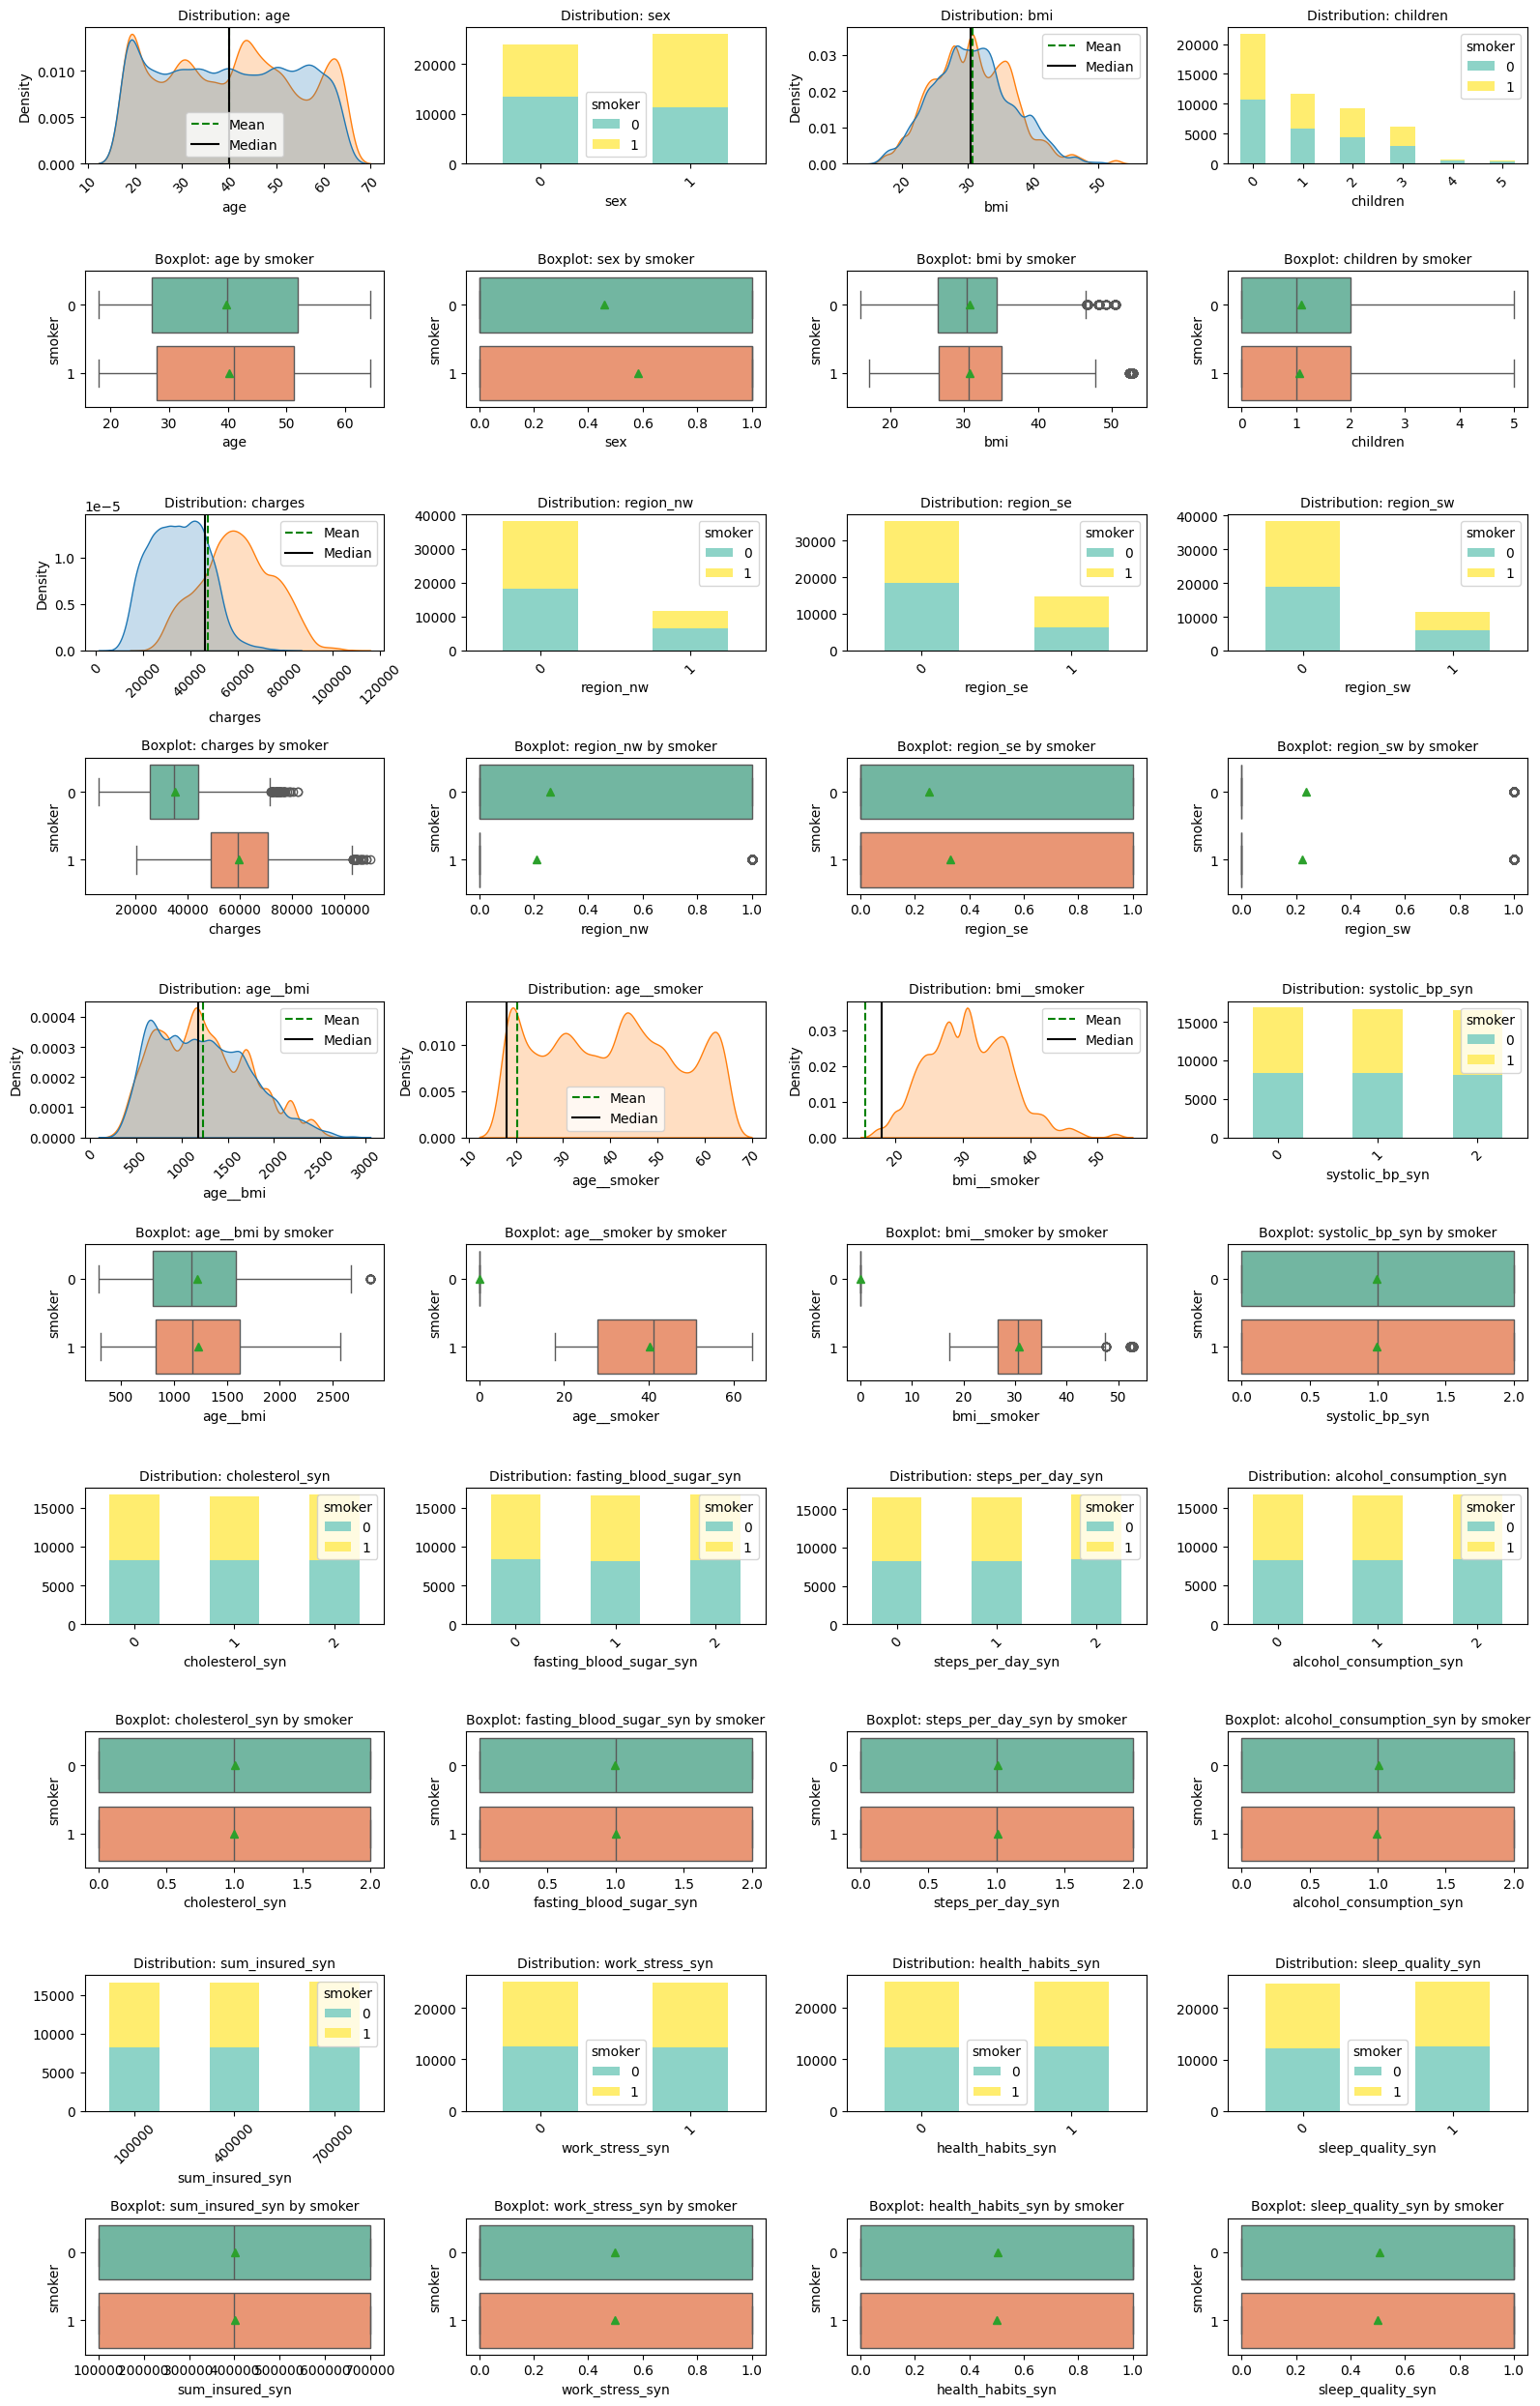

done.

- Correlation Heatmap:
- Calculating correlation matrix using 'spearman'... 

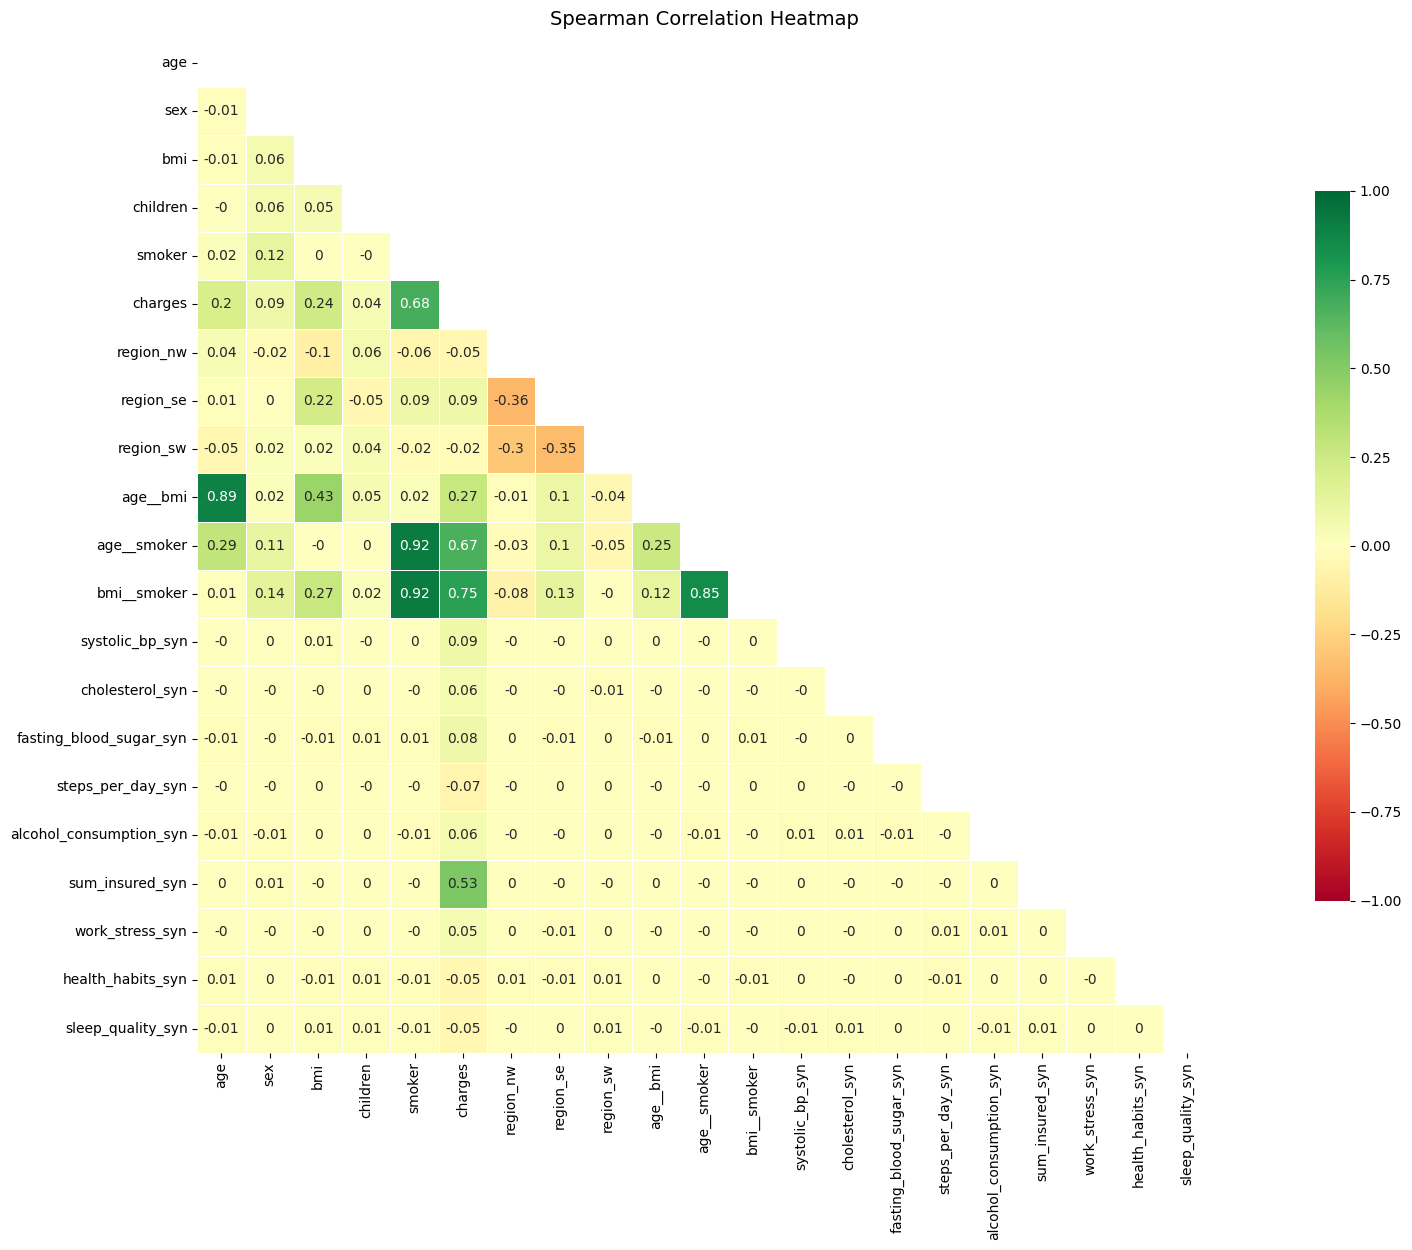

done.

- Bi-variate plot of attributes with 'charges':
- Creating bivariate plots for 'charges' with hue 'smoker'... 

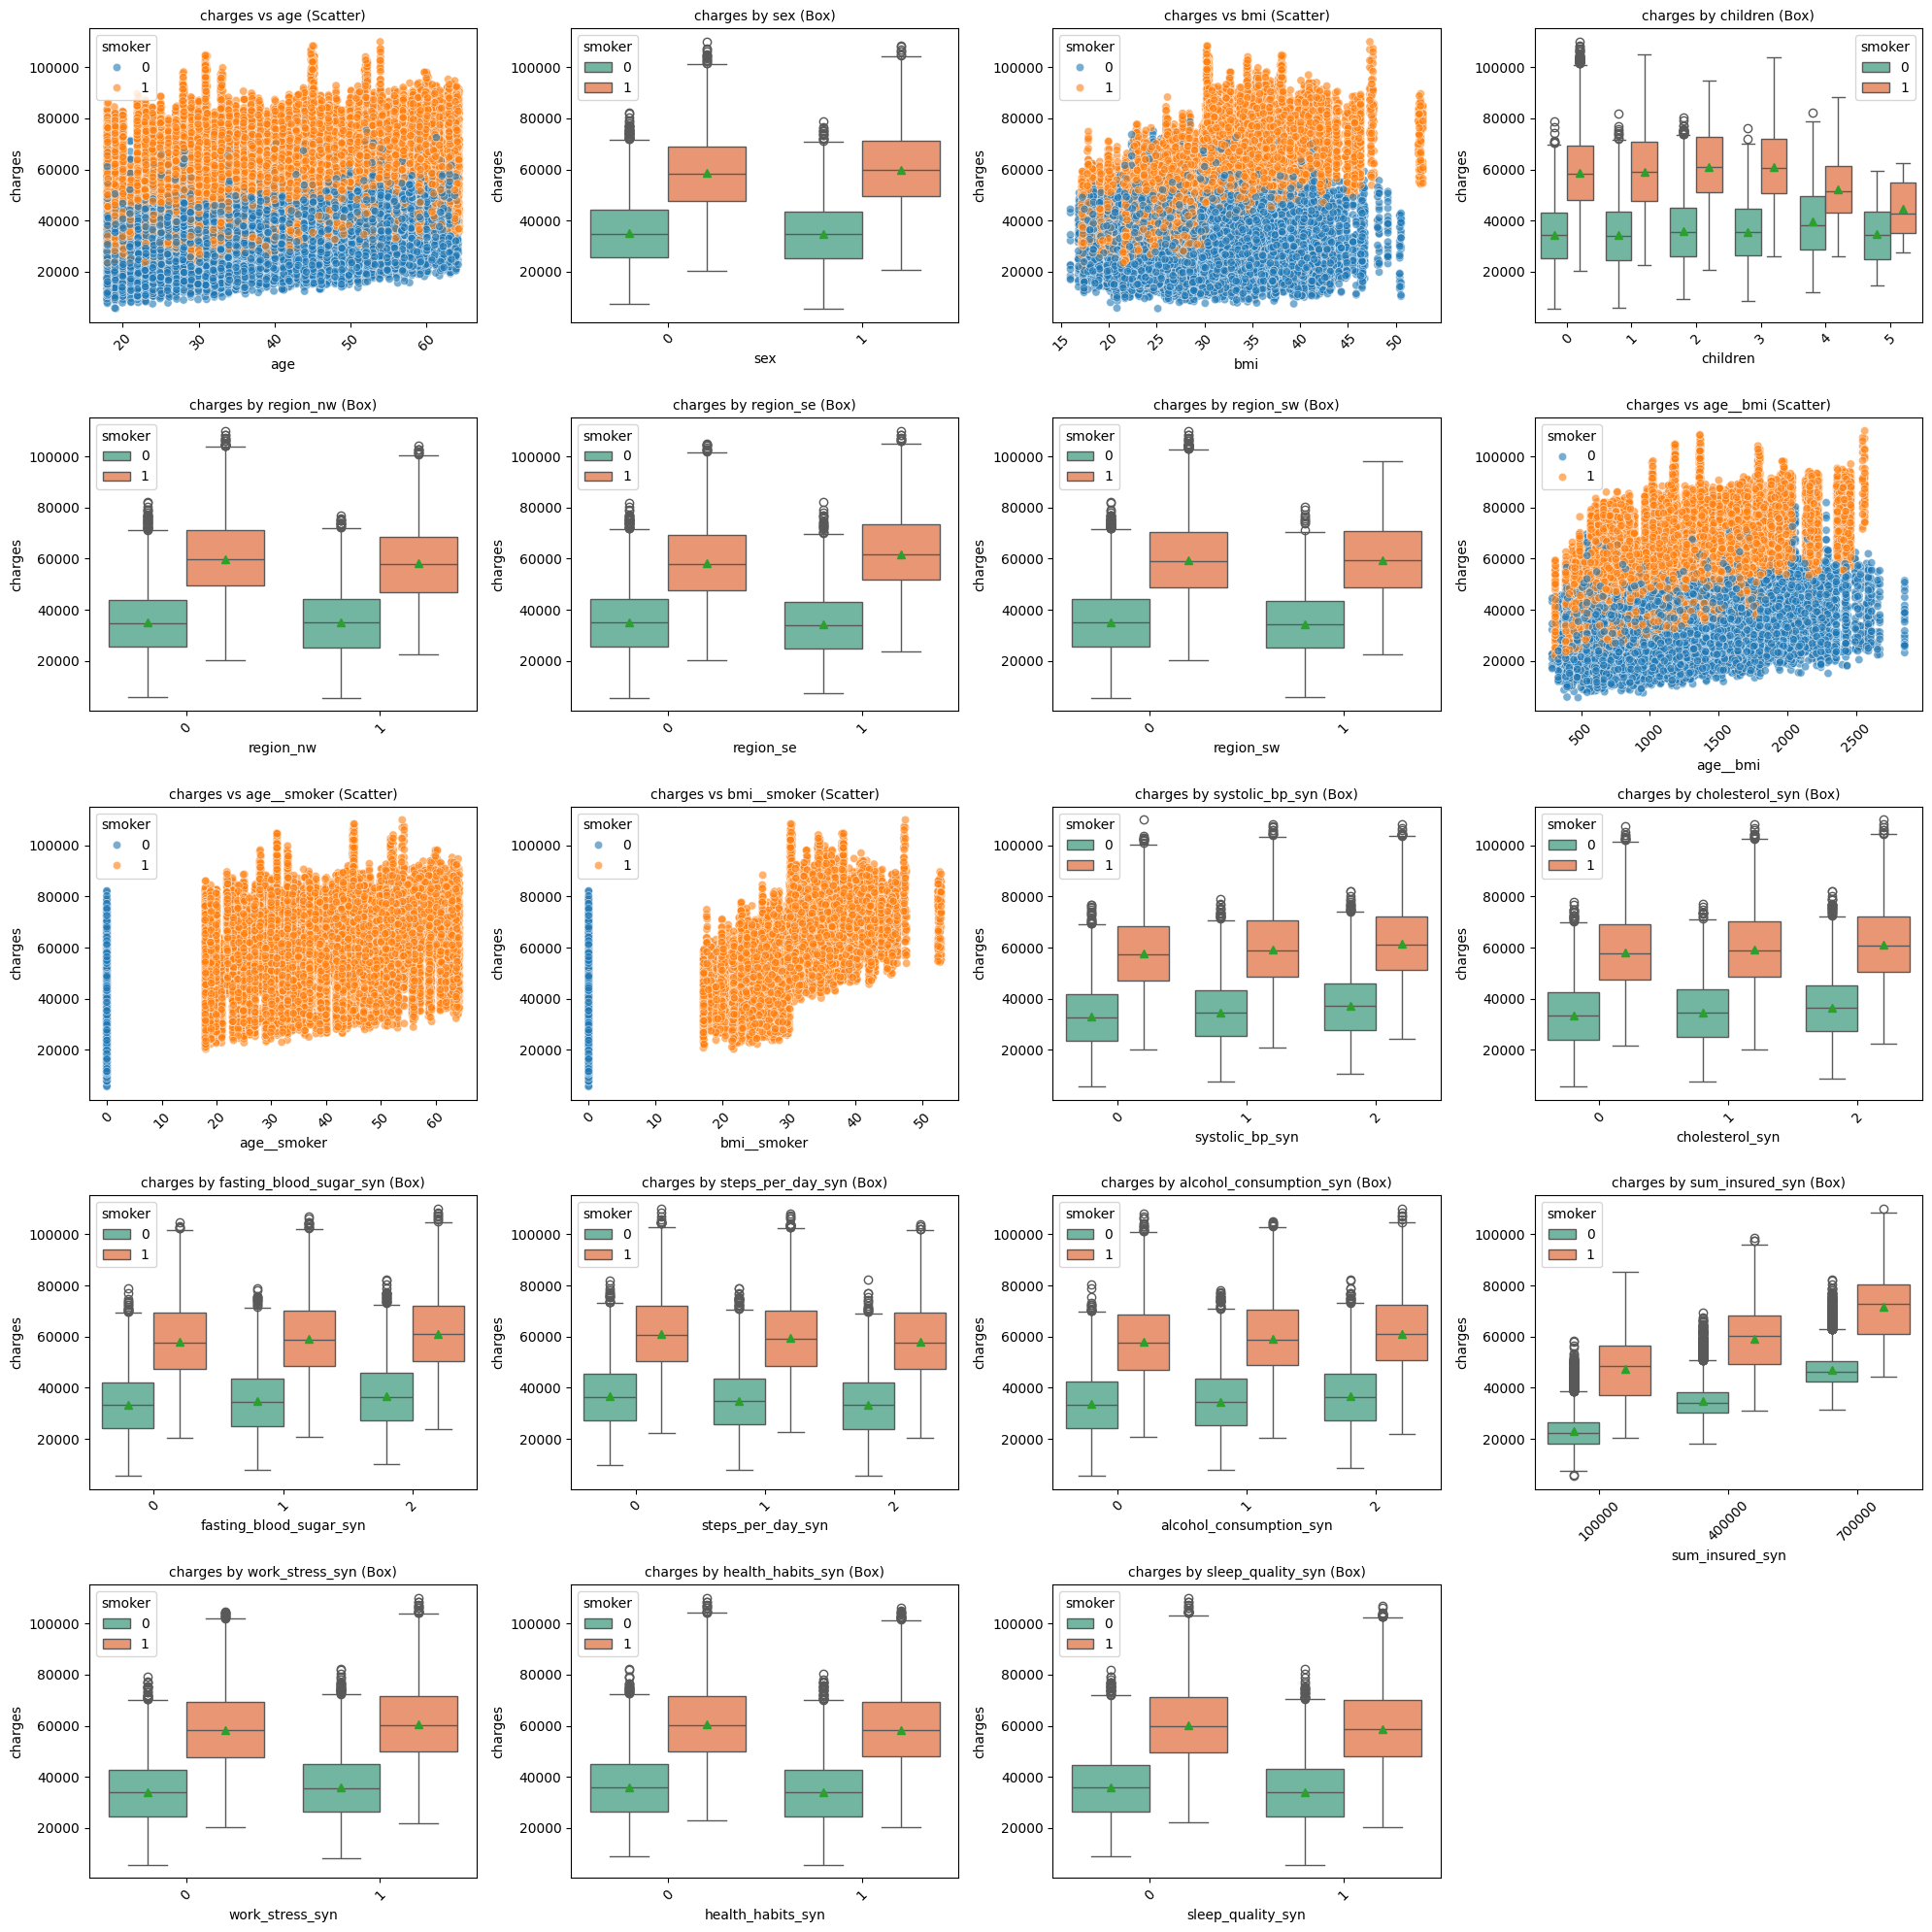

done.
done.


## B. Data Fairness Audit

## Dataset Fairness Profile Summary (Median Based)

### Subgroup Imbalance
| Feature                 | Value Counts                                  |   Imbalance Ratio |
|:------------------------|:----------------------------------------------|------------------:|
| smoker                  | {1: 25201, 0: 24799}                          |             0.984 |
| systolic_bp_syn         | {0: 16874, 1: 16640, 2: 16486}                |             0.977 |
| cholesterol_syn         | {2: 16742, 0: 16719, 1: 16539}                |             0.988 |
| fasting_blood_sugar_syn | {0: 16742, 2: 16678, 1: 16580}                |             0.99  |
| steps_per_day_syn       | {2: 16940, 0: 16553, 1: 16507}                |             0.974 |
| alcohol_consumption_syn | {0: 16716, 2: 16656, 1: 16628}                |             0.995 |
| sum_insured_syn         | {700000: 16756, 400000: 16631, 100000: 16613} |             0.991 |

### Target Influences (vs Overall Median)
| Feature                 |   Group |   Group Median |   Overall Median |   Δ vs Overall Median |
|:------------------------|--------:|---------------:|-----------------:|----------------------:|
| smoker                  |       0 |        34836   |            45877 |             -11041    |
| smoker                  |       1 |        59192.4 |            45877 |              13315.4  |
| systolic_bp_syn         |       0 |        44045.7 |            45877 |              -1831.33 |
| systolic_bp_syn         |       1 |        45409.4 |            45877 |               -467.57 |
| systolic_bp_syn         |       2 |        48336.6 |            45877 |               2459.57 |
| cholesterol_syn         |       0 |        44673.6 |            45877 |              -1203.43 |
| cholesterol_syn         |       1 |        45617.1 |            45877 |               -259.86 |
| cholesterol_syn         |       2 |        47513.1 |            45877 |               1636.13 |
| fasting_blood_sugar_syn |       0 |        44126.2 |            45877 |              -1750.83 |
| fasting_blood_sugar_syn |       1 |        45576   |            45877 |               -301.02 |
| fasting_blood_sugar_syn |       2 |        47864   |            45877 |               1987.04 |
| steps_per_day_syn       |       0 |        47652.8 |            45877 |               1775.75 |
| steps_per_day_syn       |       1 |        45755.1 |            45877 |               -121.92 |
| steps_per_day_syn       |       2 |        44316.5 |            45877 |              -1560.54 |
| alcohol_consumption_syn |       0 |        44488.9 |            45877 |              -1388.07 |
| alcohol_consumption_syn |       1 |        45569.1 |            45877 |               -307.91 |
| alcohol_consumption_syn |       2 |        47652.7 |            45877 |               1775.74 |
| sum_insured_syn         |  100000 |        31681.9 |            45877 |             -14195.1  |
| sum_insured_syn         |  400000 |        43392.4 |            45877 |              -2484.57 |
| sum_insured_syn         |  700000 |        55522.3 |            45877 |               9645.33 |

### Feature Skewness
| Feature                 |   Skewness | Highly Skewed   |
|:------------------------|-----------:|:----------------|
| smoker                  |      -0.02 | No              |
| systolic_bp_syn         |       0.01 | No              |
| cholesterol_syn         |      -0    | No              |
| fasting_blood_sugar_syn |       0    | No              |
| steps_per_day_syn       |      -0.01 | No              |
| alcohol_consumption_syn |       0    | No              |
| sum_insured_syn         |      -0.01 | No              |


## C. Model Training

🔧 Step 0: Initial Data Splitting (Stratified if possible)...
✅ Stratifying by combined columns: ['smoker', 'sum_insured_syn']


## **Step 1: Baseline Model Performance (Standard XGBoost)** 📊


📈 Training Baseline Model...
📊 Evaluating Baseline Model (Overall Test Set)...
RMSE: 2725.11 MAE: 1532.33 R2: 0.98
RMSE: 3256.22 MAE: 1824.46 R2: 0.97
Overall Test RMSE: 3256.22
Overall Test MAE: 1824.46
Overall Test R2: 0.97

--- Visualizing Baseline Model Performance ---

📐 Baseline Training Best-Fit Line: y = 0.9545x + 2144.38

📐 Baseline Test Best-Fit Line: y = 0.9456x + 2499.93


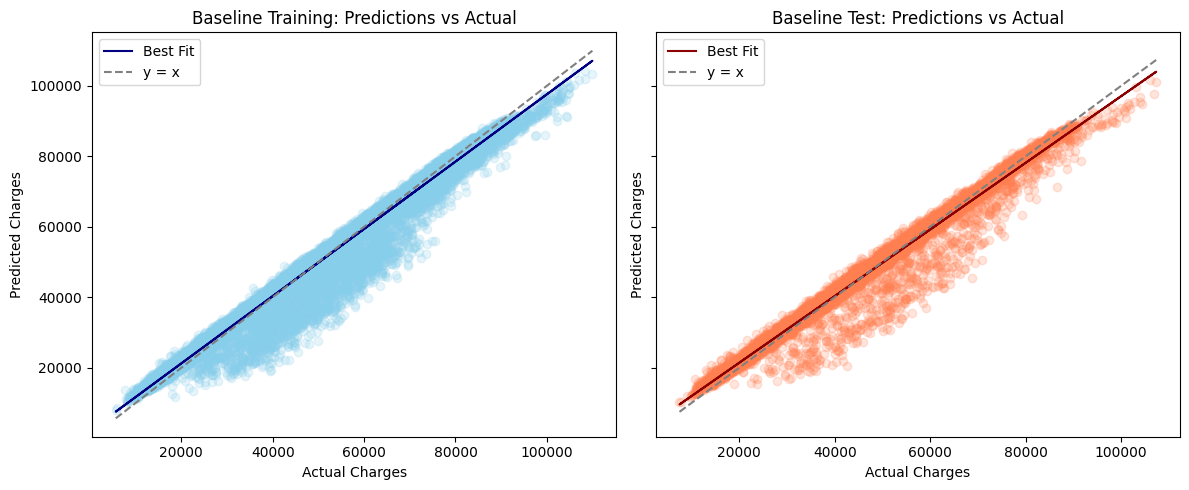

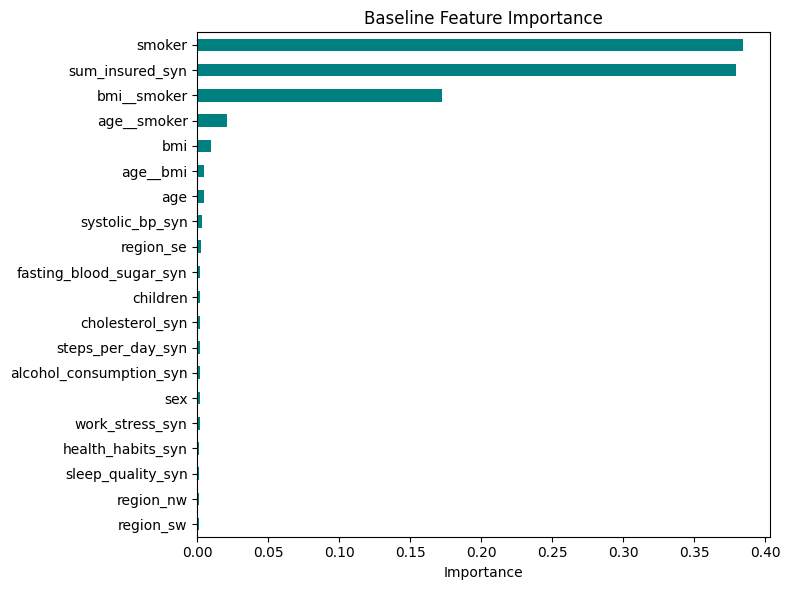


--- Collecting Group-wise Metrics for Baseline Model ---
✅ Baseline Model Evaluation Complete.


## **Step 2: Fairlearn-Constrained Model** ⚖️

✅ Dynamic `upper_bound` set to 1/3 of baseline training MAE: 510.78

📈 Training fairness-constrained model (constraints on ['smoker', 'sum_insured_syn'])...
This process may take longer due to fairness optimization.
⚠️ Unable to compute constraint violations on training set for Fair Model: ConditionalLossMoment.gamma() got an unexpected keyword argument 'sensitive_features'. This might happen with certain model types or if gamma calculation is complex. Safe to ignore if primarily using overall performance and group-wise metrics.

📊 Evaluating Fairlearn-Constrained Model (Overall Test Set)...
RMSE: 2729.65 MAE: 1531.79 R2: 0.98
RMSE: 3255.61 MAE: 1824.33 R2: 0.97
Overall Test RMSE: 3255.61
Overall Test MAE: 1824.33
Overall Test R2: 0.97

--- Visualizing Fairlearn-Constrained Model Performance ---

📐 Fairlearn Training Best-Fit Line: y = 0.9546x + 2140.50

📐 Fairlearn Test Best-Fit Line: y = 0.9453x + 2513.27


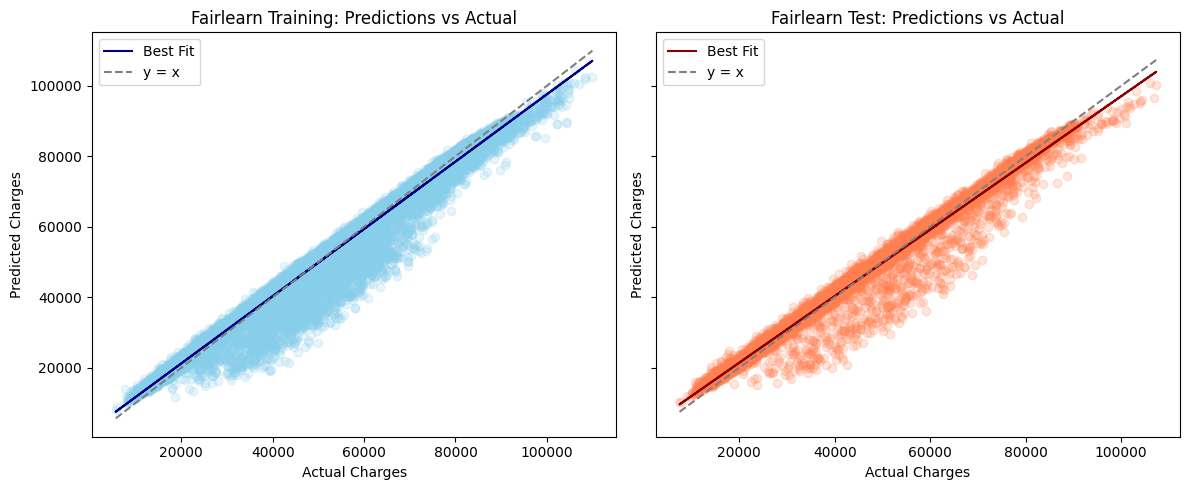


⚠️ Feature importance not available or empty for the Fairlearn model.

--- Collecting Group-wise Metrics for Fairlearn-Constrained Model ---
✅ Fairlearn Model Evaluation Complete.


## **Step 3: Hybrid Subgroup Model** 🎯


📈 Training Hybrid Subgroup Model...
🚀 Starting Hybrid Subgroup Model Training:
Non-smoker data points: 19840
Smoker data points: 20160
--------------------------------------------------

--- Training Standard Model for NON-SMOKERS ---
✅ Stratifying by combined columns: ['smoker', 'sum_insured_syn']
RMSE: 2614.63 MAE: 1452.70 R2: 0.95

--- Training FAIRNESS-AWARE Model for SMOKERS ---
✅ Stratifying by combined columns: ['smoker', 'sum_insured_syn']
RMSE: 1487.05 MAE: 981.05 R2: 0.99
✅ Dynamic `upper_bound` set to 1/3 of baseline training MAE: 327.02

📈 Training fairness-constrained model (constraints on ['smoker', 'sum_insured_syn'])...
This process may take longer due to fairness optimization.
⚠️ Unable to compute constraint violations on training set for Fair Model: ConditionalLossMoment.gamma() got an unexpected keyword argument 'sensitive_features'. This might happen with certain model types or if gamma calculation is complex. Safe to ignore if primarily using overall performance a

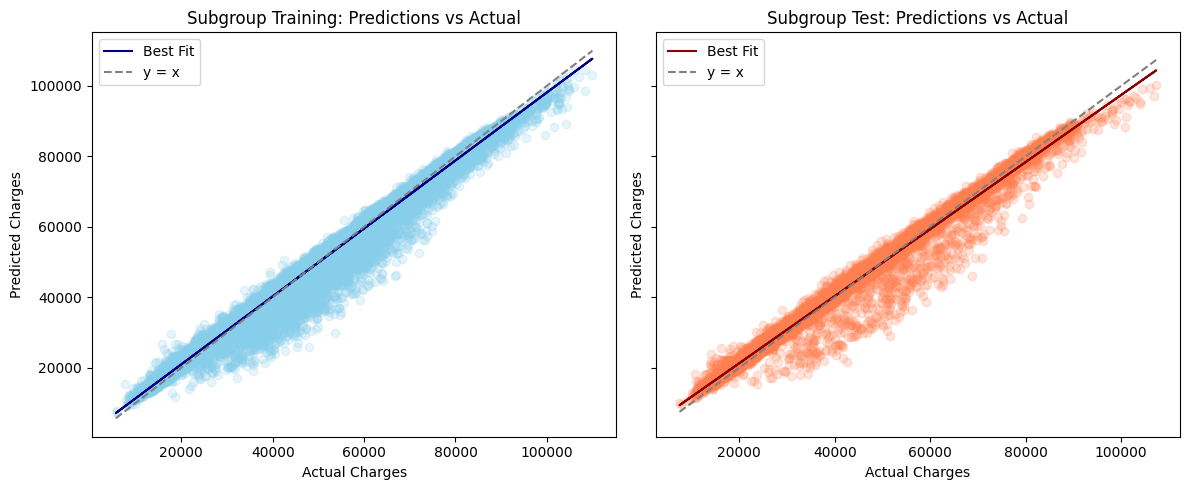


Note: Feature importance for the composite Hybrid Subgroup Model is not directly plotted here.
To inspect individual subgroup model importances, access `subgrp_model.non_smoker_model` and `subgrp_model.smoker_model`.

--- Collecting Group-wise Metrics for Hybrid Subgroup Model ---
✅ Hybrid Subgroup Model Evaluation Complete.


## **Step 4: Comparative Feature-wise Analysis** 📈⚖️🎯

Comparing MAE, MSE, and R² across Baseline, Fairlearn, and Hybrid Subgroup Models:


### Comparative Mean Absolute Error by Feature

Feature   Group  Baseline MAE  Fairlearn MAE  Subgroup MAE
0                 sex       0     1888.3519      1895.6138     1769.2052
1                 sex       1     1765.3713      1758.3961     1669.9606
2                 sex    Mean     1826.8616      1827.0049     1719.5829
3                 sex  StdDev       61.4903        68.6088       49.6223
4            children       0     1754.7888      1752.2396     1624.4451
..                ...     ...           ...            ...           ...
65  health_habits_syn  StdDev       29.9012        24.3474       31.9568
66  sleep_quality_syn       0     1778.4946      1774.4504     1665.1496
67  sleep_quality_syn       1     1870.3589      1874.1283     1770.0618
68  sleep_quality_syn    Mean     1824.4267      1824.2893     1717.6057
69  sleep_quality_syn  StdDev       45.9321        49.8390       52.4561

[70 rows x 5 columns]

### Comparative Mean Squared Error by Feature

Feature   Group  Baseline MSE  Fairlearn MSE  Subgroup MSE
0                 sex       0  1.212496e+07   1.211626e+07  1.009267e+07
1                 sex       1  9.195188e+06   9.195647e+06  8.199779e+06
2                 sex    Mean  1.066007e+07   1.065595e+07  9.146225e+06
3                 sex  StdDev  1.464884e+06   1.460307e+06  9.464460e+05
4            children       0  9.116728e+06   9.126114e+06  7.863926e+06
..                ...     ...           ...            ...           ...
65  health_habits_syn  StdDev  2.044016e+05   2.623079e+05  1.660983e+05
66  sleep_quality_syn       0  1.024048e+07   1.023493e+07  8.773750e+06
67  sleep_quality_syn       1  1.096483e+07   1.096249e+07  9.444341e+06
68  sleep_quality_syn    Mean  1.060265e+07   1.059871e+07  9.109046e+06
69  sleep_quality_syn  StdDev  3.621734e+05   3.637825e+05  3.352954e+05

[70 rows x 5 columns]

### Comparative R-squared by Feature

Feature   Group  Baseline R2  Fairlearn R2  Subgroup R2
0                 sex       0       0.9627        0.9628       0.9690
1                 sex       1       0.9739        0.9739       0.9767
2                 sex    Mean       0.9683        0.9683       0.9729
3                 sex  StdDev       0.0056        0.0056       0.0039
4            children       0       0.9726        0.9726       0.9764
..                ...     ...          ...           ...          ...
65  health_habits_syn  StdDev       0.0001        0.0001       0.0001
66  sleep_quality_syn       0       0.9694        0.9694       0.9738
67  sleep_quality_syn       1       0.9684        0.9685       0.9728
68  sleep_quality_syn    Mean       0.9689        0.9689       0.9733
69  sleep_quality_syn  StdDev       0.0005        0.0005       0.0005

[70 rows x 5 columns]




**End of Comparative Analysis.**


## D. SHAP Model explainability analysis

Standard model detected. Using default shap.Explainer().
Calculating SHAP values... (This may take a moment for non-tree models)


100%|===================| 49940/50000 [12:53<00:00]        

Tree explainer detected. Computing SHAP interaction values...


Feature  Mean |SHAP|        Type
0           sum_insured_syn  7982.325826   Synthetic
1               bmi__smoker  7353.539330  Engineered
2                    smoker  3039.190578    Original
3               age__smoker  1921.739403  Engineered
4                       age  1577.198613    Original
5                  age__bmi  1300.001724  Engineered
6           systolic_bp_syn  1218.288953   Synthetic
7                       bmi  1193.357170    Original
8   fasting_blood_sugar_syn  1067.010956   Synthetic
9           cholesterol_syn   927.628161   Synthetic
10  alcohol_consumption_syn   925.562587   Synthetic
11        steps_per_day_syn   876.757424   Synthetic
12        health_habits_syn   823.793762   Synthetic
13          work_stress_syn   819.502703   Synthetic
14        sleep_quality_syn   759.876652   Synthetic

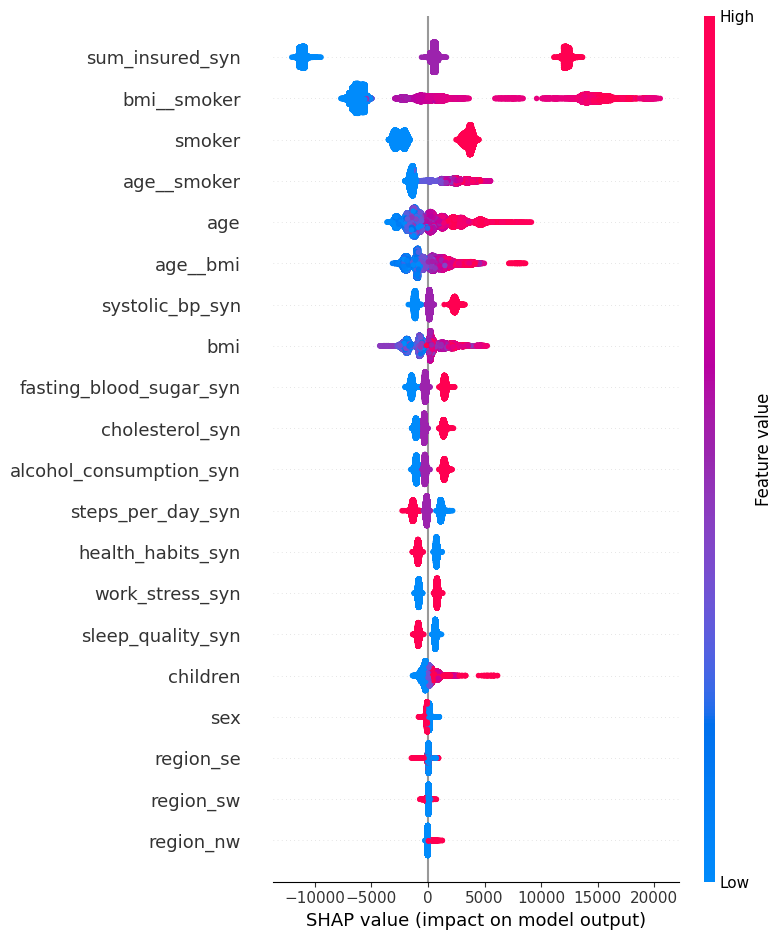

--- Starting Fairness Audit Pipeline ---

🔧 Step 1: Stratified split...
- Splitting data (stratified by ['smoker', 'sum_insured_syn'])...
  - Data split done.

📊 Step 2: Generating predictions and evaluating overall scores (Before DC)...
- Generating uncorrected predictions...
  - Uncorrected predictions and scores calculated.

📈 Step 3: Applying dual correction...
- Splitting train/test datasets for DC application...
  - Dataframes prepared for DC.
  - Combined train and test data for DC fitting.
[TrippleFactorCorrection] Initialized. lambda_strength=1.0, min_group_size=3
- Calculating global shift...
- Calculating group-wise offsets...
[TrippleFactorCorrection] Fitting regression-based correction...
[TrippleFactorCorrection] Overall train MAE: 1532.3329
[TrippleFactorCorrection] Fitted global regression: coef=0.0934, intercept=4.7535
  - Global shift and group-wise offsets calculated.
[TrippleFactorCorrection] Applying tripple-factor corrections to test predictions...
[transform_with

Parameter    Before DC     After DC     Impact
0  rmse_train  2725.106497  2725.106497   0.000000
1   mae_train  1532.332935  1532.332935   0.000000
2    r2_train     0.978057     0.978057   0.000000
3   rmse_test  3256.215805  3250.475039  -5.740766
4    mae_test  1824.463469  1770.836880 -53.626589
5     r2_test     0.968994     0.969103   0.000109

  - Overall performance comparison done.

📋 Step 5: Computing group-wise fairness metrics...
📋 Computing group-wise fairness metrics...

### Audit for `smoker` ###

Fairness Audit for smoker:
- smoker=0: before = 35049.23, after = 34944.97
- smoker=1: before = 59424.70, after = 59539.98

### Audit for `systolic_bp_syn` ###

Fairness Audit for systolic_bp_syn:
- systolic_bp_syn=0: before = 45834.98, after = 45634.71
- systolic_bp_syn=1: before = 47082.15, after = 47083.81
- systolic_bp_syn=2: before = 49186.86, after = 49415.95

### Audit for `cholesterol_syn` ###

Fairness Audit for cholesterol_syn:
- cholesterol_syn=0: before = 46169.81, after = 45970.42
- cholesterol_syn=1: before = 47026.21, after = 47048.22
- cholesterol_syn=2: before = 48829.24, after = 49027.75

### Audit for `fasting_blood_sugar_syn` ###

Fairness Audit for fasting_blood_sugar_syn:
- fasting_blood_sugar_syn=0: before = 45964.07, after = 45767.28
- fasting_blood_sugar_syn=1: before = 46918.54, after = 46926.16
- 

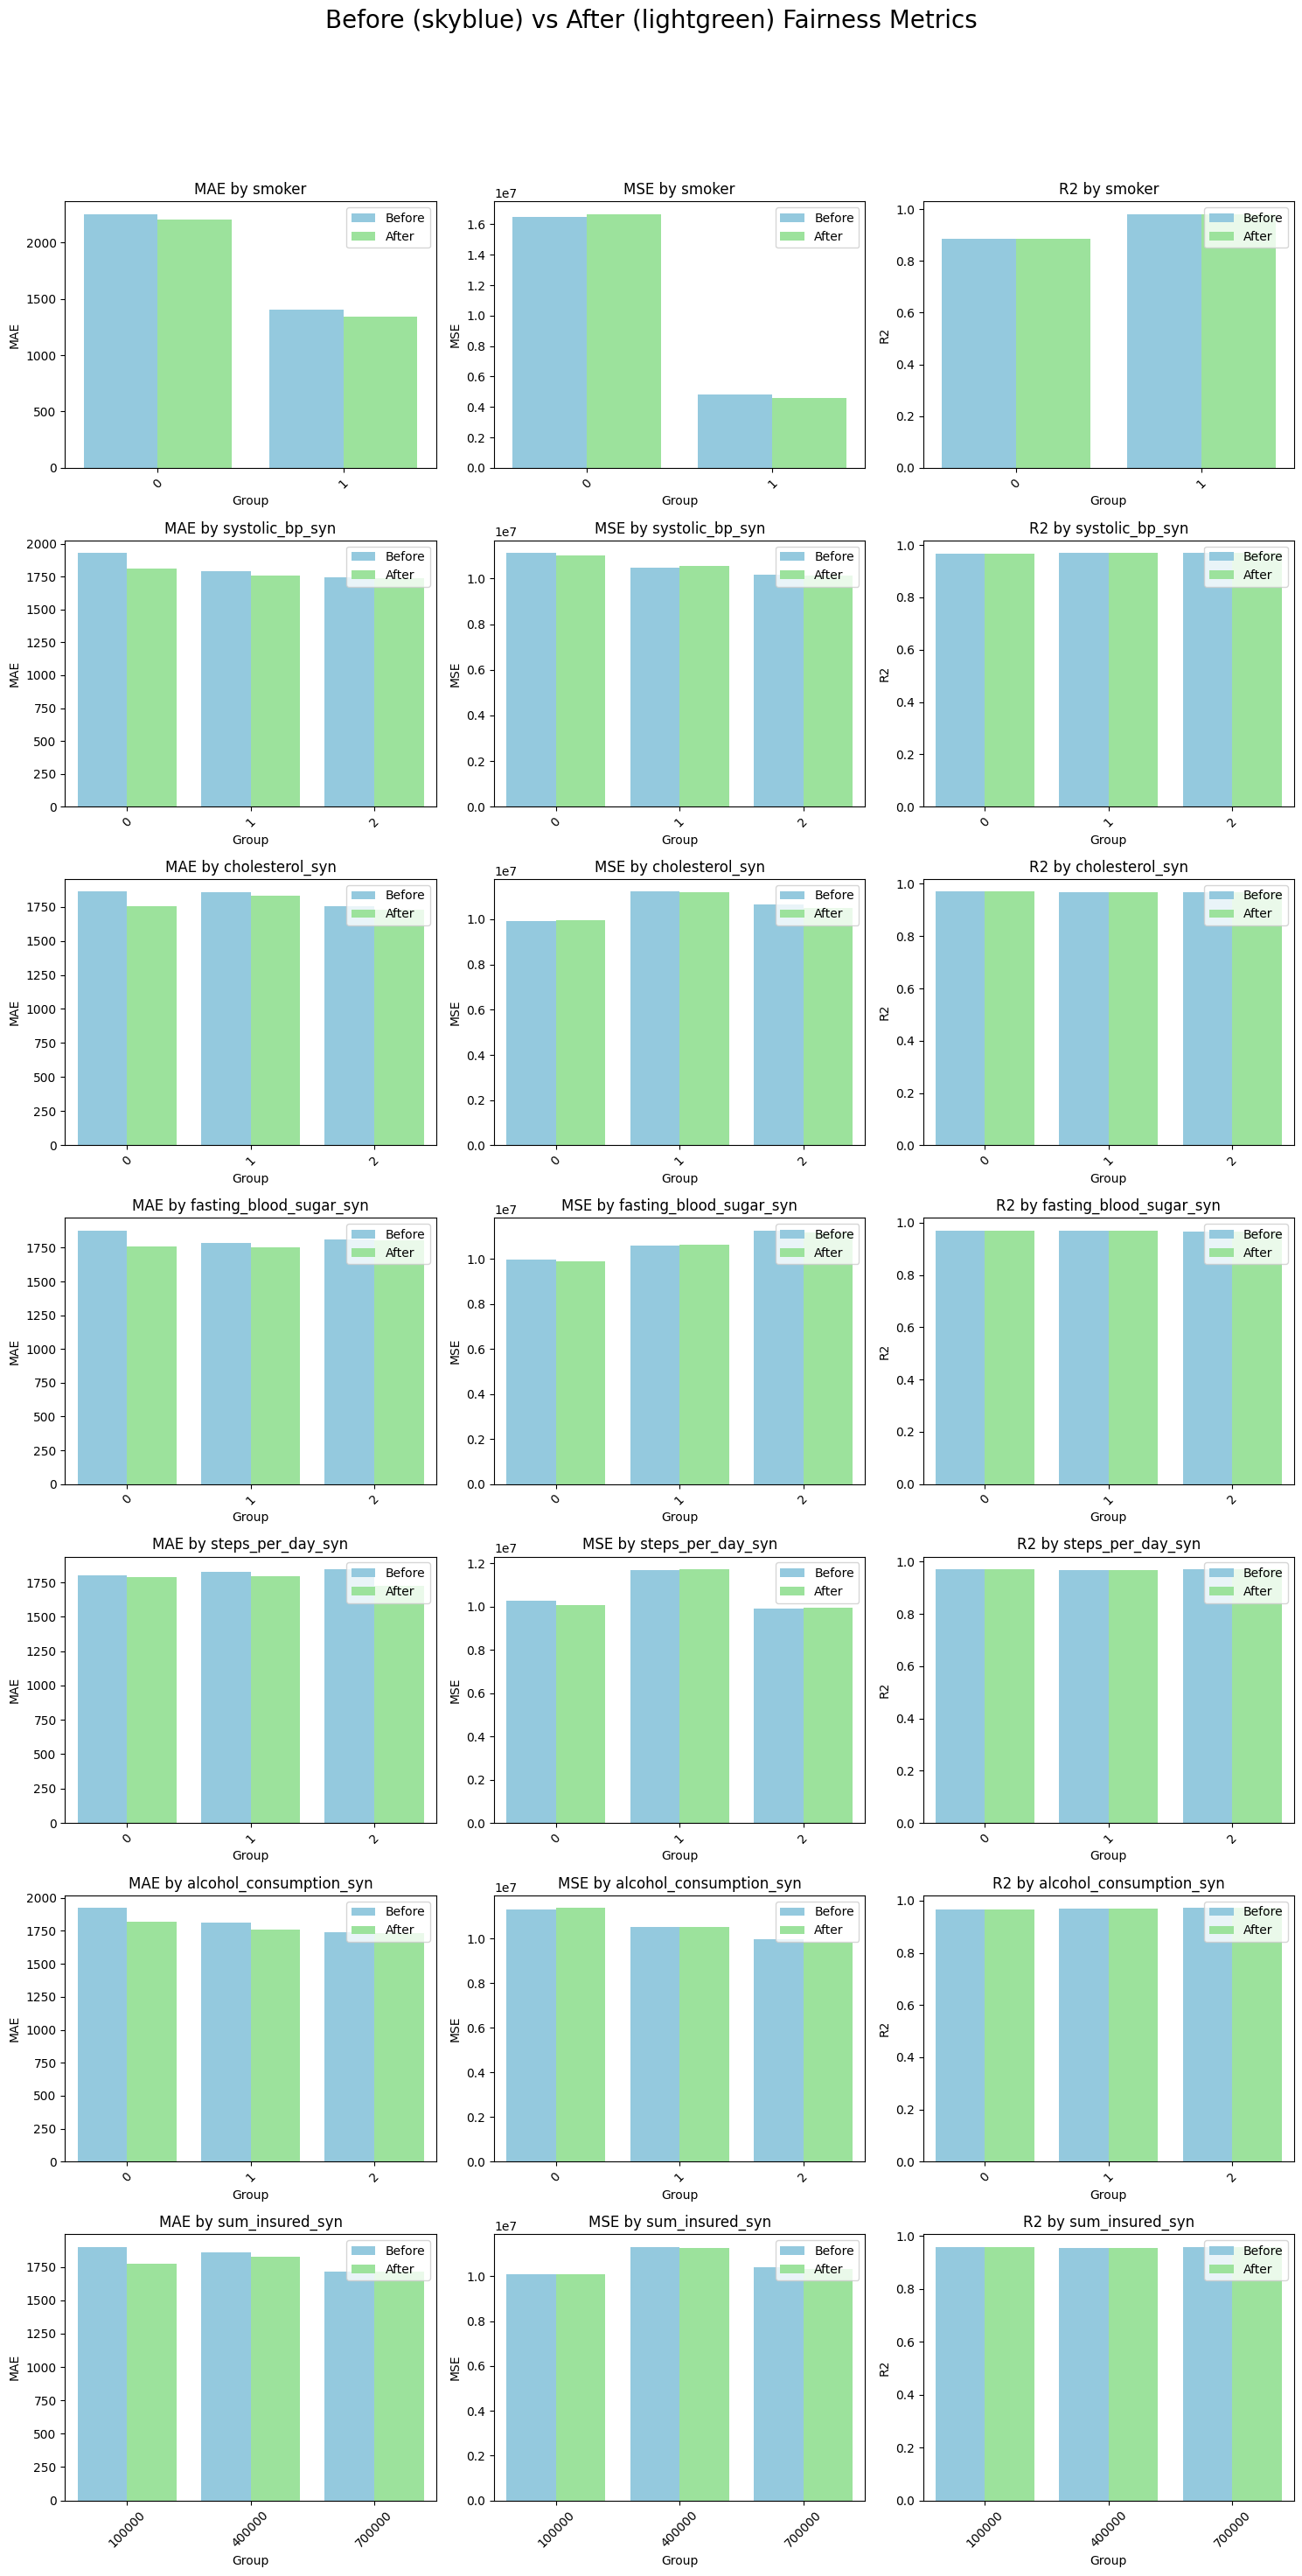

done.
  - Fairness grids plotted.

⚖️ Step 7: Comparing group-wise influence (detailed breakdown)...
- Comparing before/after metrics for each group (influence)... done.
  - Group-wise influence comparison done.

📝 Step 8: Summarizing fairness improvement report...


For Metric: MAE



Feature Metric  Mean_before  Stddev_before   Mean_after  \
0              Overall MAE    MAE  1824.626345     146.093644  1771.170583   
1  alcohol_consumption_syn    MAE  1824.656561      76.147951  1770.948733   
2          cholesterol_syn    MAE  1824.241154      49.093886  1770.709669   
3  fasting_blood_sugar_syn    MAE  1824.321271      38.413121  1770.832912   
4                   smoker    MAE  1827.942608     424.285312  1774.377668   
5        steps_per_day_syn    MAE  1824.454102      18.397941  1771.080185   
6          sum_insured_syn    MAE  1824.754035      77.907437  1770.971225   
7          systolic_bp_syn    MAE  1823.120102      78.579720  1770.342715   

   Stddev_after      ΔMean    ΔStddev  
0    140.563316 -53.455762  -5.530329  
1     35.548711 -53.707827 -40.599241  
2     43.665563 -53.531486  -5.428323  
3     21.542952 -53.488359 -16.870169  
4    431.803425 -53.564941   7.518113  
5     32.766375 -53.373917  14.368433  
6     43.160114 -53.782811 -34.747323  
7     28.958904 -52.777386 -49.620816



For Metric: MSE



Feature Metric   Mean_before  Stddev_before    Mean_after  \
8               Overall MSE    MSE  1.060836e+07   1.919136e+06  1.057118e+07   
9   alcohol_consumption_syn    MSE  1.060436e+07   5.512757e+05  1.056685e+07   
10          cholesterol_syn    MSE  1.060321e+07   5.240816e+05  1.056556e+07   
11  fasting_blood_sugar_syn    MSE  1.060387e+07   5.327663e+05  1.056670e+07   
12                   smoker    MSE  1.065077e+07   5.832545e+06  1.061519e+07   
13        steps_per_day_syn    MSE  1.061143e+07   7.612814e+05  1.057463e+07   
14          sum_insured_syn    MSE  1.060328e+07   5.250626e+05  1.056606e+07   
15          systolic_bp_syn    MSE  1.059574e+07   3.946330e+05  1.055798e+07   

    Stddev_after         ΔMean        ΔStddev  
8   1.989891e+06 -37177.072876   70754.773488  
9   6.434557e+05 -37514.777688   92179.961439  
10  5.119468e+05 -37655.646022  -12134.772710  
11  5.261156e+05 -37167.873097   -6650.634515  
12  6.049470e+06 -35574.603262  216925.132152  
13  8.093498e+05 -36807.124299   48068.375349  
14  5.106876e+05 -37225.823638  -14375.034822  
15  3.606049e+05 -37759.505591  -34028.003343



For Metric: R2



Feature Metric  Mean_before  Stddev_before  Mean_after  \
16               Overall R2     R2     0.963399       0.018585    0.963495   
17  alcohol_consumption_syn     R2     0.968801       0.002004    0.968908   
18          cholesterol_syn     R2     0.968845       0.000930    0.968954   
19  fasting_blood_sugar_syn     R2     0.968785       0.001113    0.968894   
20                   smoker     R2     0.932798       0.046966    0.932700   
21        steps_per_day_syn     R2     0.968837       0.001888    0.968949   
22          sum_insured_syn     R2     0.956761       0.002471    0.956913   
23          systolic_bp_syn     R2     0.968763       0.001377    0.968879   

    Stddev_after     ΔMean   ΔStddev  
16      0.018914  0.000096  0.000328  
17      0.002272  0.000107  0.000268  
18      0.000899  0.000110 -0.000030  
19      0.001105  0.000109 -0.000008  
20      0.048124 -0.000098  0.001158  
21      0.001993  0.000112  0.000105  
22      0.002418  0.000152 -0.000053  
23      0.001163  0.000117 -0.000214

  - Fairness improvement report summarized.

✅ Fairness audit complete.
--- Starting Fairness Audit Pipeline ---

🔧 Step 1: Stratified split...
- Splitting data (stratified by ['smoker', 'sum_insured_syn'])...
  - Data split done.

📊 Step 2: Generating predictions and evaluating overall scores (Before DC)...
- Generating uncorrected predictions...
  - Uncorrected predictions and scores calculated.

📈 Step 3: Applying dual correction...
- Splitting train/test datasets for DC application...
  - Dataframes prepared for DC.
  - Combined train and test data for DC fitting.
[TrippleFactorCorrection] Initialized. lambda_strength=1.0, min_group_size=3
- Calculating global shift...
- Calculating group-wise offsets...
[TrippleFactorCorrection] Fitting regression-based correction...
[TrippleFactorCorrection] Overall train MAE: 1303.9966
[TrippleFactorCorrection] Fitted global regression: coef=0.1516, intercept=3.1144
  - Global shift and group-wise offsets calculated.
[TrippleFactorCorrection] Ap

Parameter    Before DC     After DC     Impact
0  rmse_train  2297.445772  2297.445772   0.000000
1   mae_train  1303.996642  1303.996642   0.000000
2    r2_train     0.984404     0.984404   0.000000
3   rmse_test  3018.163993  3000.443903 -17.720090
4    mae_test  1717.647656  1671.366322 -46.281334
5     r2_test     0.973361     0.973673   0.000312

  - Overall performance comparison done.

📋 Step 5: Computing group-wise fairness metrics...
📋 Computing group-wise fairness metrics...

### Audit for `smoker` ###

Fairness Audit for smoker:
- smoker=0: before = 34969.87, after = 34972.17
- smoker=1: before = 59558.95, after = 59563.48

### Audit for `systolic_bp_syn` ###

Fairness Audit for systolic_bp_syn:
- systolic_bp_syn=0: before = 45839.98, after = 45666.89
- systolic_bp_syn=1: before = 47125.61, after = 47107.75
- systolic_bp_syn=2: before = 49223.81, after = 49435.55

### Audit for `cholesterol_syn` ###

Fairness Audit for cholesterol_syn:
- cholesterol_syn=0: before = 46201.53, after = 46021.20
- cholesterol_syn=1: before = 47057.89, after = 47095.53
- cholesterol_syn=2: before = 48850.73, after = 49005.20

### Audit for `fasting_blood_sugar_syn` ###

Fairness Audit for fasting_blood_sugar_syn:
- fasting_blood_sugar_syn=0: before = 45980.21, after = 45808.73
- fasting_blood_sugar_syn=1: before = 46921.90, after = 46931.93
- 

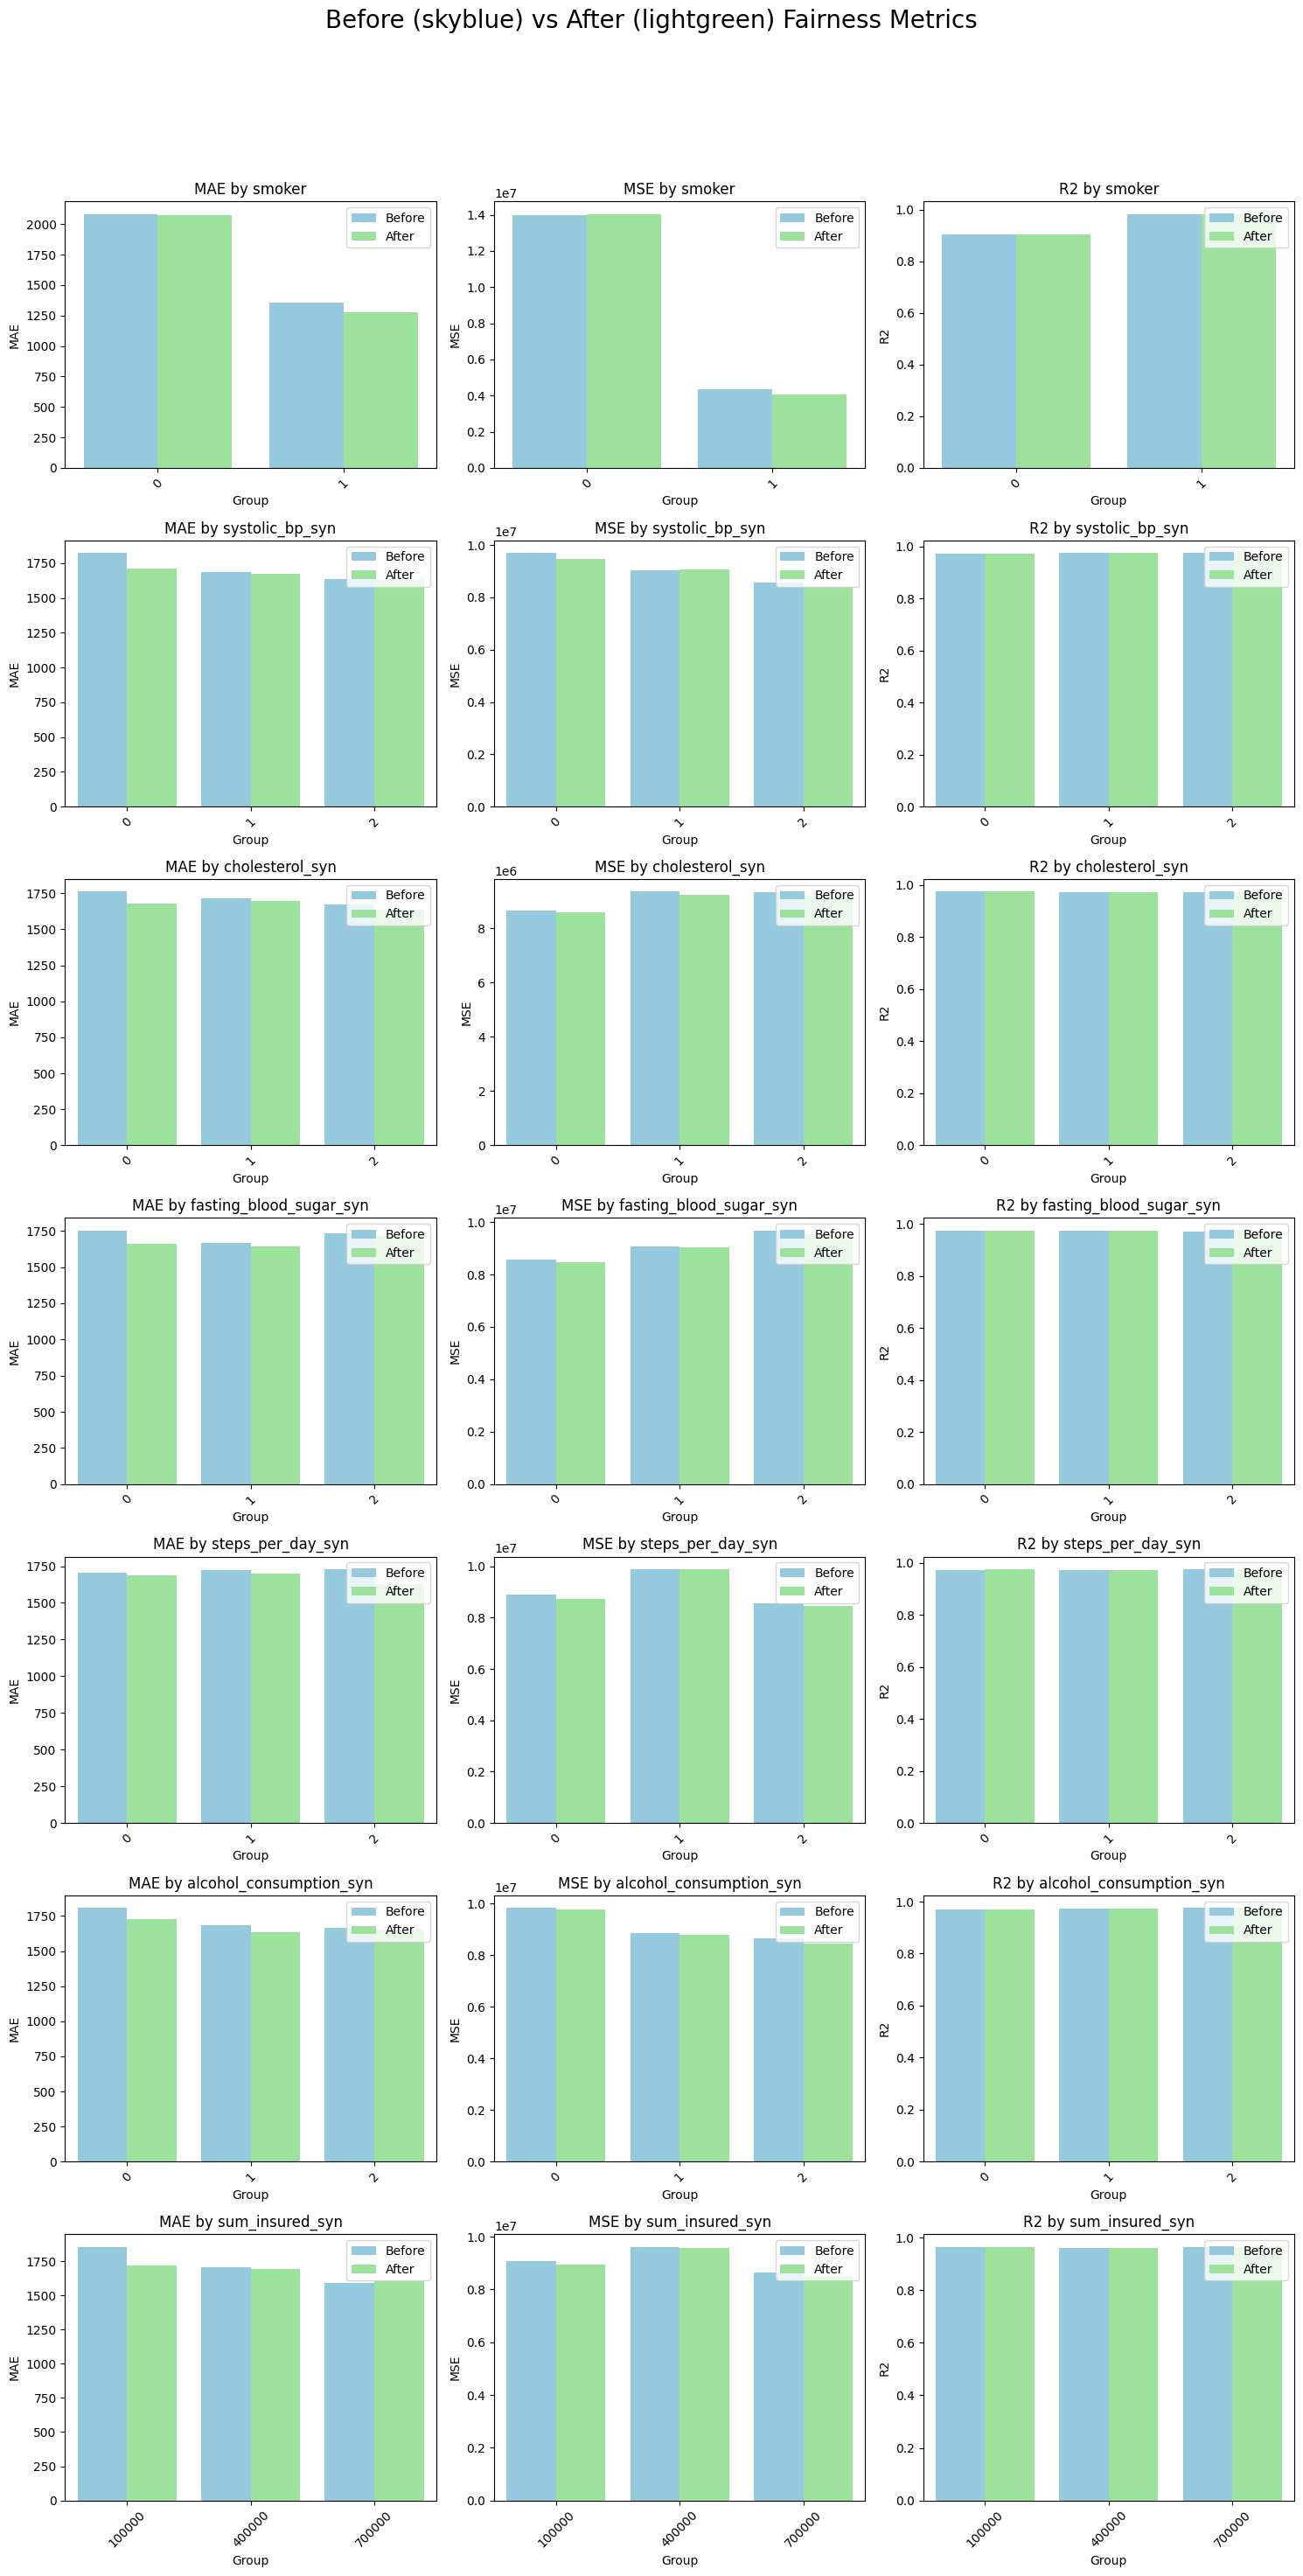

done.
  - Fairness grids plotted.

⚖️ Step 7: Comparing group-wise influence (detailed breakdown)...
- Comparing before/after metrics for each group (influence)... done.
  - Group-wise influence comparison done.

📝 Step 8: Summarizing fairness improvement report...


For Metric: MAE



Feature Metric  Mean_before  Stddev_before   Mean_after  \
0              Overall MAE    MAE  1717.799786     129.617607  1671.669358   
1  alcohol_consumption_syn    MAE  1717.996888      62.864988  1671.675425   
2          cholesterol_syn    MAE  1717.504266      35.405579  1671.261341   
3  fasting_blood_sugar_syn    MAE  1717.506975      37.256433  1671.334392   
4                   smoker    MAE  1720.618771     362.331132  1674.630269   
5        steps_per_day_syn    MAE  1717.657683      10.855712  1671.595117   
6          sum_insured_syn    MAE  1717.999116     107.392296  1671.553037   
7          systolic_bp_syn    MAE  1716.254461      78.928751  1670.622898   

   Stddev_after      ΔMean    ΔStddev  
0    130.529240 -46.130427   0.911633  
1     40.932346 -46.321463 -21.932642  
2     24.978916 -46.242925 -10.426663  
3     32.101056 -46.172583  -5.155377  
4    398.042374 -45.988502  35.711242  
5     29.731238 -46.062566  18.875526  
6     50.071096 -46.446079 -57.321199  
7     35.107686 -45.631564 -43.821065



For Metric: MSE



Feature Metric   Mean_before  Stddev_before    Mean_after  \
8               Overall MSE    MSE  9.113595e+06   1.585244e+06  9.007112e+06   
9   alcohol_consumption_syn    MSE  9.111858e+06   5.156322e+05  9.005020e+06   
10          cholesterol_syn    MSE  9.110120e+06   3.292717e+05  9.003330e+06   
11  fasting_blood_sugar_syn    MSE  9.110025e+06   4.487703e+05  9.003520e+06   
12                   smoker    MSE  9.148830e+06   4.818989e+06  9.043609e+06   
13        steps_per_day_syn    MSE  9.115549e+06   5.622286e+05  9.009561e+06   
14          sum_insured_syn    MSE  9.110490e+06   4.028454e+05  9.003892e+06   
15          systolic_bp_syn    MSE  9.100040e+06   4.652195e+05  8.993020e+06   

    Stddev_after          ΔMean        ΔStddev  
8   1.642327e+06 -106482.940441   57082.788732  
9   5.650196e+05 -106837.777092   49387.406483  
10  3.016040e+05 -106789.732272  -27667.683597  
11  4.400805e+05 -106505.350690   -8689.807844  
12  4.993393e+06 -105220.161411  174404.118497  
13  6.178101e+05 -105987.571867   55581.534712  
14  4.332459e+05 -106598.378129   30400.498828  
15  4.295673e+05 -107020.685287  -35652.176026



For Metric: R2



Feature Metric  Mean_before  Stddev_before  Mean_after  \
16               Overall R2     R2     0.968581       0.015649    0.968917   
17  alcohol_consumption_syn     R2     0.973191       0.001844    0.973503   
18          cholesterol_syn     R2     0.973223       0.000552    0.973536   
19  fasting_blood_sugar_syn     R2     0.973182       0.000928    0.973496   
20                   smoker     R2     0.942535       0.039280    0.942883   
21        steps_per_day_syn     R2     0.973226       0.001374    0.973540   
22          sum_insured_syn     R2     0.962850       0.001921    0.963284   
23          systolic_bp_syn     R2     0.973176       0.001455    0.973498   

    Stddev_after     ΔMean   ΔStddev  
16      0.015849  0.000336  0.000200  
17      0.001988  0.000312  0.000145  
18      0.000457  0.000313 -0.000095  
19      0.000913  0.000313 -0.000015  
20      0.040107  0.000348  0.000827  
21      0.001517  0.000314  0.000143  
22      0.002045  0.000433  0.000124  
23      0.001223  0.000322 -0.000232

  - Fairness improvement report summarized.

✅ Fairness audit complete.


In [9]:
# =====================================================
# 📊 Stage 3: Run Pipeline on Augmented Dataset
# -----------------------------------------------------
# Run full pipeline again with synthetic features to
# evaluate both prediction accuracy and fairness.
# =====================================================

## Define Stage Parameters
stratify_by = ['smoker', 'sum_insured_syn']
key_features = ['smoker', 'systolic_bp_syn', 'cholesterol_syn','fasting_blood_sugar_syn', 'steps_per_day_syn',
               'alcohol_consumption_syn','sum_insured_syn']
metrics = {"MAE": mean_absolute_error, "MSE": mean_squared_error, "R2": r2_score}

dfa = get_fixed_size_sample_with_augmentation(dfa, size=50000, noise_level=0.01, unique_threshold=10, random_state=42)

## Run Stage Pipeline
all_results = run_stage_pipeline(model=define_xgb(), df=dfa, target=target, hue=hue, 
                                 key_features=key_features, stratify_by=stratify_by, metrics=metrics)